<a href="https://colab.research.google.com/github/sgevatschnaider/machine-learning/blob/main/notebooks/es/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importación de librerías necesarias
from IPython.display import display, HTML
import html # Para escapar caracteres especiales en los títulos

# --- 1. ESTRUCTURACIÓN DE DATOS (CONTENIDO SOBRE QUÉ ES UN AUTOENCODER) ---

# --- Bloque de Conclusión (Resumen Final) ---
conclusion_ae_intro_html = """
<div class="content-block">
    <h2>En Resumen</h2>
    <p>Un autoencoder es como una máquina que aprende a resumir los datos, manteniendo lo más importante, y luego desarrolla una forma de reconstruirlos. Es una herramienta poderosa y fundamental en el aprendizaje no supervisado para encontrar patrones, comprimir información y aprender representaciones significativas de los datos sin necesidad de etiquetas.</p>
</div>
"""

# --- Contenido Principal para el Acordeón ---
autoencoder_intro_data = [
    {
        "titulo": "Resumen Técnico",
        "contenido": """
            <p>Un autoencoder es un tipo de red neuronal artificial utilizada para el <strong>aprendizaje no supervisado de representaciones eficientes</strong>. El objetivo principal es aprender a copiar su entrada a su salida, pero con una restricción clave: la información debe pasar a través de un "cuello de botella" (bottleneck) intermedio.</p>
            <blockquote>Este cuello de botella fuerza al modelo a aprender una representación <strong>comprimida</strong> y <strong>codificada</strong> de los datos, capturando las características más importantes y salientes.</blockquote>
        """
    },
    {
        "titulo": "Analogía Intuitiva",
        "contenido": """
            <h4>Un traductor que resume</h4>
            <p>Imagina que un autoencoder es un experto en resúmenes que realiza el siguiente proceso:</p>
            <ol>
                <li><strong>Escucha:</strong> Recibe una frase larga y detallada en español (la entrada de alta dimensión).</li>
                <li><strong>Resume:</strong> La condensa en una frase muy corta o incluso en una sola palabra clave que captura la idea principal (la representación latente o "código").</li>
                <li><strong>Reconstruye:</strong> Intenta volver a generar la frase original, usando únicamente el resumen que creó.</li>
            </ol>
            <p>Si la reconstrucción es fiel a la original, significa que el resumen era excelente y capturó la <strong>esencia</strong> de la información. El autoencoder hace exactamente esto, pero con datos como imágenes, sonidos o vectores.</p>
        """
    },
    {
        "titulo": "Estructura Básica",
        "contenido": """
            <p>Un autoencoder se compone de dos partes principales que trabajan en conjunto:</p>
            <h4>1. Codificador (Encoder)</h4>
            <p>Comprime los datos de entrada de alta dimensión en una representación latente de menor dimensión.</p>
            <div class="formula-block">$$ z = f_\\theta(x) $$</div>
            <ul>
                <li><b>$x \\in \\mathbb{R}^n$</b>: Dato original (ej. una imagen aplanada).</li>
                <li><b>$z \\in \\mathbb{R}^d$</b>: Representación comprimida o código latente.</li>
                <li>La clave es que <b>$d \\ll n$</b> (la dimensión del código es mucho menor que la de la entrada).</li>
            </ul>

            <h4>2. Decodificador (Decoder)</h4>
            <p>Intenta reconstruir la entrada original a partir de la representación comprimida.</p>
            <div class="formula-block">$$ \\hat{x} = g_\\phi(z) = g_\\phi(f_\\theta(x)) $$</div>
            <ul>
                <li><b>$\\hat{x}$</b>: La reconstrucción de la entrada. El objetivo es que se parezca lo más posible a $x$.</li>
            </ul>

            <h4>3. Función de Pérdida</h4>
            <p>La red se entrena para minimizar la diferencia (error de reconstrucción) entre la entrada original $x$ y su reconstrucción $\\hat{x}$.</p>
            <div class="formula-block">$$ L(\\theta, \\phi) = \\mathbb{E}_{x \\sim D}[\\ell(x, \\hat{x})] $$</div>
            <p>Donde $\\ell$ es una función de error como el Error Cuadrático Medio (MSE) para datos continuos.</p>
        """
    },
    {
        "titulo": "¿Para qué Sirven los Autoencoders?",
        "contenido": """
            <p>Su capacidad para aprender representaciones útiles los hace valiosos para una variedad de tareas:</p>
            <div class="table-container">
                <table>
                    <thead><tr><th>Aplicación</th><th>Funcionamiento</th></tr></thead>
                    <tbody>
                        <tr><td><strong>Reducción de Dimensionalidad</strong></td><td>Similar a PCA, pero capaz de aprender mapeos no lineales mucho más complejos.</td></tr>
                        <tr><td><strong>Eliminación de Ruido (Denoising)</strong></td><td>Se entrena para reconstruir una imagen limpia a partir de una versión ruidosa.</td></tr>
                        <tr><td><strong>Detección de Anomalías</strong></td><td>Si un dato nuevo tiene un error de reconstrucción muy alto, es probablemente una anomalía que el modelo no sabe cómo representar.</td></tr>
                        <tr><td><strong>Compresión de Datos</strong></td><td>El codificador puede usarse para comprimir datos y el decodificador para descomprimirlos.</td></tr>
                        <tr><td><strong>Generación de Datos</strong></td><td>En variantes avanzadas como el VAE, se puede muestrear del espacio latente para generar datos nuevos y realistas.</td></tr>
                    </tbody>
                </table>
        """
    },
    {
        "titulo": "Ejemplo Visual",
        "contenido": """
            <h4>Capturando la "esencia" de un gato</h4>
            <ol>
                <li><strong>Imagen de Entrada:</strong> Una foto en color de un gato de $100 \\times 100$ píxeles. Esto corresponde a un vector de entrada de $100 \\times 100 \\times 3 = 30,000$ dimensiones.</li>
                <li><strong>Codificador:</strong> Una serie de capas convolucionales que comprimen esta imagen en un pequeño vector de, por ejemplo, 20 números ($d=20$).</li>
                <li><strong>Decodificador:</strong> Una serie de capas que toman ese vector de 20 números y tratan de reconstruir la imagen original de $30,000$ píxeles.</li>
            </ol>
            <blockquote>Si la red logra que la imagen reconstruida se parezca mucho a la original, entonces ese vector de 20 números ha aprendido a <strong>capturar la esencia de la imagen del gato</strong> de una manera extremadamente eficiente.</blockquote>
        """
    }
]


# --- LÓGICA DE GENERACIÓN (REUTILIZADA) ---
def generar_tarjetas_definiciones(datos):
    html_generado = []
    for seccion in datos:
        titulo_escapado = html.escape(seccion['titulo'])
        contenido_html = seccion['contenido']

        plantilla_seccion = f"""
        <div class="topic-card">
            <div class="topic-header">
                <span class="topic-title">{titulo_escapado}</span>
                <i class="fas fa-chevron-down expand-icon"></i>
            </div>
            <div class="topic-content">
                {contenido_html}
            </div>
        </div>
        """
        html_generado.append(plantilla_seccion)
    return "\n".join(html_generado)

# --- PRE-CÁLCULO DEL CONTENIDO DINÁMICO ---
contenido_dinamico_html = generar_tarjetas_definiciones(autoencoder_intro_data)

# --- PLANTILLA PROFESIONAL (REUTILIZADA) ---
plantilla_profesional = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>{main_title}</title>
  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700;800&family=JetBrains+Mono:wght@400;500&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">
  <script>
    window.MathJax = {{
      tex: {{
        inlineMath: [['$', '$'], ['\\\\(', '\\\\)']],
        displayMath: [['$$', '$$'], ['\\\\[', '\\\\]']],
        processEscapes: true,
        processEnvironments: true
      }},
      svg: {{
        fontCache: 'global'
      }}
    }};
  </script>
  <script src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js" id="MathJax-script" async></script>
  <style>
    :root {{
      --bg-primary: linear-gradient(135deg, #16a085 0%, #2980b9 100%);
      --bg-secondary: rgba(255, 255, 255, 0.85);
      --bg-tertiary: rgba(248, 250, 252, 0.8);
      --text-primary: #2c3e50;
      --text-secondary: #34495e;
      --text-light: #ffffff;
      --accent-primary: #16a085;
      --accent-secondary: #2980b9;
      --accent-gradient: linear-gradient(135deg, var(--accent-primary) 0%, var(--accent-secondary) 100%);
      --border-color: rgba(226, 232, 240, 0.8);
      --shadow-card: 0 15px 35px rgba(0, 0, 0, 0.08);
      --border-radius: 20px;
      --transition: all 0.4s cubic-bezier(0.25, 0.8, 0.25, 1);
    }}
    [data-theme="dark"] {{
      --bg-primary: linear-gradient(135deg, #0f2027 0%, #203a43 50%, #2c5364 100%);
      --bg-secondary: rgba(26, 32, 44, 0.85);
      --bg-tertiary: rgba(45, 55, 72, 0.7);
      --text-primary: #f7fafc;
      --text-secondary: #a0aec0;
      --accent-primary: #1dd1a1;
      --accent-secondary: #48dbfb;
      --border-color: rgba(255, 255, 255, 0.15);
    }}
    * {{ margin: 0; padding: 0; box-sizing: border-box; }}
    html {{ scroll-behavior: smooth; }}
    body {{ font-family: 'Inter', sans-serif; line-height: 1.8; background: var(--bg-primary); color: var(--text-primary); transition: var(--transition); min-height: 100vh; position: relative; overflow-x: hidden; }}
    .particles {{ position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; }}
    .particle {{ position: absolute; border-radius: 50%; animation: float 25s infinite linear; opacity: 0; background: rgba(255, 255, 255, 0.6);}}
    @keyframes float {{ 0% {{ transform: translateY(100vh) rotate(0deg); opacity: 0; }} 10%, 90% {{ opacity: 0.6; }} 100% {{ transform: translateY(-10vh) rotate(360deg); opacity: 0; }} }}

    .container {{ max-width: 1000px; margin: 0 auto; padding: 2rem; z-index: 1; }}
    .header {{ text-align: center; margin-bottom: 3rem; position: relative; }}
    .main-title {{ font-size: clamp(2.5rem, 5vw, 4.2rem); font-weight: 800; background: var(--accent-gradient); -webkit-background-clip: text; -webkit-text-fill-color: transparent; background-clip: text; margin-bottom: 1rem; }}

    .theme-toggle {{ position: fixed; top: 2rem; right: 2rem; width: 60px; height: 60px; border: 1px solid var(--border-color); border-radius: 50%; background: var(--bg-secondary); backdrop-filter: blur(15px); box-shadow: var(--shadow-card); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.4rem; color: var(--accent-primary); transition: var(--transition); z-index: 1000; }}
    .theme-toggle:hover {{ transform: scale(1.15) rotate(180deg); }}

    .content-block {{
        background: var(--bg-secondary); backdrop-filter: blur(20px); border-radius: var(--border-radius);
        box-shadow: var(--shadow-card); border: 2px solid var(--border-color);
        padding: 2rem; margin-bottom: 2rem;
    }}
    .content-block h2 {{ color: var(--text-primary); margin-bottom: 1rem; }}
    .content-block p {{ color: var(--text-secondary); margin-bottom: 1rem; }}

    .lesson-container {{ display: flex; flex-direction: column; gap: 1.5rem; }}
    .topic-card {{ background: var(--bg-secondary); backdrop-filter: blur(20px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 2px solid var(--border-color); overflow: hidden; transition: var(--transition); }}
    .topic-header {{ cursor: pointer; padding: 1.5rem 2rem; display: flex; justify-content: space-between; align-items: center; }}
    .topic-title {{ font-size: 1.3rem; font-weight: 600; color: var(--text-primary); }}
    .expand-icon {{ font-size: 1.2rem; color: var(--text-secondary); transition: var(--transition); }}
    .topic-card.open .expand-icon {{ transform: rotate(180deg); }}
    .topic-content {{ max-height: 0; overflow: hidden; transition: max-height 1.2s ease, padding 1.2s ease; background: var(--bg-tertiary); }}
    .topic-card.open .topic-content {{ max-height: 3500px; padding: 1.5rem 2rem; border-top: 1px solid var(--border-color); }}

    .topic-content h4 {{ color: var(--text-primary); margin-top: 1.5rem; margin-bottom: 0.5rem; font-size: 1.1rem; }}
    .topic-content p, .topic-content li {{ color: var(--text-secondary); line-height: 1.7; }}
    .topic-content ul, .topic-content ol {{ padding-left: 25px; margin-bottom: 1rem; }}
    .topic-content strong {{ color: var(--text-primary); font-weight: 700; }}
    .topic-content em {{ color: var(--text-primary); font-style: italic; }}
    .topic-content blockquote {{
        border-left: 4px solid var(--accent-primary); padding-left: 1.5rem; margin: 1.5rem 0;
        font-style: italic; color: var(--text-secondary); background: rgba(127, 140, 141, 0.05);
        border-radius: 0 8px 8px 0; padding: 1rem 1.5rem;
    }}
    .formula-block {{
        padding: 1.5rem; background: rgba(44, 62, 80, 0.1); border-radius: 10px;
        text-align: center; overflow-x: auto; margin: 1.5rem 0; color: var(--text-primary);
        border: 1px solid var(--border-color);
    }}
    .table-container {{ overflow-x: auto; margin: 1.5rem 0; }}
    table {{ width: 100%; border-collapse: collapse; }}
    th, td {{ padding: 12px 15px; border: 1px solid var(--border-color); text-align: left; }}
    thead th {{ background-color: var(--bg-tertiary); color: var(--text-primary); font-weight: 600; }}
    tbody tr:nth-child(even) {{ background: rgba(127, 140, 141, 0.05); }}

    .MathJax {{ color: var(--text-primary) !important; }}
    .MathJax_Display {{ color: var(--text-primary) !important; }}

    footer {{ text-align: center; margin-top: 4rem; padding-top: 2rem; border-top: 1px solid var(--border-color); }}
    footer p {{ color: var(--text-secondary); font-size: 0.9rem; opacity: 0.8; }}

    @media (max-width: 768px) {{
        .container {{ padding: 1rem; }}
        .topic-header {{ padding: 1rem 1.5rem; }}
        .topic-card.open .topic-content {{ padding: 1rem 1.5rem; }}
        .formula-block {{ padding: 1rem; }}
    }}
  </style>
</head>
<body data-theme="dark">
  <div class="particles" id="particles-container"></div>
  <div class="theme-toggle" id="themeToggleButton" title="Cambiar tema"><i class="fas fa-moon" id="theme-icon"></i></div>
  <div class="container">
    <header class="header">
      <h1 class="main-title">{main_title}</h1>
    </header>

    <div class="lesson-container">
        {dynamic_content_html}
    </div>

    {conclusion_html}

    <footer>
      <p>{footer_text}</p>
    </footer>
  </div>

  <script>
    (function() {{
        const themeToggleButton = document.getElementById('themeToggleButton');
        const themeIcon = document.getElementById('theme-icon');
        const bodyEl = document.body;

        function setTheme(theme) {{
            bodyEl.setAttribute('data-theme', theme);
            localStorage.setItem('theme', theme);
            if (themeIcon) {{ themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }}
        }}

        themeToggleButton.addEventListener('click', () => {{
            const newTheme = (bodyEl.getAttribute('data-theme') || 'dark') === 'dark' ? 'light' : 'dark';
            setTheme(newTheme);
        }});

        setTheme(localStorage.getItem('theme') || 'dark');

        document.querySelectorAll('.topic-header').forEach(header => {{
            header.addEventListener('click', () => {{
                const card = header.parentElement;
                card.classList.toggle('open');
                if (window.MathJax) {{
                    window.MathJax.typesetPromise([card]).catch(function (err) {{
                        console.log('Error rendering MathJax:', err);
                    }});
                }}
            }});
        }});

        const container = document.getElementById('particles-container');
        if (container) {{
            for (let i = 0; i < 30; i++) {{
                const p = document.createElement('div');
                p.className = 'particle';
                p.style.left = Math.random() * 100 + 'vw';
                const size = (Math.random() * 5 + 2);
                p.style.width = size + 'px';
                p.style.height = size + 'px';
                p.style.animationDelay = Math.random() * -20 + 's';
                p.style.animationDuration = (15 + Math.random() * 10) + 's';
                container.appendChild(p);
            }}
        }}

        const firstTopic = document.querySelector('.topic-card');
        if(firstTopic) {{
            firstTopic.classList.add('open');
            if (window.MathJax) {{
                window.MathJax.typesetPromise([firstTopic]).catch(function (err) {{
                    console.log('Error rendering MathJax:', err);
                }});
            }}
        }}
    }})();
  </script>
</body>
</html>
"""

# --- INYECCIÓN DINÁMICA Y RENDERIZADO FINAL ---
final_html = plantilla_profesional.format(
    main_title="¿Qué es un Autoencoder?",
    dynamic_content_html=contenido_dinamico_html,
    conclusion_html=conclusion_ae_intro_html,
    footer_text="Guía interactiva elaborado por el profesor Sergio Gevatschnaider."
)

display(HTML(final_html))

Aplicación,Funcionamiento
Reducción de Dimensionalidad,"Similar a PCA, pero capaz de aprender mapeos no lineales mucho más complejos."
Eliminación de Ruido (Denoising),Se entrena para reconstruir una imagen limpia a partir de una versión ruidosa.
Detección de Anomalías,"Si un dato nuevo tiene un error de reconstrucción muy alto, es probablemente una anomalía que el modelo no sabe cómo representar."
Compresión de Datos,El codificador puede usarse para comprimir datos y el decodificador para descomprimirlos.
Generación de Datos,"En variantes avanzadas como el VAE, se puede muestrear del espacio latente para generar datos nuevos y realistas."


In [ ]:
# Importación de librerías necesarias
from IPython.display import display, HTML
import html # Para escapar caracteres especiales en los títulos

# --- 1. EXTRACCIÓN Y ESTRUCTURACIÓN DE DATOS (CONTENIDO SOBRE AUTOENCODERS) ---

# --- Bloque de Conclusión ---
conclusion_autoencoder_html = """
<div class="content-block">
    <h2>Conclusión: El Poder del Aprendizaje de Representaciones</h2>
    <p>Los autoencoders proporcionan un marco elegante y potente para el aprendizaje no supervisado de representaciones. Al incorporar regularizaciones apropiadas y arquitecturas especializadas, se adaptan a dominios que abarcan desde la visión por computadora hasta la bioinformática. Su capacidad para destilar la esencia de los datos en representaciones compactas y significativas garantiza que sigan siendo pilares fundamentales en el avance de la inteligencia artificial.</p>
</div>
"""

# --- Contenido Principal para el Acordeón (TEMA: AUTOENCODERS) ---
autoencoder_data = [
    {
        "titulo": "1. Planteamiento Formal de un Autoencoder",
        "contenido": """
            <p>En esencia, un autoencoder es una red neuronal que aprende a reconstruir su propia entrada. Desde una perspectiva matemática, si consideramos un espacio de datos de entrada $X \\subset \\mathbb{R}^n$, el modelo se define mediante dos funciones parametrizadas:</p>
            <h4>Codificador (Encoder)</h4>
            <p>Mapea la entrada de alta dimensión $x \\in \\mathbb{R}^n$ a una representación latente de baja dimensión $z \\in \\mathbb{R}^d$.</p>
            <div class="formula-block">$$ f_\\theta: \\mathbb{R}^n \\longrightarrow \\mathbb{R}^d, \\quad z = f_\\theta(x) $$</div>

            <h4>Decodificador (Decoder)</h4>
            <p>Reconstruye la entrada original a partir de la representación latente.</p>
            <div class="formula-block">$$ g_\\phi: \\mathbb{R}^d \\longrightarrow \\mathbb{R}^n, \\quad \\hat{x} = g_\\phi(z) = g_\\phi(f_\\theta(x)) $$</div>

            <blockquote>Típicamente se cumple que la dimensionalidad latente es menor que la de entrada ($d \\ll n$), forzando a la red a aprender una compresión eficiente.</blockquote>

            <h4>Función de Pérdida</h4>
            <p>El entrenamiento busca los parámetros $\\theta$ y $\\phi$ que minimicen la función de pérdida, que combina un error de reconstrucción y un término de regularización opcional $\\Omega(\\theta, \\phi)$.</p>
            <div class="formula-block">$$ L(\\theta, \\phi) = \\mathbb{E}_{x \\sim D}[\\ell(x, g_\\phi(f_\\theta(x)))] + \\Omega(\\theta, \\phi) $$</div>
        """
    },
    {
        "titulo": "2. Arquitectura Genérica y Diseño de Capas",
        "contenido": """
            <p>La arquitectura de un autoencoder es inherentemente simétrica: el codificador comprime la información y el decodificador la expande, pasando por un "cuello de botella" (bottleneck).</p>
            <div class="content-block" style="background-color: #2d2d2d; color: #f0f0f0; font-family: 'JetBrains Mono', monospace; padding: 1rem; border-radius: 8px;">
<pre><code>Input  ℝⁿ
  │
  ▼  Dense/Conv/Recurrent (Capas del Codificador)
  │
Latent ℝᵈ  ← Cuello de botella (Bottleneck)
  │
  ▲  Dense/ConvTranspose/Recurrent (Capas del Decodificador)
  │
Output ℝⁿ  (Reconstrucción)</code></pre>
            </div>
            <h4>2.1 Diseño del Codificador</h4>
            <ul>
                <li><strong>Capas Densas:</strong> Ideales para datos tabulares o vectoriales.</li>
                <li><strong>Capas Convolucionales (Conv2D):</strong> Estándar para imágenes, reduciendo la resolución espacial.</li>
                <li><strong>Capas Recurrentes (LSTM/GRU):</strong> Adecuadas para secuencias; el estado oculto final se usa como $z$.</li>
            </ul>
            <h4>2.2 El Espacio Latente</h4>
            <p>El hiperparámetro $d$ controla el equilibrio entre compresión y retención de información. En los Autoencoders Variacionales (VAE) no se produce un único vector, sino los parámetros de una distribución normal:</p>
            <div class="formula-block">$$ z \\sim \\mathcal{N}(\\mu(x), \\text{diag}(\\sigma^2(x))) $$</div>
            <h4>2.3 Diseño del Decodificador</h4>
            <p>Usa capas que invierten la operación del codificador (ej. ConvTranspose para Conv2D). La activación final depende del rango de los datos de entrada (Sigmoid para [0,1], Tanh para [-1,1], Lineal si no están acotados).</p>
        """
    },
    {
        "titulo": "3. Variantes Principales y sus Regularizadores",
        "contenido": """
            <p>Diferentes variantes de autoencoders introducen un término de regularización $\\Omega(\\theta, \\phi)$ para fomentar propiedades deseables en la representación latente.</p>
            <div class="table-container">
                <table>
                    <thead><tr><th>Variante</th><th>Regularizador $\\Omega(\\theta, \\phi)$</th><th>Descripción</th></tr></thead>
                    <tbody>
                        <tr><td><strong>Undercomplete AE</strong></td><td>$0$</td><td>Fuerza $d < n$; el modelo aprende sólo las características esenciales por el cuello de botella.</td></tr>
                        <tr><td><strong>Sparse AE</strong></td><td>$\\lambda \\sum_j \\text{KL}(\\rho \\| \\hat{\\rho}_j)$</td><td>Penaliza la activación de demasiadas neuronas en el espacio latente, forzando la dispersión.</td></tr>
                        <tr><td><strong>Contractive AE</strong></td><td>$\\lambda \\| \\frac{\\partial f_\\theta(x)}{\\partial x} \\|_F^2$</td><td>Penaliza la sensibilidad del codificador a pequeñas variaciones en la entrada, aumentando la robustez.</td></tr>
                        <tr><td><strong>Denoising AE</strong></td><td>$0$ (entrenado con $x' = x + \\eta$)</td><td>Aprende a reconstruir la entrada original $x$ a partir de una versión corrupta $x'$, forzando al modelo a aprender características robustas.</td></tr>
                        <tr><td><strong>Variational AE (VAE)</strong></td><td>$\\beta \\, \\text{KL}(q_\\theta(z|x) \\| p(z))$</td><td>Fuerza a que la distribución de las representaciones latentes se parezca a una distribución previa (normalmente una Gaussiana estándar).</td></tr>
                    </tbody>
                </table>
            </div>
        """
    },
    {
        "titulo": "4. Procedimiento de Entrenamiento y Buenas Prácticas",
        "contenido": """
            <ul>
                <li><strong>Inicialización de Pesos:</strong> Usar He para activaciones ReLU y Xavier/Glorot para sigmoid o tanh.</li>
                <li><strong>Optimizador:</strong> Adam o AdamW son elecciones robustas y estándar.</li>
                <li><strong>Batch Size:</strong> Típicamente entre 32 y 256, dependiendo de la memoria de la GPU y la estabilidad del entrenamiento.</li>
                <li><strong>Monitorización:</strong> Usar Early Stopping basado en la pérdida de validación para evitar el sobreajuste.</li>
                <li><strong>Normalización de Entrada:</strong> Esencial para una convergencia rápida y estable. Z-score o Min-Max son comunes.</li>
                <li><strong>Visualización Latente:</strong> Aplicar t-SNE o UMAP sobre el espacio latente $Z$ para diagnosticar visualmente la calidad de la separación de clases o la estructura de los datos.</li>
                <li><strong>$\beta$-VAE:</strong> Utilizar un valor de $\\beta > 1$ en la pérdida de un VAE para fomentar un mayor "desenredo" (disentanglement) de las dimensiones latentes, donde cada dimensión aprende un factor de variación independiente.</li>
            </ul>
        """
    },
    {
        "titulo": "5. Aplicaciones Específicas y Casos de Uso",
        "contenido": """
            <h4>Casos de Uso Principales:</h4>
            <div class="table-container">
                <table>
                    <thead><tr><th>Aplicación</th><th>Mecanismo</th></tr></thead>
                    <tbody>
                        <tr><td><strong>Reducción de Dimensionalidad</strong></td><td>Usar el codificador $f_\\theta(x)$ para obtener una representación no lineal $z$ de baja dimensión para visualización o clustering.</td></tr>
                        <tr><td><strong>Detección de Anomalías</strong></td><td>Fijar un umbral sobre el error de reconstrucción $\\ell(x, \\hat{x})$. Si el error es alto, la muestra es una anomalía.</td></tr>
                        <tr><td><strong>Generación de Datos (VAEs)</strong></td><td>Muestrear un vector latente $z$ de la distribución previa (ej. $\\mathcal{N}(0, I)$) y pasarlo por el decodificador $g_\\phi(z)$ para generar nuevos datos.</td></tr>
                        <tr><td><strong>Eliminación de Ruido (Denoising AE)</strong></td><td>Entrenar la red para reconstruir imágenes limpias a partir de versiones con ruido, usando el modelo entrenado para limpiar nuevas imágenes.</td></tr>
                        <tr><td><strong>Transfer Learning</strong></td><td>Pre-entrenar un autoencoder en un gran conjunto de datos y luego usar su codificador como un extractor de características congelado para otra tarea.</td></tr>
                    </tbody>
                </table>
            </div>
            <h4>Caso de Estudio – Denoising Autoencoder Convolucional</h4>
            <p>Se entrena un autoencoder para eliminar ruido de imágenes. El codificador reduce la imagen a un vector latente y el decodificador la reconstruye sin el ruido.</p>
            <ul>
                <li><strong>Entrada:</strong> imágenes RGB $128 \\times 128 \\times 3$ con ruido Gaussiano añadido.</li>
                <li><strong>Codificador:</strong> Stack de capas Conv2D + ReLU + MaxPool.</li>
                <li><strong>Decodificador:</strong> Stack de capas ConvTranspose2D + ReLU.</li>
                <li><strong>Activación final:</strong> Sigmoid (asumiendo píxeles normalizados a [0,1]).</li>
                <li><strong>Resultado:</strong> El modelo aprende a mapear imágenes ruidosas a sus versiones limpias, mejorando métricas como el PSNR.</li>
            </ul>
        """
    }
]


# --- LÓGICA DE GENERACIÓN (REUTILIZADA) ---
def generar_tarjetas_definiciones(datos):
    html_generado = []
    for seccion in datos:
        titulo_escapado = html.escape(seccion['titulo'])
        contenido_html = seccion['contenido']

        plantilla_seccion = f"""
        <div class="topic-card">
            <div class="topic-header">
                <span class="topic-title">{titulo_escapado}</span>
                <i class="fas fa-chevron-down expand-icon"></i>
            </div>
            <div class="topic-content">
                {contenido_html}
            </div>
        </div>
        """
        html_generado.append(plantilla_seccion)
    return "\n".join(html_generado)

# --- PRE-CÁLCULO DEL CONTENIDO DINÁMICO ---
contenido_dinamico_html = generar_tarjetas_definiciones(autoencoder_data)

# --- PLANTILLA PROFESIONAL  ---
plantilla_profesional = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>{main_title}</title>
  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700;800&family=JetBrains+Mono:wght@400;500&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">
  <script>
    window.MathJax = {{
      tex: {{
        inlineMath: [['$', '$'], ['\\\\(', '\\\\)']],
        displayMath: [['$$', '$$'], ['\\\\[', '\\\\]']],
        processEscapes: true,
        processEnvironments: true
      }},
      svg: {{
        fontCache: 'global'
      }}
    }};
  </script>
  <script src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js" id="MathJax-script" async></script>
  <style>
    :root {{
      --bg-primary: linear-gradient(135deg, #16a085 0%, #2980b9 100%);
      --bg-secondary: rgba(255, 255, 255, 0.85);
      --bg-tertiary: rgba(248, 250, 252, 0.8);
      --text-primary: #2c3e50;
      --text-secondary: #34495e;
      --text-light: #ffffff;
      --accent-primary: #16a085;
      --accent-secondary: #2980b9;
      --accent-gradient: linear-gradient(135deg, var(--accent-primary) 0%, var(--accent-secondary) 100%);
      --border-color: rgba(226, 232, 240, 0.8);
      --shadow-card: 0 15px 35px rgba(0, 0, 0, 0.08);
      --border-radius: 20px;
      --transition: all 0.4s cubic-bezier(0.25, 0.8, 0.25, 1);
    }}
    [data-theme="dark"] {{
      --bg-primary: linear-gradient(135deg, #0f2027 0%, #203a43 50%, #2c5364 100%);
      --bg-secondary: rgba(26, 32, 44, 0.85);
      --bg-tertiary: rgba(45, 55, 72, 0.7);
      --text-primary: #f7fafc;
      --text-secondary: #a0aec0;
      --accent-primary: #1dd1a1;
      --accent-secondary: #48dbfb;
      --border-color: rgba(255, 255, 255, 0.15);
    }}
    * {{ margin: 0; padding: 0; box-sizing: border-box; }}
    html {{ scroll-behavior: smooth; }}
    body {{ font-family: 'Inter', sans-serif; line-height: 1.8; background: var(--bg-primary); color: var(--text-primary); transition: var(--transition); min-height: 100vh; position: relative; overflow-x: hidden; }}
    .particles {{ position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; }}
    .particle {{ position: absolute; border-radius: 50%; animation: float 25s infinite linear; opacity: 0; background: rgba(255, 255, 255, 0.6);}}
    @keyframes float {{ 0% {{ transform: translateY(100vh) rotate(0deg); opacity: 0; }} 10%, 90% {{ opacity: 0.6; }} 100% {{ transform: translateY(-10vh) rotate(360deg); opacity: 0; }} }}

    .container {{ max-width: 1000px; margin: 0 auto; padding: 2rem; z-index: 1; }}
    .header {{ text-align: center; margin-bottom: 3rem; position: relative; }}
    .main-title {{ font-size: clamp(2.5rem, 5vw, 4.2rem); font-weight: 800; background: var(--accent-gradient); -webkit-background-clip: text; -webkit-text-fill-color: transparent; background-clip: text; margin-bottom: 1rem; }}

    .theme-toggle {{ position: fixed; top: 2rem; right: 2rem; width: 60px; height: 60px; border: 1px solid var(--border-color); border-radius: 50%; background: var(--bg-secondary); backdrop-filter: blur(15px); box-shadow: var(--shadow-card); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.4rem; color: var(--accent-primary); transition: var(--transition); z-index: 1000; }}
    .theme-toggle:hover {{ transform: scale(1.15) rotate(180deg); }}

    .content-block {{
        background: var(--bg-secondary); backdrop-filter: blur(20px); border-radius: var(--border-radius);
        box-shadow: var(--shadow-card); border: 2px solid var(--border-color);
        padding: 2rem; margin-bottom: 2rem;
    }}
    .content-block h2 {{ color: var(--text-primary); margin-bottom: 1rem; }}
    .content-block p {{ color: var(--text-secondary); margin-bottom: 1rem; }}

    .lesson-container {{ display: flex; flex-direction: column; gap: 1.5rem; }}
    .topic-card {{ background: var(--bg-secondary); backdrop-filter: blur(20px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 2px solid var(--border-color); overflow: hidden; transition: var(--transition); }}
    .topic-header {{ cursor: pointer; padding: 1.5rem 2rem; display: flex; justify-content: space-between; align-items: center; }}
    .topic-title {{ font-size: 1.3rem; font-weight: 600; color: var(--text-primary); }}
    .expand-icon {{ font-size: 1.2rem; color: var(--text-secondary); transition: var(--transition); }}
    .topic-card.open .expand-icon {{ transform: rotate(180deg); }}
    .topic-content {{ max-height: 0; overflow: hidden; transition: max-height 1.2s ease, padding 1.2s ease; background: var(--bg-tertiary); }}
    .topic-card.open .topic-content {{ max-height: 3500px; padding: 1.5rem 2rem; border-top: 1px solid var(--border-color); }}

    .topic-content h4 {{ color: var(--text-primary); margin-top: 1.5rem; margin-bottom: 0.5rem; font-size: 1.1rem; }}
    .topic-content p, .topic-content li {{ color: var(--text-secondary); line-height: 1.7; }}
    .topic-content ul, .topic-content ol {{ padding-left: 25px; margin-bottom: 1rem; }}
    .topic-content strong {{ color: var(--text-primary); font-weight: 700; }}
    .topic-content em {{ color: var(--text-primary); font-style: italic; }}
    .topic-content blockquote {{
        border-left: 4px solid var(--accent-primary); padding-left: 1.5rem; margin: 1.5rem 0;
        font-style: italic; color: var(--text-secondary); background: rgba(127, 140, 141, 0.05);
        border-radius: 0 8px 8px 0; padding: 1rem 1.5rem;
    }}
    .formula-block {{
        padding: 1.5rem; background: rgba(44, 62, 80, 0.1); border-radius: 10px;
        text-align: center; overflow-x: auto; margin: 1.5rem 0; color: var(--text-primary);
        border: 1px solid var(--border-color);
    }}
    .table-container {{ overflow-x: auto; margin: 1.5rem 0; }}
    table {{ width: 100%; border-collapse: collapse; }}
    th, td {{ padding: 12px 15px; border: 1px solid var(--border-color); text-align: left; }}
    thead th {{ background-color: var(--bg-tertiary); color: var(--text-primary); font-weight: 600; }}
    tbody tr:nth-child(even) {{ background: rgba(127, 140, 141, 0.05); }}

    .MathJax {{ color: var(--text-primary) !important; }}
    .MathJax_Display {{ color: var(--text-primary) !important; }}

    footer {{ text-align: center; margin-top: 4rem; padding-top: 2rem; border-top: 1px solid var(--border-color); }}
    footer p {{ color: var(--text-secondary); font-size: 0.9rem; opacity: 0.8; }}

    @media (max-width: 768px) {{
        .container {{ padding: 1rem; }}
        .topic-header {{ padding: 1rem 1.5rem; }}
        .topic-card.open .topic-content {{ padding: 1rem 1.5rem; }}
        .formula-block {{ padding: 1rem; }}
    }}
  </style>
</head>
<body data-theme="dark">
  <div class="particles" id="particles-container"></div>
  <div class="theme-toggle" id="themeToggleButton" title="Cambiar tema"><i class="fas fa-moon" id="theme-icon"></i></div>
  <div class="container">
    <header class="header">
      <h1 class="main-title">{main_title}</h1>
    </header>

    <div class="lesson-container">
        {dynamic_content_html}
    </div>

    {conclusion_html}

    <footer>
      <p>{footer_text}</p>
    </footer>
  </div>

  <script>
    (function() {{
        const themeToggleButton = document.getElementById('themeToggleButton');
        const themeIcon = document.getElementById('theme-icon');
        const bodyEl = document.body;

        function setTheme(theme) {{
            bodyEl.setAttribute('data-theme', theme);
            localStorage.setItem('theme', theme);
            if (themeIcon) {{ themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }}
        }}

        themeToggleButton.addEventListener('click', () => {{
            const newTheme = (bodyEl.getAttribute('data-theme') || 'dark') === 'dark' ? 'light' : 'dark';
            setTheme(newTheme);
        }});

        setTheme(localStorage.getItem('theme') || 'dark');

        document.querySelectorAll('.topic-header').forEach(header => {{
            header.addEventListener('click', () => {{
                const card = header.parentElement;
                card.classList.toggle('open');
                if (window.MathJax) {{
                    window.MathJax.typesetPromise([card]).catch(function (err) {{
                        console.log('Error rendering MathJax:', err);
                    }});
                }}
            }});
        }});

        const container = document.getElementById('particles-container');
        if (container) {{
            for (let i = 0; i < 30; i++) {{
                const p = document.createElement('div');
                p.className = 'particle';
                p.style.left = Math.random() * 100 + 'vw';
                const size = (Math.random() * 5 + 2);
                p.style.width = size + 'px';
                p.style.height = size + 'px';
                p.style.animationDelay = Math.random() * -20 + 's';
                p.style.animationDuration = (15 + Math.random() * 10) + 's';
                container.appendChild(p);
            }}
        }}

        const firstTopic = document.querySelector('.topic-card');
        if(firstTopic) {{
            firstTopic.classList.add('open');
            if (window.MathJax) {{
                window.MathJax.typesetPromise([firstTopic]).catch(function (err) {{
                    console.log('Error rendering MathJax:', err);
                }});
            }}
        }}
    }})();
  </script>
</body>
</html>
"""

# --- INYECCIÓN DINÁMICA Y RENDERIZADO FINAL ---
final_html = plantilla_profesional.format(
    main_title="Autoencoders: Guía Profunda e Interactiva",
    dynamic_content_html=contenido_dinamico_html,
    conclusion_html=conclusion_autoencoder_html,
    footer_text="Material interactivo elaborado por el profesor Sergio Gevatschnaider."
)

display(HTML(final_html))

In [ ]:
# Importación de librerías necesarias
from IPython.display import display, HTML
import html # Para escapar caracteres especiales en los títulos

# --- 1. EXTRACCIÓN Y ESTRUCTURACIÓN DE DATOS (CONTENIDO SOBRE TENSORFLOW) ---

# El contenido se ha dividido en secciones lógicas para encajar en el formato de tarjetas.
tensorflow_data = [
    {
        "titulo": "1. ¿Qué es TensorFlow?",
        "contenido": """
            <p>TensorFlow es una biblioteca de código abierto desarrollada por Google para computación numérica y aprendizaje automático (machine learning, ML). Desde su lanzamiento en 2015, se ha consolidado como una de las plataformas más populares para el desarrollo, entrenamiento y despliegue de modelos de inteligencia artificial.</p>
            <p>Abarca tareas de aprendizaje supervisado y no supervisado, facilitando la creación de redes neuronales profundas, modelos de regresión, clasificación y mucho más. Además de ser ampliamente adoptado por la comunidad de investigación y la industria, TensorFlow ofrece una infraestructura robusta y escalable que permite ejecutar modelos en servidores, la nube, dispositivos móviles y navegadores web.</p>
        """
    },
    {
        "titulo": "2. Características Principales",
        "contenido": """
            <p>TensorFlow ofrece un conjunto de características que lo convierten en una herramienta potente y versátil para cualquier proyecto de IA.</p>
            <ul>
                <li><strong>Soporte para Redes Neuronales Complejas:</strong> Permite diseñar y desplegar arquitecturas de última generación como CNNs (visión por computadora), RNNs (procesamiento de secuencias) y Autoencoders (reducción de dimensionalidad).</li>
                <li><strong>Computación Acelerada en GPU/TPU:</strong> Aprovecha el poder de las Unidades de Procesamiento Gráfico (GPU) y Tensorial (TPU) para acelerar masivamente los cálculos, reduciendo drásticamente los tiempos de entrenamiento.</li>
                <li><strong>Escalabilidad y Portabilidad:</strong> Diseñado para ejecutarse en múltiples plataformas, desde PCs hasta clusters de servidores y dispositivos móviles (con TensorFlow Lite), facilitando el despliegue en el mundo real.</li>
                <li><strong>Modelado Simbólico y Grafos Computacionales:</strong> Utiliza un grafo de computación para representar el flujo de datos y operaciones, lo que permite optimizaciones de rendimiento y una depuración más sencilla.</li>
                <li><strong>APIs y Extensiones para Todos los Niveles:</strong> Incluye Keras para un desarrollo rápido, TensorFlow Extended (TFX) para el ciclo de vida completo del modelo, y TensorFlow.js para el desarrollo en la web.</li>
            </ul>
        """
    },
    {
        "titulo": "3. Estructura y Componentes de TensorFlow",
        "contenido": """
            <p>TensorFlow está organizado en varios módulos y capas, cada uno dirigido a distintas necesidades y niveles de experiencia:</p>
            <ul>
                <li><strong>TensorFlow Core:</strong> Proporciona APIs de bajo nivel que ofrecen máximo control sobre los tensores (estructuras de datos multidimensionales) y las operaciones, ideal para usuarios avanzados.</li>
                <li><strong>Keras:</strong> API de alto nivel integrada en TensorFlow. Es la opción recomendada para la mayoría de los usuarios gracias a su sintaxis sencilla e intuitiva para diseñar y entrenar modelos.</li>
                <li><strong>TensorFlow Extended (TFX):</strong> Un conjunto de herramientas para la producción que permite gestionar de forma automatizada el ciclo de vida completo de un modelo de ML (ingesta, entrenamiento, despliegue).</li>
                <li><strong>TensorFlow Lite:</strong> Versión optimizada para ejecutar modelos en dispositivos móviles y sistemas embebidos, ideal para aplicaciones de IA en tiempo real y con bajo consumo.</li>
                <li><strong>TensorFlow.js:</strong> Permite desarrollar y ejecutar modelos directamente en navegadores web utilizando JavaScript, facilitando la creación de aplicaciones web interactivas con IA.</li>
            </ul>
        """
    },
    {
        "titulo": "4. ¿Cómo se Utiliza TensorFlow en la Práctica?",
        "contenido": """
            <p>Al programar un autoencoder o cualquier otro modelo de aprendizaje profundo, TensorFlow se utiliza habitualmente a través de su API de alto nivel, <strong>Keras</strong>. Este enfoque permite:</p>
            <ol>
                <li><strong>Definir la arquitectura del modelo:</strong> Seleccionar el número y tipo de capas (densas, convolucionales, etc.), la forma de los datos y la estructura general.</li>
                <li><strong>Configurar el proceso de entrenamiento:</strong> Establecer funciones de activación (ReLU, Sigmoid), el optimizador (Adam, RMSprop) y la función de pérdida adecuada al problema.</li>
                <li><strong>Entrenar y evaluar modelos:</strong> Utilizar el método <code>.fit()</code> para entrenar el modelo con los datos, aprovechando la aceleración por hardware de forma transparente.</li>
                <li><strong>Guardar, cargar y desplegar modelos:</strong> TensorFlow facilita la persistencia de modelos entrenados para su posterior uso en aplicaciones móviles, web o de backend.</li>
            </ol>
        """
    },
    {
        "titulo": "5. Conclusión: Una Herramienta Esencial",
        "contenido": """
            <p>TensorFlow se ha convertido en una herramienta esencial en el campo de la inteligencia artificial, combinando flexibilidad, potencia y facilidad de uso. Su arquitectura modular, el soporte para diferentes entornos y dispositivos, y su activa comunidad de desarrollo lo hacen ideal tanto para quienes inician en el aprendizaje automático como para profesionales que abordan problemas complejos en la industria.</p>
            <blockquote>A través de TensorFlow, es posible construir, experimentar y desplegar soluciones inteligentes de manera rápida, eficiente y escalable.</blockquote>
        """
    }
]


# --- LÓGICA DE GENERACIÓN (REUTILIZADA) ---
def generar_tarjetas_definiciones(datos):
    html_generado = []
    for seccion in datos:
        titulo_escapado = html.escape(seccion['titulo'])
        contenido_html = seccion['contenido']

        plantilla_seccion = f"""
        <div class="topic-card">
            <div class="topic-header">
                <span class="topic-title">{titulo_escapado}</span>
                <i class="fas fa-chevron-down expand-icon"></i>
            </div>
            <div class="topic-content">
                {contenido_html}
            </div>
        </div>
        """
        html_generado.append(plantilla_seccion)
    return "\n".join(html_generado)

# --- PRE-CÁLCULO DEL CONTENIDO DINÁMICO ---
contenido_dinamico_html = generar_tarjetas_definiciones(tensorflow_data)

# --- PLANTILLA PROFESIONAL MEJORADA ---
plantilla_profesional = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>{main_title}</title>
  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700;800&family=JetBrains+Mono:wght@400;500&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">
  <style>
    :root {{
      --bg-primary: linear-gradient(135deg, #16a085 0%, #2980b9 100%);
      --bg-secondary: rgba(255, 255, 255, 0.85);
      --bg-tertiary: rgba(248, 250, 252, 0.8);
      --text-primary: #2c3e50;
      --text-secondary: #34495e;
      --text-light: #ffffff;
      --accent-primary: #16a085;
      --accent-secondary: #2980b9;
      --accent-gradient: linear-gradient(135deg, var(--accent-primary) 0%, var(--accent-secondary) 100%);
      --border-color: rgba(226, 232, 240, 0.8);
      --shadow-card: 0 15px 35px rgba(0, 0, 0, 0.08);
      --border-radius: 20px;
      --transition: all 0.4s cubic-bezier(0.25, 0.8, 0.25, 1);
    }}
    [data-theme="dark"] {{
      --bg-primary: linear-gradient(135deg, #0f2027 0%, #203a43 50%, #2c5364 100%);
      --bg-secondary: rgba(26, 32, 44, 0.85);
      --bg-tertiary: rgba(45, 55, 72, 0.7);
      --text-primary: #f7fafc;
      --text-secondary: #a0aec0;
      --accent-primary: #1dd1a1;
      --accent-secondary: #48dbfb;
      --border-color: rgba(255, 255, 255, 0.15);
    }}
    * {{ margin: 0; padding: 0; box-sizing: border-box; }}
    html {{ scroll-behavior: smooth; }}
    body {{ font-family: 'Inter', sans-serif; line-height: 1.8; background: var(--bg-primary); color: var(--text-primary); transition: var(--transition); min-height: 100vh; position: relative; overflow-x: hidden; }}
    .particles {{ position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; }}
    .particle {{ position: absolute; border-radius: 50%; animation: float 25s infinite linear; opacity: 0; background: rgba(255, 255, 255, 0.6);}}
    @keyframes float {{ 0% {{ transform: translateY(100vh) rotate(0deg); opacity: 0; }} 10%, 90% {{ opacity: 0.6; }} 100% {{ transform: translateY(-10vh) rotate(360deg); opacity: 0; }} }}

    .container {{ max-width: 1000px; margin: 0 auto; padding: 2rem; z-index: 1; }}
    .header {{ text-align: center; margin-bottom: 3rem; position: relative; }}
    .main-title {{ font-size: clamp(2.5rem, 5vw, 4.2rem); font-weight: 800; background: var(--accent-gradient); -webkit-background-clip: text; -webkit-text-fill-color: transparent; background-clip: text; margin-bottom: 1.5rem; }}

    .external-link-btn {{
        display: inline-block;
        text-decoration: none;
        background: var(--bg-secondary);
        color: var(--text-primary);
        padding: 12px 24px;
        border-radius: 12px;
        font-weight: 600;
        font-size: 1rem;
        box-shadow: var(--shadow-card);
        border: 2px solid var(--border-color);
        transition: var(--transition);
    }}
    .external-link-btn:hover {{
        transform: translateY(-5px) scale(1.05);
        background: var(--accent-gradient);
        color: var(--text-light);
        border-color: transparent;
    }}
    .external-link-btn i {{
        margin-right: 10px;
        color: #ff6f00; /* Color oficial de TensorFlow */
    }}
    .external-link-btn:hover i {{
        color: var(--text-light);
    }}

    .theme-toggle {{ position: fixed; top: 2rem; right: 2rem; width: 60px; height: 60px; border: 1px solid var(--border-color); border-radius: 50%; background: var(--bg-secondary); backdrop-filter: blur(15px); box-shadow: var(--shadow-card); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.4rem; color: var(--accent-primary); transition: var(--transition); z-index: 1000; }}
    .theme-toggle:hover {{ transform: scale(1.15) rotate(180deg); }}

    .lesson-container {{ display: flex; flex-direction: column; gap: 1.5rem; margin-top: 3rem; }}
    .topic-card {{ background: var(--bg-secondary); backdrop-filter: blur(20px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 2px solid var(--border-color); overflow: hidden; transition: var(--transition); }}
    .topic-header {{ cursor: pointer; padding: 1.5rem 2rem; display: flex; justify-content: space-between; align-items: center; }}
    .topic-title {{ font-size: 1.3rem; font-weight: 600; color: var(--text-primary); }}
    .expand-icon {{ font-size: 1.2rem; color: var(--text-secondary); transition: var(--transition); }}
    .topic-card.open .expand-icon {{ transform: rotate(180deg); }}
    .topic-content {{ max-height: 0; overflow: hidden; transition: max-height 1.2s ease, padding 1.2s ease; background: var(--bg-tertiary); }}
    .topic-card.open .topic-content {{ max-height: 2500px; padding: 1.5rem 2rem; border-top: 1px solid var(--border-color); }}

    .topic-content p, .topic-content li {{ color: var(--text-secondary); line-height: 1.7; }}
    .topic-content ul, .topic-content ol {{ padding-left: 25px; margin-bottom: 1rem; }}
    .topic-content strong {{ color: var(--text-primary); font-weight: 700; }}
    .topic-content blockquote {{
        border-left: 4px solid var(--accent-primary); padding-left: 1.5rem; margin: 1.5rem 0;
        font-style: italic; color: var(--text-secondary); background: rgba(127, 140, 141, 0.05);
        border-radius: 0 8px 8px 0; padding: 1rem 1.5rem;
    }}

    footer {{ text-align: center; margin-top: 4rem; padding-top: 2rem; border-top: 1px solid var(--border-color); }}
    footer p {{ color: var(--text-secondary); font-size: 0.9rem; opacity: 0.8; }}

    @media (max-width: 768px) {{
        .container {{ padding: 1rem; }}
        .topic-header {{ padding: 1rem 1.5rem; }}
        .topic-card.open .topic-content {{ padding: 1rem 1.5rem; }}
    }}
  </style>
</head>
<body data-theme="dark">
  <div class="particles" id="particles-container"></div>
  <div class="theme-toggle" id="themeToggleButton" title="Cambiar tema"><i class="fas fa-moon" id="theme-icon"></i></div>
  <div class="container">
    <header class="header">
      <h1 class="main-title">{main_title}</h1>
      <a href="https://www.tensorflow.org/?hl=es" target="_blank" class="external-link-btn">
          <i class="fa-brands fa-tensorflow"></i>
          Visitar TensorFlow.org
      </a>
    </header>

    <div class="lesson-container">
        {dynamic_content_html}
    </div>

    <footer>
      <p>{footer_text}</p>
    </footer>
  </div>

  <script>
    (function() {{
        const themeToggleButton = document.getElementById('themeToggleButton');
        const themeIcon = document.getElementById('theme-icon');
        const bodyEl = document.body;

        function setTheme(theme) {{
            bodyEl.setAttribute('data-theme', theme);
            localStorage.setItem('theme', theme);
            if (themeIcon) {{ themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }}
        }}

        themeToggleButton.addEventListener('click', () => {{
            const newTheme = (bodyEl.getAttribute('data-theme') || 'dark') === 'dark' ? 'light' : 'dark';
            setTheme(newTheme);
        }});

        setTheme(localStorage.getItem('theme') || 'dark');

        document.querySelectorAll('.topic-header').forEach(header => {{
            header.addEventListener('click', () => {{
                const card = header.parentElement;
                card.classList.toggle('open');
            }});
        }});

        const container = document.getElementById('particles-container');
        if (container) {{
            for (let i = 0; i < 30; i++) {{
                const p = document.createElement('div');
                p.className = 'particle';
                p.style.left = Math.random() * 100 + 'vw';
                const size = (Math.random() * 5 + 2);
                p.style.width = size + 'px';
                p.style.height = size + 'px';
                p.style.animationDelay = Math.random() * -20 + 's';
                p.style.animationDuration = (15 + Math.random() * 10) + 's';
                container.appendChild(p);
            }}
        }}

        const firstTopic = document.querySelector('.topic-card');
        if(firstTopic) {{
            firstTopic.classList.add('open');
        }}
    }})();
  </script>
</body>
</html>
"""

# --- INYECCIÓN DINÁMICA Y RENDERIZADO FINAL ---
final_html = plantilla_profesional.format(
    main_title="Guía Interactiva sobre TensorFlow",
    dynamic_content_html=contenido_dinamico_html,
    footer_text="Material Elaborado por el profesor Sergio Gevatschnaider."
)

display(HTML(final_html))

In [ ]:
# Importación de librerías necesarias
from IPython.display import display, HTML
import html # Para escapar caracteres especiales en los títulos

# --- 1. EXTRACCIÓN Y ESTRUCTURACIÓN DE DATOS (CONTENIDO SOBRE MNIST) ---

# El texto ha sido estructurado en una lista de diccionarios para el formato de tarjetas.
mnist_data = [
    {
        "titulo": "1. MNIST: Origen y Propósito",
        "contenido": """
            <p>El conjunto de datos <strong>MNIST (Modified National Institute of Standards and Technology)</strong> es uno de los benchmarks más reconocidos y utilizados en el ámbito del aprendizaje automático, especialmente en la enseñanza de redes neuronales.</p>
            <p>Fue creado por Yann LeCun, Corinna Cortes y Christopher J.C. Burges en 1998 a partir de una versión modificada del dataset original del NIST. El objetivo era proporcionar un conjunto de datos limpio, balanceado y estandarizado para experimentar con algoritmos de clasificación de imágenes y validar nuevas arquitecturas de aprendizaje profundo.</p>
        """
    },
    {
        "titulo": "2. Características Principales del Dataset",
        "contenido": """
            <h4>Contenido del dataset:</h4>
            <ul>
                <li><strong>Imágenes en escala de grises:</strong> Cada imagen contiene un solo dígito manuscrito (del 0 al 9) en una matriz de 28×28 píxeles.</li>
                <li><strong>Valores de Píxeles:</strong> Los valores de los píxeles varían de 0 (negro) a 255 (blanco), representando la intensidad del trazo.</li>
                <li><strong>Etiquetas:</strong> Cada una de las 70,000 imágenes está asociada a una etiqueta numérica (0-9) que indica el dígito correcto.</li>
            </ul>
            <h4>Dimensiones y Distribución:</h4>
            <ul>
                <li><strong>Conjunto de Entrenamiento:</strong> Contiene 60,000 imágenes para entrenar el modelo.</li>
                <li><strong>Conjunto de Prueba:</strong> Contiene 10,000 imágenes para evaluar el rendimiento del modelo en datos no vistos.</li>
                <li><strong>Balance de Clases:</strong> Los datos están aproximadamente equilibrados entre los diez dígitos, lo que previene el sesgo del modelo hacia una clase particular.</li>
            </ul>
        """
    },
    {
        "titulo": "3. Usos y Aplicaciones Clave",
        "contenido": """
            <p>Gracias a su sencillez y estandarización, MNIST es fundamental para múltiples tareas:</p>
            <ul>
                <li><strong>Entrenamiento y Benchmarking:</strong> Es el primer paso habitual para probar nuevos algoritmos de clasificación, validar arquitecturas de redes y comparar resultados de manera estandarizada.</li>
                <li><strong>Docencia y Experimentación:</strong> Su fácil disponibilidad en librerías como TensorFlow, PyTorch y Keras lo hace ideal para cursos, tutoriales y talleres de introducción al machine learning.</li>
                <li><strong>Prototipos Rápidos:</strong> Permite crear y probar conceptos de modelos de visión por computadora en muy poco tiempo antes de pasar a datasets más complejos.</li>
                <li><strong>Estudio de Conceptos de ML:</strong> Facilita la comprensión práctica de conceptos clave como sobreajuste (overfitting), regularización y validación cruzada.</li>
            </ul>
        """
    },
    {
        "titulo": "4. Limitaciones de MNIST",
        "contenido": """
            <p>A pesar de su gran valor, MNIST tiene limitaciones importantes en el contexto actual:</p>
            <blockquote>Es un dataset relativamente "resuelto" para las arquitecturas modernas, que alcanzan precisiones superiores al 99% con facilidad.</blockquote>
            <ul>
                <li><strong>Simplicidad:</strong> No representa los desafíos del reconocimiento de caracteres en entornos reales, que incluyen ruido, distorsiones y fondos complejos.</li>
                <li><strong>Generalización Limitada:</strong> Un modelo que obtiene un rendimiento excelente en MNIST no tiene garantizado un buen desempeño en tareas más difíciles. Por ello, se han desarrollado alternativas más complejas como <strong>Fashion-MNIST</strong> (ropa), <strong>EMNIST</strong> (letras y dígitos) o <strong>CIFAR-10</strong>.</li>
            </ul>
        """
    }
]


# --- LÓGICA DE GENERACIÓN (REUTILIZADA) ---
def generar_tarjetas_definiciones(datos):
    html_generado = []
    for seccion in datos:
        titulo_escapado = html.escape(seccion['titulo'])
        contenido_html = seccion['contenido']

        plantilla_seccion = f"""
        <div class="topic-card">
            <div class="topic-header">
                <span class="topic-title">{titulo_escapado}</span>
                <i class="fas fa-chevron-down expand-icon"></i>
            </div>
            <div class="topic-content">
                {contenido_html}
            </div>
        </div>
        """
        html_generado.append(plantilla_seccion)
    return "\n".join(html_generado)

# --- PRE-CÁLCULO DEL CONTENIDO DINÁMICO ---
contenido_dinamico_html = generar_tarjetas_definiciones(mnist_data)

# --- PLANTILLA PROFESIONAL MEJORADA ---
plantilla_profesional = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>{main_title}</title>
  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700;800&family=JetBrains+Mono:wght@400;500&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">
  <style>
    :root {{
      --bg-primary: linear-gradient(135deg, #4b6cb7 0%, #182848 100%);
      --bg-secondary: rgba(255, 255, 255, 0.85);
      --bg-tertiary: rgba(248, 250, 252, 0.8);
      --text-primary: #2c3e50;
      --text-secondary: #34495e;
      --text-light: #ffffff;
      --accent-primary: #4b6cb7;
      --accent-secondary: #182848;
      --accent-gradient: linear-gradient(135deg, var(--accent-primary) 0%, var(--accent-secondary) 100%);
      --border-color: rgba(226, 232, 240, 0.8);
      --shadow-card: 0 15px 35px rgba(0, 0, 0, 0.08);
      --border-radius: 20px;
      --transition: all 0.4s cubic-bezier(0.25, 0.8, 0.25, 1);
    }}
    [data-theme="dark"] {{
      --bg-primary: linear-gradient(135deg, #0f2027 0%, #203a43 50%, #2c5364 100%);
      --bg-secondary: rgba(26, 32, 44, 0.85);
      --bg-tertiary: rgba(45, 55, 72, 0.7);
      --text-primary: #f7fafc;
      --text-secondary: #a0aec0;
      --accent-primary: #48dbfb;
      --accent-secondary: #2c5364;
      --border-color: rgba(255, 255, 255, 0.15);
    }}
    * {{ margin: 0; padding: 0; box-sizing: border-box; }}
    html {{ scroll-behavior: smooth; }}
    body {{ font-family: 'Inter', sans-serif; line-height: 1.8; background: var(--bg-primary); color: var(--text-primary); transition: var(--transition); min-height: 100vh; position: relative; overflow-x: hidden; }}
    .particles {{ position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; }}
    .particle {{ position: absolute; border-radius: 50%; animation: float 25s infinite linear; opacity: 0; background: rgba(255, 255, 255, 0.6);}}
    @keyframes float {{ 0% {{ transform: translateY(100vh) rotate(0deg); opacity: 0; }} 10%, 90% {{ opacity: 0.6; }} 100% {{ transform: translateY(-10vh) rotate(360deg); opacity: 0; }} }}

    .container {{ max-width: 1000px; margin: 0 auto; padding: 2rem; z-index: 1; }}
    .header {{ text-align: center; margin-bottom: 3rem; position: relative; }}
    .main-title {{ font-size: clamp(2.5rem, 5vw, 4.2rem); font-weight: 800; background: var(--accent-gradient); -webkit-background-clip: text; -webkit-text-fill-color: transparent; background-clip: text; margin-bottom: 1.5rem; }}

    .external-link-btn {{
        display: inline-block;
        text-decoration: none;
        background: var(--bg-secondary);
        color: var(--text-primary);
        padding: 12px 24px;
        border-radius: 12px;
        font-weight: 600;
        font-size: 1rem;
        box-shadow: var(--shadow-card);
        border: 2px solid var(--border-color);
        transition: var(--transition);
    }}
    .external-link-btn:hover {{
        transform: translateY(-5px) scale(1.05);
        background: var(--accent-gradient);
        color: var(--text-light);
        border-color: transparent;
    }}
    .external-link-btn i {{
        margin-right: 10px;
    }}

    .theme-toggle {{ position: fixed; top: 2rem; right: 2rem; width: 60px; height: 60px; border: 1px solid var(--border-color); border-radius: 50%; background: var(--bg-secondary); backdrop-filter: blur(15px); box-shadow: var(--shadow-card); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.4rem; color: var(--accent-primary); transition: var(--transition); z-index: 1000; }}
    .theme-toggle:hover {{ transform: scale(1.15) rotate(180deg); }}

    .lesson-container {{ display: flex; flex-direction: column; gap: 1.5rem; margin-top: 3rem; }}
    .topic-card {{ background: var(--bg-secondary); backdrop-filter: blur(20px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 2px solid var(--border-color); overflow: hidden; transition: var(--transition); }}
    .topic-header {{ cursor: pointer; padding: 1.5rem 2rem; display: flex; justify-content: space-between; align-items: center; }}
    .topic-title {{ font-size: 1.3rem; font-weight: 600; color: var(--text-primary); }}
    .expand-icon {{ font-size: 1.2rem; color: var(--text-secondary); transition: var(--transition); }}
    .topic-card.open .expand-icon {{ transform: rotate(180deg); }}
    .topic-content {{ max-height: 0; overflow: hidden; transition: max-height 1.2s ease, padding 1.2s ease; background: var(--bg-tertiary); }}
    .topic-card.open .topic-content {{ max-height: 2500px; padding: 1.5rem 2rem; border-top: 1px solid var(--border-color); }}

    .topic-content h4 {{ color: var(--text-primary); margin-top: 1.5rem; margin-bottom: 0.5rem; font-size: 1.1rem; }}
    .topic-content p, .topic-content li {{ color: var(--text-secondary); line-height: 1.7; }}
    .topic-content ul, .topic-content ol {{ padding-left: 25px; margin-bottom: 1rem; }}
    .topic-content strong {{ color: var(--text-primary); font-weight: 700; }}
    .topic-content blockquote {{
        border-left: 4px solid var(--accent-primary); padding-left: 1.5rem; margin: 1.5rem 0;
        font-style: italic; color: var(--text-secondary); background: rgba(127, 140, 141, 0.05);
        border-radius: 0 8px 8px 0; padding: 1rem 1.5rem;
    }}

    footer {{ text-align: center; margin-top: 4rem; padding-top: 2rem; border-top: 1px solid var(--border-color); }}
    footer p {{ color: var(--text-secondary); font-size: 0.9rem; opacity: 0.8; }}

    @media (max-width: 768px) {{
        .container {{ padding: 1rem; }}
        .topic-header {{ padding: 1rem 1.5rem; }}
        .topic-card.open .topic-content {{ padding: 1rem 1.5rem; }}
    }}
  </style>
</head>
<body data-theme="light">
  <div class="particles" id="particles-container"></div>
  <div class="theme-toggle" id="themeToggleButton" title="Cambiar tema"><i class="fas fa-moon" id="theme-icon"></i></div>
  <div class="container">
    <header class="header">
      <h1 class="main-title">{main_title}</h1>
      <a href="http://yann.lecun.com/exdb/mnist/" target="_blank" class="external-link-btn">
          <i class="fas fa-database"></i>
          Visitar Página Oficial de MNIST
      </a>
    </header>

    <div class="lesson-container">
        {dynamic_content_html}
    </div>

    <footer>
      <p>{footer_text}</p>
    </footer>
  </div>

  <script>
    (function() {{
        const themeToggleButton = document.getElementById('themeToggleButton');
        const themeIcon = document.getElementById('theme-icon');
        const bodyEl = document.body;

        function setTheme(theme) {{
            bodyEl.setAttribute('data-theme', theme);
            localStorage.setItem('theme', theme);
            if (themeIcon) {{ themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }}
        }}

        themeToggleButton.addEventListener('click', () => {{
            const newTheme = (bodyEl.getAttribute('data-theme') || 'light') === 'dark' ? 'light' : 'dark';
            setTheme(newTheme);
        }});

        setTheme(localStorage.getItem('theme') || 'light');

        document.querySelectorAll('.topic-header').forEach(header => {{
            header.addEventListener('click', () => {{
                const card = header.parentElement;
                card.classList.toggle('open');
            }});
        }});

        const container = document.getElementById('particles-container');
        if (container) {{
            for (let i = 0; i < 30; i++) {{
                const p = document.createElement('div');
                p.className = 'particle';
                p.style.left = Math.random() * 100 + 'vw';
                const size = (Math.random() * 5 + 2);
                p.style.width = size + 'px';
                p.style.height = size + 'px';
                p.style.animationDelay = Math.random() * -20 + 's';
                p.style.animationDuration = (15 + Math.random() * 10) + 's';
                container.appendChild(p);
            }}
        }}

        const firstTopic = document.querySelector('.topic-card');
        if(firstTopic) {{
            firstTopic.classList.add('open');
        }}
    }})();
  </script>
</body>
</html>
"""

# --- INYECCIÓN DINÁMICA Y RENDERIZADO FINAL ---
final_html = plantilla_profesional.format(
    main_title="Guía Interactiva sobre MNIST",
    dynamic_content_html=contenido_dinamico_html,
    footer_text="Material elaborado por el profesor Sergio Gevatschnaider."
)

display(HTML(final_html))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


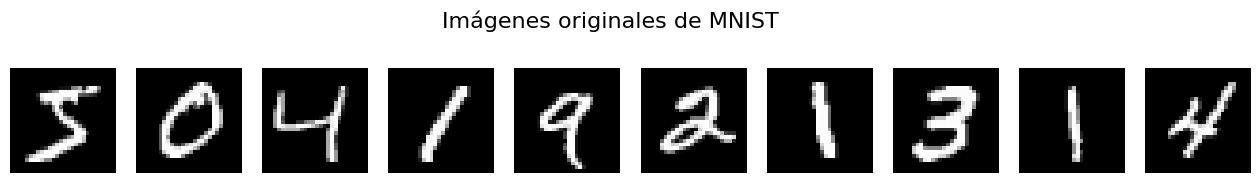

Epoch 1/40
235/235 - 7s - 30ms/step - loss: 0.2550 - val_loss: 0.1724
Epoch 2/40
235/235 - 3s - 15ms/step - loss: 0.1527 - val_loss: 0.1377
Epoch 3/40
235/235 - 3s - 14ms/step - loss: 0.1314 - val_loss: 0.1239
Epoch 4/40
235/235 - 4s - 16ms/step - loss: 0.1213 - val_loss: 0.1171
Epoch 5/40
235/235 - 5s - 20ms/step - loss: 0.1153 - val_loss: 0.1113
Epoch 6/40
235/235 - 5s - 22ms/step - loss: 0.1103 - val_loss: 0.1070
Epoch 7/40
235/235 - 6s - 24ms/step - loss: 0.1069 - val_loss: 0.1048
Epoch 8/40
235/235 - 4s - 19ms/step - loss: 0.1046 - val_loss: 0.1027
Epoch 9/40
235/235 - 4s - 16ms/step - loss: 0.1025 - val_loss: 0.1005
Epoch 10/40
235/235 - 4s - 17ms/step - loss: 0.1009 - val_loss: 0.0993
Epoch 11/40
235/235 - 4s - 19ms/step - loss: 0.0995 - val_loss: 0.0979
Epoch 12/40
235/235 - 6s - 27ms/step - loss: 0.0984 - val_loss: 0.0970
Epoch 13/40
235/235 - 3s - 14ms/step - loss: 0.0976 - val_loss: 0.0963
Epoch 14/40
235/235 - 3s - 15ms/step - loss: 0.0965 - val_loss: 0.0952
Epoch 15/40
235

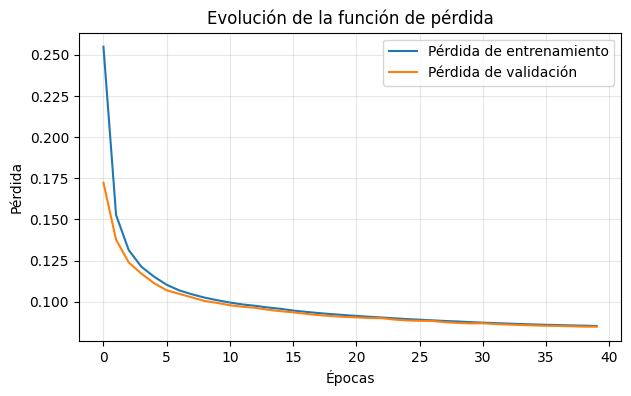

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


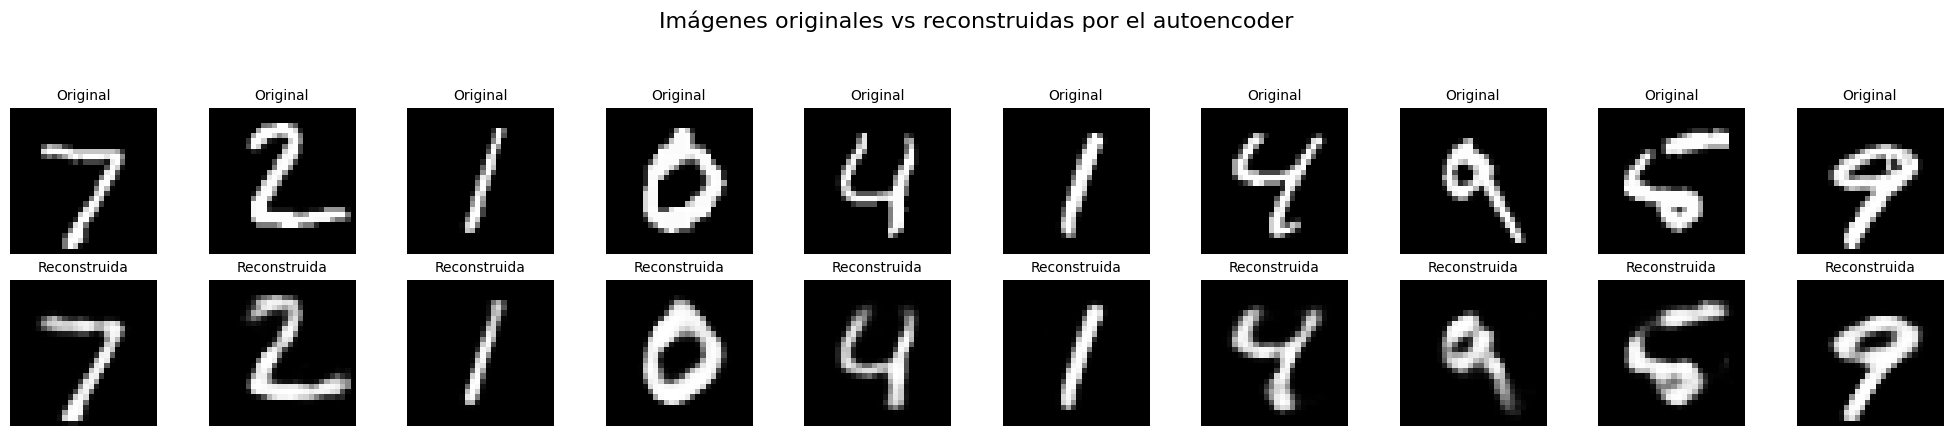

El espacio latente tiene 32 dimensiones. Cambia encoding_dim a 2 para visualizar.


In [ ]:
# AUTOENCODER SOBRE MNIST

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.datasets import mnist

# 1. Cargar y preparar el conjunto de datos MNIST
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((x_train.shape[0], -1))  # (60000, 784)
x_test = x_test.reshape((x_test.shape[0], -1))      # (10000, 784)

# Mostrar algunas imágenes originales de MNIST
def plot_samples(images, n=10, title='Imágenes originales de MNIST'):
    plt.figure(figsize=(16, 2))
    for i in range(n):
        ax = plt.subplot(1, n, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.suptitle(title, fontsize=16, y=1.05)
    plt.show()

plot_samples(x_train, n=10)

# 2. Definir la arquitectura del autoencoder
input_dim = x_train.shape[1]     # 784 (28x28)
encoding_dim = 32                # Dimensión del espacio latente

# ENCODER: transforma la imagen en un espacio comprimido
input_img = Input(shape=(input_dim,))
x = Dense(128, activation='relu')(input_img)
x = Dense(64, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)

# DECODER: reconstruye la imagen a partir de la representación comprimida
x = Dense(64, activation='relu')(encoded)
x = Dense(128, activation='relu')(x)
decoded = Dense(input_dim, activation='sigmoid')(x)

# Modelo completo: Autoencoder
autoencoder = Model(input_img, decoded)

# Encoder y decoder por separado (para análisis y visualización)
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layers = autoencoder.layers[-3](encoded_input)
decoder_layers = autoencoder.layers[-2](decoder_layers)
decoder_output = autoencoder.layers[-1](decoder_layers)
decoder = Model(encoded_input, decoder_output)

# 3. Compilar el modelo
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 4. Entrenar el autoencoder y mostrar la evolución de la pérdida
history = autoencoder.fit(
    x_train, x_train,
    epochs=40,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test),
    verbose=2
)

plt.figure(figsize=(7,4))
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Evolución de la función de pérdida')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# 5. Visualización: comparación imagen original vs reconstruida
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

def plot_comparison(original, reconstructed, n=10):
    """Visualiza las imágenes originales y reconstruidas lado a lado."""
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.title("Original", fontsize=10)
        plt.axis('off')

        # Reconstruida
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        plt.title("Reconstruida", fontsize=10)
        plt.axis('off')
    plt.suptitle("Imágenes originales vs reconstruidas por el autoencoder", y=1.08, fontsize=16)
    plt.tight_layout()
    plt.show()

plot_comparison(x_test, decoded_imgs, n=10)

# 6. (Opcional) Visualización del espacio latente si es 2D
def plot_latent_space(encoded_images):
    """Visualiza el espacio latente si tiene dimensión 2."""
    if encoded_images.shape[1] == 2:
        plt.figure(figsize=(7,7))
        plt.scatter(encoded_images[:, 0], encoded_images[:, 1], s=3, alpha=0.5)
        plt.title("Distribución de las representaciones latentes")
        plt.xlabel("Latente 1")
        plt.ylabel("Latente 2")
        plt.show()
    else:
        print("El espacio latente tiene", encoded_images.shape[1], "dimensiones. Cambia encoding_dim a 2 para visualizar.")

plot_latent_space(encoded_imgs)




In [ ]:
# Importación de librerías necesarias
from IPython.display import display, HTML
import html # Para escapar caracteres especiales en los títulos

# --- 1. ESTRUCTURACIÓN DE DATOS (CONTENIDO SOBRE EL ENCODER) ---

encoder_data = [
    {
        "titulo": "1. Contexto: ¿Qué es un Encoder?",
        "contenido": """
            <p>El <strong>encoder</strong> (o codificador) es la primera mitad de un autoencoder. Su misión es tomar datos de entrada de alta dimensión (como una imagen aplanada) y transformarlos en una <strong>representación comprimida de baja dimensión</strong>.</p>
            <p>Esta representación, conocida como <strong>codificación</strong> o <strong>vector latente</strong>, debe capturar las características más importantes y relevantes de la entrada, desechando el ruido y la información redundante.</p>
        """
    },
    {
        "titulo": "2. Visualización del Flujo de Datos del Encoder",
        "contenido": """
            <p>El código define un flujo donde los datos se comprimen progresivamente. La siguiente animación ilustra este proceso:</p>
            <div class="encoder-visualizer">
                <div class="flow-element input-vec"><span>Entrada<br>(784-dim)</span></div>
                <div class="arrow">&rarr;</div>
                <div class="flow-element layer-block"><span>Dense(128)<br>ReLU</span></div>
                <div class="arrow">&rarr;</div>
                <div class="flow-element layer-block medium"><span>Dense(64)<br>ReLU</span></div>
                <div class="arrow">&rarr;</div>
                <div class="flow-element layer-block small"><span>Dense(32)<br>ReLU</span></div>
                <div class="arrow">&rarr;</div>
                <div class="flow-element output-vec"><span>Espacio Latente<br>(32-dim)</span></div>
            </div>
            <blockquote>Este diseño de "embudo" o "cuello de botella" fuerza a la red a aprender una representación de datos eficiente y significativa.</blockquote>
        """
    },
    {
        "titulo": "3. Análisis Detallado del Código",
        "contenido": """
            <h4><code>input_img = Input(shape=(input_dim,))</code></h4>
            <p>Define la "puerta de entrada" del modelo. Le dice a Keras que espere un lote de vectores 1D, donde cada vector tiene un tamaño de <code>input_dim</code> (ej. 784 para MNIST).</p>

            <h4><code>x = Dense(128, activation='relu')(input_img)</code></h4>
            <p>La primera capa de procesamiento. Conecta cada una de las 784 entradas a 128 neuronas. La activación 'relu' introduce no linealidad, permitiendo al modelo aprender patrones complejos, no solo relaciones lineales.</p>

            <h4><code>x = Dense(64, activation='relu')(x)</code></h4>
            <p>Una segunda capa que comprime aún más la representación de 128 a 64 dimensiones. La red se ve forzada a refinar las características que ha aprendido.</p>

            <h4><code>encoded = Dense(encoding_dim, activation='relu')(x)</code></h4>
            <p>La capa final del encoder. Genera la representación comprimida final (el vector latente) con una dimensión de <code>encoding_dim</code> (ej. 32). Este pequeño vector es la "esencia" de la imagen de entrada que el encoder ha aprendido a extraer.</p>
        """
    },
    {
        "titulo": "4. Intuición y Resumen",
        "contenido": """
            <h4>Intuición</h4>
            <p>Imagina que el encoder es un artista experto que mira una foto detallada (la entrada de 784 píxeles) y es capaz de hacer un boceto minimalista (el vector latente de 32 valores) que captura la esencia de la foto sin dibujar cada detalle.</p>

            <h4>Resumen Rápido</h4>
            <div class="table-container">
                <table>
                    <thead><tr><th>Elemento de Código</th><th>Función Principal</th></tr></thead>
                    <tbody>
                        <tr><td><strong>Input(shape=...)</strong></td><td>Define la forma de los datos de entrada.</td></tr>
                        <tr><td><strong>Dense(128, 'relu')</strong></td><td>Extrae características iniciales y reduce la dimensión.</td></tr>
                        <tr><td><strong>Dense(64, 'relu')</strong></td><td>Refina y comprime aún más las características.</td></tr>
                        <tr><td><strong>Dense(encoding_dim, 'relu')</strong></td><td>Genera la codificación final y comprimida (vector latente).</td></tr>
                    </tbody>
                </table>
            </div>
            <p>Este vector latente <code>encoded</code> será después la entrada para el <strong>decoder</strong>, que intentará reconstruir la imagen original a partir de esta representación comprimida.</p>
        """
    }
]


# --- LÓGICA DE GENERACIÓN (REUTILIZADA) ---
def generar_tarjetas_definiciones(datos):
    html_generado = []
    for seccion in datos:
        titulo_escapado = html.escape(seccion['titulo'])
        contenido_html = seccion['contenido']
        plantilla_seccion = f"""
        <div class="topic-card">
            <div class="topic-header">
                <span class="topic-title">{titulo_escapado}</span>
                <i class="fas fa-chevron-down expand-icon"></i>
            </div>
            <div class="topic-content">
                {contenido_html}
            </div>
        </div>
        """
        html_generado.append(plantilla_seccion)
    return "\n".join(html_generado)

# --- PRE-CÁLCULO DEL CONTENIDO DINÁMICO ---
contenido_dinamico_html = generar_tarjetas_definiciones(encoder_data)

# --- PLANTILLA PROFESIONAL ---
plantilla_profesional = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>{main_title}</title>
  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700;800&family=JetBrains+Mono:wght@400;500&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">
  <style>
    :root {{
      --bg-primary: linear-gradient(135deg, #f0f2f5 0%, #d6e0f0 100%);
      --bg-secondary: rgba(255, 255, 255, 0.9);
      --bg-tertiary: rgba(248, 250, 252, 0.95);
      --text-primary: #34495e;
      --text-secondary: #5d6d7e;
      --text-light: #ffffff;
      --accent-primary: #3498db;
      --accent-secondary: #9b59b6;
      --accent-gradient: linear-gradient(135deg, var(--accent-primary) 0%, var(--accent-secondary) 100%);
      --border-color: rgba(200, 210, 220, 0.9);
      --shadow-card: 0 15px 35px rgba(0, 0, 0, 0.07);
      --border-radius: 20px;
      --transition: all 0.4s cubic-bezier(0.25, 0.8, 0.25, 1);
    }}
    [data-theme="dark"] {{
      --bg-primary: linear-gradient(135deg, #0f2027 0%, #203a43 50%, #2c5364 100%);
      --bg-secondary: rgba(26, 32, 44, 0.85);
      --bg-tertiary: rgba(45, 55, 72, 0.7);
      --text-primary: #f7fafc;
      --text-secondary: #a0aec0;
      --border-color: rgba(255, 255, 255, 0.15);
    }}
    * {{ margin: 0; padding: 0; box-sizing: border-box; }}
    html {{ scroll-behavior: smooth; }}
    body {{ font-family: 'Inter', sans-serif; line-height: 1.8; background: var(--bg-primary); color: var(--text-primary); transition: var(--transition); min-height: 100vh; position: relative; overflow-x: hidden; }}

    .container {{ max-width: 1000px; margin: 0 auto; padding: 2rem; z-index: 1; }}
    .header {{ text-align: center; margin-bottom: 3rem; position: relative; }}
    .main-title {{ font-size: clamp(2.2rem, 5vw, 3.8rem); font-weight: 800; background: var(--accent-gradient); -webkit-background-clip: text; -webkit-text-fill-color: transparent; background-clip: text; margin-bottom: 1.5rem; }}

    .theme-toggle {{ position: fixed; top: 2rem; right: 2rem; width: 60px; height: 60px; border: 1px solid var(--border-color); border-radius: 50%; background: var(--bg-secondary); backdrop-filter: blur(15px); box-shadow: var(--shadow-card); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.4rem; color: var(--accent-primary); transition: var(--transition); z-index: 1000; }}
    .theme-toggle:hover {{ transform: scale(1.15) rotate(180deg); }}

    .lesson-container {{ display: flex; flex-direction: column; gap: 1.5rem; }}
    .topic-card {{ background: var(--bg-secondary); backdrop-filter: blur(20px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 2px solid var(--border-color); overflow: hidden; transition: var(--transition); }}
    .topic-header {{ cursor: pointer; padding: 1.5rem 2rem; display: flex; justify-content: space-between; align-items: center; }}
    .topic-title {{ font-size: 1.3rem; font-weight: 600; color: var(--text-primary); }}
    .expand-icon {{ font-size: 1.2rem; color: var(--text-secondary); transition: var(--transition); }}
    .topic-card.open .expand-icon {{ transform: rotate(180deg); }}
    .topic-content {{ max-height: 0; overflow: hidden; transition: max-height 1.2s ease, padding 1.2s ease; background: var(--bg-tertiary); }}
    .topic-card.open .topic-content {{ max-height: 4500px; padding: 1.5rem 2rem; border-top: 1px solid var(--border-color); }}

    .topic-content h4 {{ color: var(--text-primary); margin-top: 1.5rem; margin-bottom: 0.5rem; font-size: 1.1rem; }}
    .topic-content p, .topic-content li {{ color: var(--text-secondary); line-height: 1.7; }}
    .topic-content strong {{ color: var(--text-primary); font-weight: 700; }}
    .topic-content blockquote {{
        border-left: 4px solid var(--accent-primary); padding-left: 1.5rem; margin: 1.5rem 0;
        font-style: italic; color: var(--text-secondary); background: rgba(52, 152, 219, 0.07);
        border-radius: 0 8px 8px 0; padding: 1rem 1.5rem;
    }}
    .table-container {{ overflow-x: auto; margin: 1.5rem 0; }}
    table {{ width: 100%; border-collapse: collapse; }}
    th, td {{ padding: 12px 15px; border: 1px solid var(--border-color); text-align: left; }}
    thead th {{ background-color: var(--bg-tertiary); color: var(--text-primary); font-weight: 600; }}

    /* --- Estilos del Visualizador del Encoder --- */
    .encoder-visualizer {{ display: flex; align-items: center; justify-content: center; flex-wrap: wrap; gap: 10px; margin: 2rem 0; font-family: 'JetBrains Mono'; text-align: center; }}
    .flow-element {{ background: var(--bg-secondary); border: 2px solid var(--accent-primary); color: var(--text-primary); padding: 0.5rem; border-radius: 8px; display: flex; align-items: center; justify-content: center; }}
    .input-vec, .output-vec {{ width: 80px; height: 100px; }}
    .layer-block {{ width: 100px; height: 100px; background-image: radial-gradient(circle, var(--accent-secondary) 1px, transparent 1px); background-size: 10px 10px; }}
    .layer-block.medium {{ height: 80px; }}
    .layer-block.small {{ height: 60px; }}
    .output-vec {{ width: 60px; height: 60px; border-color: var(--accent-secondary); background: var(--accent-secondary); color: var(--text-light); }}
    .arrow {{ font-size: 2rem; color: var(--text-secondary); opacity: 0.6; }}

    footer {{ text-align: center; margin-top: 4rem; padding-top: 2rem; border-top: 1px solid var(--border-color); }}
    footer p {{ color: var(--text-secondary); font-size: 0.9rem; opacity: 0.8; }}
  </style>
</head>
<body data-theme="light">
  <div class="container">
    <header class="header">
      <h1 class="main-title">{main_title}</h1>
    </header>
    <div class="theme-toggle" id="themeToggleButton" title="Cambiar tema"><i class="fas fa-moon" id="theme-icon"></i></div>

    <div class="lesson-container">
        {dynamic_content_html}
    </div>

    <footer>
      <p>{footer_text}</p>
    </footer>
  </div>

  <script>
    (function() {{
        const themeToggleButton = document.getElementById('themeToggleButton');
        const themeIcon = document.getElementById('theme-icon');
        const bodyEl = document.body;

        function setTheme(theme) {{
            bodyEl.setAttribute('data-theme', theme);
            localStorage.setItem('theme', theme);
            if (themeIcon) {{ themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }}
        }}

        themeToggleButton.addEventListener('click', () => {{
            const newTheme = (bodyEl.getAttribute('data-theme') || 'light') === 'dark' ? 'light' : 'dark';
            setTheme(newTheme);
        }});

        setTheme(localStorage.getItem('theme') || 'light');

        document.querySelectorAll('.topic-header').forEach(header => {{
            header.addEventListener('click', () => {{
                const card = header.parentElement;
                card.classList.toggle('open');
            }});
        }});

        const firstTopic = document.querySelector('.topic-card');
        if(firstTopic) {{
            firstTopic.classList.add('open');
        }}
    }})();
  </script>
</body>
</html>
"""

# --- INYECCIÓN DINÁMICA Y RENDERIZADO FINAL ---
final_html = plantilla_profesional.format(
    main_title="Anatomía de un Encoder",
    dynamic_content_html=contenido_dinamico_html,
    footer_text="Material elaborado por el profesor Sergio Gevatschnaider."
)

display(HTML(final_html))

Elemento de Código,Función Principal
Input(shape=...),Define la forma de los datos de entrada.
"Dense(128, 'relu')",Extrae características iniciales y reduce la dimensión.
"Dense(64, 'relu')",Refina y comprime aún más las características.
"Dense(encoding_dim, 'relu')",Genera la codificación final y comprimida (vector latente).


In [ ]:
# Importación de librerías necesarias
from IPython.display import display, HTML
import html # Para escapar caracteres especiales en los títulos

# --- 1. ESTRUCTURACIÓN DE DATOS (CONTENIDO SOBRE ESPACIO LATENTE) ---

# --- Bloque de Conclusión ---
conclusion_html = """
<div class="content-block conclusion-block">
    <h2>Resumen Final</h2>
    <p>El espacio latente es un espacio compacto y codificado donde la información relevante de los datos originales se representa de forma eficiente. Es fundamental para que los autoencoders y otros modelos aprendan, reconstruyan y generen datos, facilitando el análisis y manipulación de información compleja en formas manejables y útiles.</p>
</div>
"""

# --- Contenido Principal para el Acordeón ---
latent_space_data = [
    {
        "titulo": "1. Definición: El Mapa Oculto de los Datos",
        "contenido": """
            <p>El <strong>espacio latente</strong> es un concepto central en el aprendizaje no supervisado. En términos simples, es un <strong>espacio de dimensión reducida</strong> donde el modelo (como un autoencoder) aprende a representar la información esencial y comprimida de los datos originales.</p>
            <blockquote>El encoder de un autoencoder aprende a mapear datos complejos de alta dimensión a este espacio compacto, y cada punto en este nuevo espacio corresponde a una "codificación" abstracta de una entrada.</blockquote>
        """
    },
    {
        "titulo": "2. Visualizando la Magia del Espacio Latente",
        "contenido": """
            <p>Imagina que cada uno de nuestros datos (ej. una imagen) es un punto en un espacio vasto y caótico. El encoder aprende a "reubicar" estos puntos en un mapa más simple y ordenado: el espacio latente. En este nuevo mapa, los puntos similares se agrupan.</p>
            <div class="latent-space-visualizer">
                <div class="space-container">
                    <h4>Espacio Original (Alta Dimensión)</h4>
                    <div class="high-dim-space"></div>
                </div>
                <div class="arrow">&rarr;<br/><span>Encoder</span>&rarr;</div>
                <div class="space-container">
                    <h4>Espacio Latente (Baja Dimensión)</h4>
                    <div class="low-dim-space"></div>
                </div>
            </div>
        """
    },
    {
        "titulo": "3. Propiedades y Estructura",
        "contenido": """
            <ul>
                <li><strong>Compresión:</strong> Al tener una dimensión mucho menor, obliga al modelo a destilar la información más importante, eliminando ruido y redundancias.</li>
                <li><strong>Estructura Semántica:</strong> La disposición de los puntos no es aleatoria. La distancia y la dirección en el espacio latente a menudo capturan relaciones significativas. Puntos cercanos representan datos con características similares.</li>
                <li><strong>Continuidad:</strong> Suele ser un espacio vectorial continuo, lo que permite operaciones matemáticas como la interpolación para generar nuevos datos coherentes entre dos puntos conocidos.</li>
            </ul>
        """
    },
    {
        "titulo": "4. Comparativa: Espacio Original vs. Espacio Latente",
        "contenido": """
            <p>La transformación del espacio original al latente cambia fundamentalmente la naturaleza de la representación de los datos.</p>
            <div class="table-container">
                <table>
                    <thead>
                        <tr><th>Aspecto</th><th>Espacio Original</th><th>Espacio Latente</th></tr>
                    </thead>
                    <tbody>
                        <tr><td><strong>Dimensionalidad</strong></td><td>Muy alta (ej. 784 para MNIST)</td><td>Muy baja (ej. 32 o menos)</td></tr>
                        <tr><td><strong>Interpretabilidad</strong></td><td>Directa (cada dimensión es un píxel)</td><td>Abstracta (cada dimensión es una característica aprendida)</td></tr>
                        <tr><td><strong>Ruido y Redundancia</strong></td><td>Alta presencia posible</td><td>Minimizada, información comprimida</td></tr>
                        <tr><td><strong>Estructura</strong></td><td>Dispersa, sin orden aparente</td><td>Organizada, con clústeres y patrones</td></tr>
                        <tr><td><strong>Uso</strong></td><td>Datos crudos para entrenamiento</td><td>Representación para análisis, generación o visualización</td></tr>
                    </tbody>
                </table>
        """
    },
    {
        "titulo": "5. Importancia y Aplicaciones Prácticas",
        "contenido": """
            <p>El espacio latente no es solo una curiosidad teórica; es la base de muchas aplicaciones poderosas:</p>
            <ul>
                <li><strong>Reducción de Dimensionalidad y Visualización:</strong> Se puede visualizar el espacio latente (si es 2D/3D) o usar técnicas como t-SNE/UMAP para ver cómo se agrupan los datos.</li>
                <li><strong>Generación de Datos:</strong> En modelos como los VAEs, podemos tomar un punto aleatorio del espacio latente y pasarlo por el decoder para generar una muestra de datos completamente nueva y realista.</li>
                <li><strong>Transferencia de Conocimiento:</strong> Las representaciones latentes, al capturar la esencia de los datos, pueden usarse como características de entrada para otros modelos, mejorando su rendimiento (transfer learning).</li>
            </ul>
        """
    }
]


# --- LÓGICA DE GENERACIÓN (REUTILIZADA) ---
def generar_tarjetas_definiciones(datos):
    html_generado = []
    for seccion in datos:
        titulo_escapado = html.escape(seccion['titulo'])
        contenido_html = seccion['contenido']
        plantilla_seccion = f"""
        <div class="topic-card">
            <div class="topic-header">
                <span class="topic-title">{titulo_escapado}</span>
                <i class="fas fa-chevron-down expand-icon"></i>
            </div>
            <div class="topic-content">
                {contenido_html}
            </div>
        </div>
        """
        html_generado.append(plantilla_seccion)
    return "\n".join(html_generado)

# --- PRE-CÁLCULO DEL CONTENIDO DINÁMICO ---
contenido_dinamico_html = generar_tarjetas_definiciones(latent_space_data)

# --- PLANTILLA PROFESIONAL ---
plantilla_profesional = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>{main_title}</title>
  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700;800&family=JetBrains+Mono:wght@400;500&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">
  <style>
    :root {{
      --bg-primary: linear-gradient(135deg, #f5f7fa 0%, #c3cfe2 100%);
      --bg-secondary: rgba(255, 255, 255, 0.9);
      --bg-tertiary: rgba(248, 250, 252, 0.95);
      --text-primary: #2c3e50;
      --text-secondary: #34495e;
      --text-light: #ffffff;
      --accent-primary: #8e44ad;
      --accent-secondary: #3498db;
      --accent-gradient: linear-gradient(135deg, var(--accent-primary) 0%, var(--accent-secondary) 100%);
      --border-color: rgba(200, 210, 220, 0.9);
      --shadow-card: 0 15px 35px rgba(0, 0, 0, 0.07);
      --border-radius: 20px;
      --transition: all 0.4s cubic-bezier(0.25, 0.8, 0.25, 1);
    }}
    [data-theme="dark"] {{
      --bg-primary: linear-gradient(135deg, #141e30 0%, #243b55 100%);
      --bg-secondary: rgba(26, 32, 44, 0.75);
      --bg-tertiary: rgba(45, 55, 72, 0.6);
      --text-primary: #f7fafc;
      --text-secondary: #a0aec0;
      --border-color: rgba(255, 255, 255, 0.1);
    }}
    * {{ margin: 0; padding: 0; box-sizing: border-box; }}
    html {{ scroll-behavior: smooth; }}
    body {{ font-family: 'Inter', sans-serif; line-height: 1.8; background: var(--bg-primary); color: var(--text-primary); transition: var(--transition); min-height: 100vh; position: relative; overflow-x: hidden; }}

    .container {{ max-width: 1000px; margin: 0 auto; padding: 2rem; z-index: 1; }}
    .header {{ text-align: center; margin-bottom: 3rem; position: relative; }}
    .main-title {{ font-size: clamp(2.2rem, 5vw, 3.8rem); font-weight: 800; background: var(--accent-gradient); -webkit-background-clip: text; -webkit-text-fill-color: transparent; background-clip: text; margin-bottom: 1.5rem; }}

    .theme-toggle {{ position: fixed; top: 2rem; right: 2rem; width: 60px; height: 60px; border: 1px solid var(--border-color); border-radius: 50%; background: var(--bg-secondary); backdrop-filter: blur(15px); box-shadow: var(--shadow-card); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.4rem; color: var(--accent-primary); transition: var(--transition); z-index: 1000; }}
    .theme-toggle:hover {{ transform: scale(1.15) rotate(180deg); }}

    .lesson-container {{ display: flex; flex-direction: column; gap: 1.5rem; }}
    .topic-card {{ background: var(--bg-secondary); backdrop-filter: blur(20px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 2px solid var(--border-color); overflow: hidden; transition: var(--transition); }}
    .topic-header {{ cursor: pointer; padding: 1.5rem 2rem; display: flex; justify-content: space-between; align-items: center; }}
    .topic-title {{ font-size: 1.3rem; font-weight: 600; color: var(--text-primary); }}
    .expand-icon {{ font-size: 1.2rem; color: var(--text-secondary); transition: var(--transition); }}
    .topic-card.open .expand-icon {{ transform: rotate(180deg); }}
    .topic-content {{ max-height: 0; overflow: hidden; transition: max-height 1.2s ease, padding 1.2s ease; background: var(--bg-tertiary); }}
    .topic-card.open .topic-content {{ max-height: 4500px; padding: 1.5rem 2rem; border-top: 1px solid var(--border-color); }}

    .topic-content h4 {{ color: var(--text-primary); margin-top: 1.5rem; margin-bottom: 0.5rem; font-size: 1.1rem; }}
    .topic-content p, .topic-content li {{ color: var(--text-secondary); line-height: 1.7; }}
    .topic-content ul {{ padding-left: 25px; margin-bottom: 1rem; }}
    .topic-content strong {{ color: var(--text-primary); font-weight: 700; }}
    .topic-content blockquote {{
        border-left: 4px solid var(--accent-primary); padding-left: 1.5rem; margin: 1.5rem 0; font-style: italic; color: var(--text-secondary);
        background: rgba(142, 68, 173, 0.07); border-radius: 0 8px 8px 0; padding: 1rem 1.5rem;
    }}
    .table-container {{ overflow-x: auto; margin: 1.5rem 0; }}
    table {{ width: 100%; border-collapse: collapse; }}
    th, td {{ padding: 12px 15px; border: 1px solid var(--border-color); text-align: left; }}
    thead th {{ background-color: var(--bg-tertiary); color: var(--text-primary); font-weight: 600; }}

    .conclusion-block {{ border-left: 5px solid var(--accent-secondary); margin-top: 2rem; padding: 2rem; background: var(--bg-secondary); backdrop-filter: blur(20px); }}
    .conclusion-block h2 {{ color: var(--accent-secondary); }}

    /* --- Estilos del Visualizador de Espacio Latente --- */
    .latent-space-visualizer {{ display: flex; align-items: center; justify-content: space-between; margin: 2rem 0; gap: 1rem; flex-wrap: wrap; }}
    .space-container {{ flex: 1; min-width: 250px; }}
    .space-container h4 {{ text-align: center; margin-bottom: 1rem; color: var(--text-secondary); }}
    .high-dim-space, .low-dim-space {{ position: relative; width: 100%; height: 250px; border: 2px dashed var(--border-color); border-radius: var(--border-radius); background: rgba(0,0,0,0.02); }}
    .point {{ position: absolute; width: 8px; height: 8px; border-radius: 50%; animation: pulse 2s infinite ease-in-out; }}
    @keyframes pulse {{ 0%, 100% {{ opacity: 0.6; transform: scale(0.8); }} 50% {{ opacity: 1; transform: scale(1.2); }} }}
    .arrow {{ text-align: center; font-size: 2.5rem; color: var(--accent-primary); font-family: 'JetBrains Mono'; opacity: 0.7; }}
    .arrow span {{ font-size: 1rem; }}

    /* Colores para los clústeres */
    .point.cluster-1 {{ background-color: #e74c3c; }}
    .point.cluster-2 {{ background-color: #2ecc71; }}
    .point.cluster-3 {{ background-color: #f1c40f; }}

    footer {{ text-align: center; margin-top: 4rem; padding-top: 2rem; border-top: 1px solid var(--border-color); }}
    footer p {{ color: var(--text-secondary); font-size: 0.9rem; opacity: 0.8; }}
  </style>
</head>
<body data-theme="dark">
  <div class="container">
    <header class="header">
      <h1 class="main-title">{main_title}</h1>
    </header>
    <div class="theme-toggle" id="themeToggleButton" title="Cambiar tema"><i class="fas fa-moon" id="theme-icon"></i></div>

    <div class="lesson-container">
        {dynamic_content_html}
    </div>

    {conclusion_html}

    <footer>
      <p>{footer_text}</p>
    </footer>
  </div>

  <script>
    (function() {{
        const themeToggleButton = document.getElementById('themeToggleButton');
        const themeIcon = document.getElementById('theme-icon');
        const bodyEl = document.body;

        function setTheme(theme) {{
            bodyEl.setAttribute('data-theme', theme);
            localStorage.setItem('theme', theme);
            if (themeIcon) {{ themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }}
        }}

        themeToggleButton.addEventListener('click', () => {{
            const newTheme = (bodyEl.getAttribute('data-theme') || 'dark') === 'dark' ? 'light' : 'dark';
            setTheme(newTheme);
        }});

        setTheme(localStorage.getItem('theme') || 'dark');

        document.querySelectorAll('.topic-header').forEach(header => {{
            header.addEventListener('click', () => {{
                const card = header.parentElement;
                card.classList.toggle('open');
            }});
        }});

        const firstTopic = document.querySelector('.topic-card');
        if(firstTopic) firstTopic.classList.add('open');

        // --- Lógica del Visualizador de Espacio Latente ---
        const highDimContainer = document.querySelector('.high-dim-space');
        const lowDimContainer = document.querySelector('.low-dim-space');
        const numPoints = 60;
        const clusters = [
            {{ x: 25, y: 30, spread: 20, colorClass: 'cluster-1' }},
            {{ x: 70, y: 65, spread: 25, colorClass: 'cluster-2' }},
            {{ x: 40, y: 75, spread: 15, colorClass: 'cluster-3' }}
        ];

        if (highDimContainer && lowDimContainer) {{
            // Generar puntos caóticos para el espacio original
            for (let i = 0; i < numPoints; i++) {{
                const point = document.createElement('div');
                point.className = 'point';
                point.style.left = `${{Math.random() * 95}}%`;
                point.style.top = `${{Math.random() * 95}}%`;
                const randomCluster = Math.floor(Math.random() * clusters.length) + 1;
                point.classList.add(`cluster-${{randomCluster}}`);
                highDimContainer.appendChild(point);
            }}

            // Generar puntos en clústeres para el espacio latente
            for (let i = 0; i < numPoints; i++) {{
                const clusterIndex = i % clusters.length;
                const cluster = clusters[clusterIndex];

                const point = document.createElement('div');
                point.className = `point ${{cluster.colorClass}}`;

                const x = cluster.x + (Math.random() - 0.5) * cluster.spread;
                const y = cluster.y + (Math.random() - 0.5) * cluster.spread;

                point.style.left = `${{Math.max(0, Math.min(95, x))}}%`;
                point.style.top = `${{Math.max(0, Math.min(95, y))}}%`;

                lowDimContainer.appendChild(point);
            }}
        }}

    }})();
  </script>
</body>
</html>
"""

# --- INYECCIÓN DINÁMICA Y RENDERIZADO FINAL ---
final_html = plantilla_profesional.format(
    main_title="El Espacio Latente: El Mapa Oculto de los Datos",
    dynamic_content_html=contenido_dinamico_html,
    conclusion_html=conclusion_html,
    footer_text="Material elaborado por el profesor Sergio Gevatschnaider."
)

display(HTML(final_html))

Aspecto,Espacio Original,Espacio Latente
Dimensionalidad,Muy alta (ej. 784 para MNIST),Muy baja (ej. 32 o menos)
Interpretabilidad,Directa (cada dimensión es un píxel),Abstracta (cada dimensión es una característica aprendida)
Ruido y Redundancia,Alta presencia posible,"Minimizada, información comprimida"
Estructura,"Dispersa, sin orden aparente","Organizada, con clústeres y patrones"
Uso,Datos crudos para entrenamiento,"Representación para análisis, generación o visualización"


In [ ]:
# Importación de librerías necesarias
from IPython.display import display, HTML
import html # Para escapar caracteres especiales en los títulos

# --- 1. ESTRUCTURACIÓN DE DATOS (CONTENIDO SOBRE RESHAPE) ---

reshape_data = [
    {
        "titulo": "1. ¿Qué es reshape?",
        "contenido": """
            <p><code>reshape</code> es un método fundamental en librerías como NumPy, TensorFlow y PyTorch que permite <strong>cambiar la forma (shape) de un arreglo o tensor sin alterar sus datos</strong>.</p>
            <p>Básicamente, reorganiza los elementos existentes en una nueva estructura dimensional, siempre y cuando el número total de elementos se conserve. Es como tomar una caja de legos y reordenarlos de una formación cuadrada a una fila larga.</p>
        """
    },
    {
        "titulo": "2. Visualizando la Transformación",
        "contenido": """
            <p>Imaginemos que tenemos un lote de datos de imágenes, como 60,000 imágenes de MNIST con forma (28, 28).</p>
            <p>El método <code>.reshape((60000, -1))</code> realiza la siguiente transformación conceptual:</p>
            <div class="reshape-visualizer">
                <div class="data-stack">
                    <div class="label">Forma Original: (60000, 28, 28)</div>
                    <div class="matrix"></div>
                    <div class="matrix"></div>
                    <div class="matrix"></div>
                    <span>...</span>
                </div>
                <div class="arrow">
                    <span>.reshape((60000, -1))</span> &rarr;
                </div>
                <div class="data-vector">
                    <div class="label">Nueva Forma: (60000, 784)</div>
                    <div class="vector-rows"></div>
                </div>
            </div>
            <p style="text-align: center; margin-top: 1rem;">Cada imagen 2D se "aplana" para convertirse en una fila (un vector 1D) en la nueva matriz de datos.</p>
        """
    },
    {
        "titulo": "3. El Poder del Argumento `-1`",
        "contenido": """
            <p>El <code>-1</code> en una operación de <code>reshape</code> es un marcador de posición muy útil que le dice a la librería: <strong>"Calcula automáticamente el tamaño de esta dimensión por mí"</strong>.</p>
            <p>En el código <code>x_train.reshape((x_train.shape[0], -1))</code>:</p>
            <ul>
                <li><code>x_train.shape[0]</code> fija la primera dimensión (el número de muestras, ej. 60,000).</li>
                <li><code>-1</code> le indica a NumPy/TensorFlow que calcule la segunda dimensión para que se ajuste a todos los datos restantes. En este caso, calcula 28 × 28 = 784.</li>
            </ul>
            <p>Esto hace que el código sea más robusto, ya que no necesitas codificar manualmente el tamaño aplanado. Funcionará igual para imágenes de 32x32 o cualquier otra dimensión.</p>
        """
    },
    {
        "titulo": "4. ¿Para Qué se Usa en Machine Learning?",
        "contenido": """
            <p>La principal aplicación de <code>reshape</code> es preparar los datos para que sean compatibles con ciertas capas de una red neuronal.</p>
            <ul>
                <li>Muchos modelos clásicos, como <strong>autoencoders simples</strong> o <strong>redes neuronales densas (fully connected)</strong>, requieren que la entrada para cada muestra sea un vector 1D.</li>
                <li>Si los datos de entrada son imágenes 2D, tensores 3D (videos) u otras estructuras multidimensionales, es necesario "aplanarlos" a un vector 1D antes de pasarlos a estas capas.</li>
            </ul>
            <blockquote>
                <strong>Resumen Clave:</strong> <code>.reshape((n_samples, -1))</code> convierte datos con múltiples dimensiones por muestra en vectores 1D para cada muestra, permitiendo alimentar modelos que esperan entradas vectoriales.
            </blockquote>
        """
    }
]


# --- LÓGICA DE GENERACIÓN (REUTILIZADA) ---
def generar_tarjetas_definiciones(datos):
    html_generado = []
    for seccion in datos:
        titulo_escapado = html.escape(seccion['titulo'])
        contenido_html = seccion['contenido']
        plantilla_seccion = f"""
        <div class="topic-card">
            <div class="topic-header">
                <span class="topic-title">{titulo_escapado}</span>
                <i class="fas fa-chevron-down expand-icon"></i>
            </div>
            <div class="topic-content">
                {contenido_html}
            </div>
        </div>
        """
        html_generado.append(plantilla_seccion)
    return "\n".join(html_generado)

# --- PRE-CÁLCULO DEL CONTENIDO DINÁMICO ---
contenido_dinamico_html = generar_tarjetas_definiciones(reshape_data)

# --- PLANTILLA PROFESIONAL ---
plantilla_profesional = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>{main_title}</title>
  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700;800&family=JetBrains+Mono:wght@400;500&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">
  <style>
    :root {{
      --bg-primary: linear-gradient(135deg, #e0eafc 0%, #cfdef3 100%);
      --bg-secondary: rgba(255, 255, 255, 0.9);
      --bg-tertiary: rgba(248, 250, 252, 0.85);
      --text-primary: #34495e;
      --text-secondary: #5d6d7e;
      --text-light: #ffffff;
      --accent-primary: #16a085;
      --accent-secondary: #27ae60;
      --accent-gradient: linear-gradient(135deg, var(--accent-primary) 0%, var(--accent-secondary) 100%);
      --border-color: rgba(226, 232, 240, 0.9);
      --shadow-card: 0 15px 35px rgba(0, 0, 0, 0.07);
      --border-radius: 20px;
      --transition: all 0.4s cubic-bezier(0.25, 0.8, 0.25, 1);
    }}
    [data-theme="dark"] {{
      --bg-primary: linear-gradient(135deg, #0f2027 0%, #203a43 50%, #2c5364 100%);
      --bg-secondary: rgba(26, 32, 44, 0.85);
      --bg-tertiary: rgba(45, 55, 72, 0.7);
      --text-primary: #f7fafc;
      --text-secondary: #a0aec0;
      --border-color: rgba(255, 255, 255, 0.15);
    }}
    * {{ margin: 0; padding: 0; box-sizing: border-box; }}
    html {{ scroll-behavior: smooth; }}
    body {{ font-family: 'Inter', sans-serif; line-height: 1.8; background: var(--bg-primary); color: var(--text-primary); transition: var(--transition); min-height: 100vh; position: relative; overflow-x: hidden; }}

    .container {{ max-width: 1000px; margin: 0 auto; padding: 2rem; z-index: 1; }}
    .header {{ text-align: center; margin-bottom: 3rem; position: relative; }}
    .main-title {{ font-size: clamp(2.2rem, 5vw, 3.8rem); font-weight: 800; background: var(--accent-gradient); -webkit-background-clip: text; -webkit-text-fill-color: transparent; background-clip: text; margin-bottom: 1.5rem; }}

    .theme-toggle {{ position: fixed; top: 2rem; right: 2rem; width: 60px; height: 60px; border: 1px solid var(--border-color); border-radius: 50%; background: var(--bg-secondary); backdrop-filter: blur(15px); box-shadow: var(--shadow-card); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.4rem; color: var(--accent-primary); transition: var(--transition); z-index: 1000; }}
    .theme-toggle:hover {{ transform: scale(1.15) rotate(180deg); }}

    .lesson-container {{ display: flex; flex-direction: column; gap: 1.5rem; }}
    .topic-card {{ background: var(--bg-secondary); backdrop-filter: blur(20px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 2px solid var(--border-color); overflow: hidden; transition: var(--transition); }}
    .topic-header {{ cursor: pointer; padding: 1.5rem 2rem; display: flex; justify-content: space-between; align-items: center; }}
    .topic-title {{ font-size: 1.3rem; font-weight: 600; color: var(--text-primary); }}
    .expand-icon {{ font-size: 1.2rem; color: var(--text-secondary); transition: var(--transition); }}
    .topic-card.open .expand-icon {{ transform: rotate(180deg); }}
    .topic-content {{ max-height: 0; overflow: hidden; transition: max-height 1.2s ease, padding 1.2s ease; background: var(--bg-tertiary); }}
    .topic-card.open .topic-content {{ max-height: 4500px; padding: 1.5rem 2rem; border-top: 1px solid var(--border-color); }}

    .topic-content p, .topic-content li {{ color: var(--text-secondary); line-height: 1.7; }}
    .topic-content ul {{ padding-left: 25px; margin-bottom: 1rem; }}
    .topic-content strong {{ color: var(--text-primary); font-weight: 700; }}
    .topic-content blockquote {{
        border-left: 4px solid var(--accent-primary); padding-left: 1.5rem; margin: 1.5rem 0;
        font-style: italic; color: var(--text-secondary); background: rgba(22, 160, 133, 0.07);
        border-radius: 0 8px 8px 0; padding: 1rem 1.5rem;
    }}

    /* --- Estilos del Visualizador de Reshape --- */
    .reshape-visualizer {{ display: flex; align-items: center; justify-content: space-around; margin: 2rem 0; padding: 1rem; background: rgba(0,0,0,0.02); border-radius: 10px; }}
    .data-stack, .data-vector {{ text-align: center; color: var(--text-secondary); }}
    .label {{ font-family: 'JetBrains Mono'; font-weight: 600; margin-bottom: 1rem; display: block; }}
    .data-stack .matrix {{ width: 80px; height: 80px; background: var(--accent-secondary); border: 2px solid var(--accent-primary); margin: -45px 0 0 15px; transform: skewX(-20deg); box-shadow: -5px 5px 10px rgba(0,0,0,0.1); }}
    .data-stack .matrix:first-child {{ margin-top: 0; margin-left: 0; }}
    .data-vector .vector-rows {{ width: 60px; height: 120px; background-image: repeating-linear-gradient(var(--bg-tertiary) 0 2px, var(--accent-primary) 2px 4px); border: 2px solid var(--accent-primary); }}
    .arrow {{ font-size: 1.5rem; font-weight: 700; color: var(--accent-primary); font-family: 'JetBrains Mono'; }}
    .arrow span {{ font-size: 0.9rem; display: block; }}

    footer {{ text-align: center; margin-top: 4rem; padding-top: 2rem; border-top: 1px solid var(--border-color); }}
    footer p {{ color: var(--text-secondary); font-size: 0.9rem; opacity: 0.8; }}
  </style>
</head>
<body data-theme="light">
  <div class="container">
    <header class="header">
      <h1 class="main-title">{main_title}</h1>
    </header>
    <div class="theme-toggle" id="themeToggleButton" title="Cambiar tema"><i class="fas fa-moon" id="theme-icon"></i></div>

    <div class="lesson-container">
        {dynamic_content_html}
    </div>

    <footer>
      <p>{footer_text}</p>
    </footer>
  </div>

  <script>
    (function() {{
        const themeToggleButton = document.getElementById('themeToggleButton');
        const themeIcon = document.getElementById('theme-icon');
        const bodyEl = document.body;

        function setTheme(theme) {{
            bodyEl.setAttribute('data-theme', theme);
            localStorage.setItem('theme', theme);
            if (themeIcon) {{ themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }}
        }}

        themeToggleButton.addEventListener('click', () => {{
            const newTheme = (bodyEl.getAttribute('data-theme') || 'light') === 'dark' ? 'light' : 'dark';
            setTheme(newTheme);
        }});

        setTheme(localStorage.getItem('theme') || 'light');

        document.querySelectorAll('.topic-header').forEach(header => {{
            header.addEventListener('click', () => {{
                const card = header.parentElement;
                card.classList.toggle('open');
            }});
        }});

        const firstTopic = document.querySelector('.topic-card');
        if(firstTopic) {{
            firstTopic.classList.add('open');
        }}
    }})();
  </script>
</body>
</html>
"""

# --- INYECCIÓN DINÁMICA Y RENDERIZADO FINAL ---
final_html = plantilla_profesional.format(
    main_title="El Poder de Reorganizar: Guía sobre 'reshape'",
    dynamic_content_html=contenido_dinamico_html,
    footer_text="Material elaborado por el profesor Sergio Gevatschnaider."
)

display(HTML(final_html))

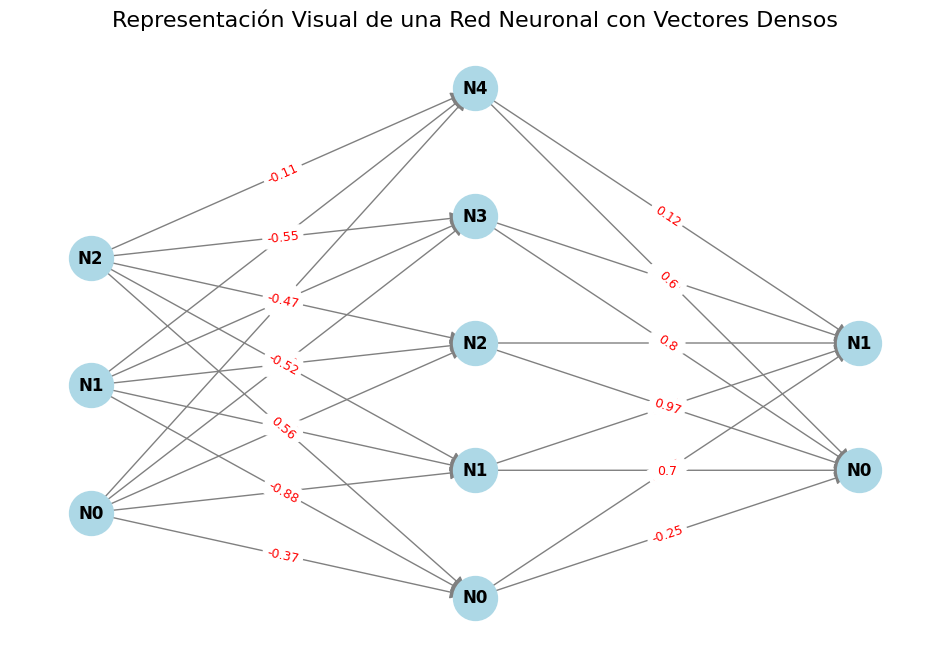

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def draw_dense_nn(layer_sizes, weight_ranges=None):
    """
    Dibuja una red neuronal feedforward simple con vectores densos como grafo.

    Args:
        layer_sizes (list of int): Número de neuronas en cada capa, p.ej. [3, 5, 2]
        weight_ranges (list of tuple): Rango (min, max) para pesos aleatorios entre capas.
                                       Si None, se generan entre -1 y 1.
    """
    G = nx.DiGraph()
    pos = {}
    node_labels = {}
    edge_labels = {}

    # Coordenadas para colocar los nodos (x = capa, y = posición dentro de la capa)
    max_layer_size = max(layer_sizes)
    layer_spacing_x = 3
    layer_spacing_y = 1.5

    # Crear nodos y asignar posiciones
    node_id = 0
    layers_nodes = []
    for layer_idx, size in enumerate(layer_sizes):
        layer_nodes = []
        y_start = (max_layer_size - size) / 2  # para centrar verticalmente
        for i in range(size):
            node_name = f"L{layer_idx}_N{i}"
            G.add_node(node_name)
            # Posición: x = capa * spacing, y = posición con espacio para centrar
            pos[node_name] = (layer_idx * layer_spacing_x, y_start + i * layer_spacing_y)
            node_labels[node_name] = f"N{i}"
            layer_nodes.append(node_name)
            node_id += 1
        layers_nodes.append(layer_nodes)

    # Crear aristas (conexiones densas) con pesos aleatorios
    for i in range(len(layer_sizes) - 1):
        size_in = layer_sizes[i]
        size_out = layer_sizes[i+1]
        w_min, w_max = (-1, 1) if weight_ranges is None else weight_ranges[i]
        weights = np.round(np.random.uniform(w_min, w_max, size=(size_in, size_out)), 2)

        for src_idx, src_node in enumerate(layers_nodes[i]):
            for tgt_idx, tgt_node in enumerate(layers_nodes[i+1]):
                G.add_edge(src_node, tgt_node, weight=weights[src_idx, tgt_idx])
                edge_labels[(src_node, tgt_node)] = weights[src_idx, tgt_idx]

    # Dibujar nodos
    plt.figure(figsize=(12, 8))
    nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='lightblue')
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12, font_weight='bold')

    # Dibujar aristas
    nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20, edge_color='gray')

    # Dibujar etiquetas de pesos
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=9)

    plt.title("Representación Visual de una Red Neuronal con Vectores Densos", fontsize=16)
    plt.axis('off')
    plt.show()

# Ejemplo de uso: red con 3 neuronas en entrada, 5 en capa oculta y 2 en salida
draw_dense_nn([3, 5, 2])


Epoch 1/20
235/235 - 6s - 24ms/step - loss: 0.2795 - val_loss: 0.2303
Epoch 2/20
235/235 - 6s - 25ms/step - loss: 0.2217 - val_loss: 0.2113
Epoch 3/20
235/235 - 4s - 18ms/step - loss: 0.2067 - val_loss: 0.2003
Epoch 4/20
235/235 - 5s - 22ms/step - loss: 0.1986 - val_loss: 0.1964
Epoch 5/20
235/235 - 4s - 19ms/step - loss: 0.1949 - val_loss: 0.1932
Epoch 6/20
235/235 - 4s - 18ms/step - loss: 0.1924 - val_loss: 0.1914
Epoch 7/20
235/235 - 6s - 25ms/step - loss: 0.1904 - val_loss: 0.1898
Epoch 8/20
235/235 - 4s - 18ms/step - loss: 0.1887 - val_loss: 0.1883
Epoch 9/20
235/235 - 3s - 14ms/step - loss: 0.1872 - val_loss: 0.1868
Epoch 10/20
235/235 - 6s - 26ms/step - loss: 0.1858 - val_loss: 0.1858
Epoch 11/20
235/235 - 3s - 15ms/step - loss: 0.1845 - val_loss: 0.1847
Epoch 12/20
235/235 - 3s - 15ms/step - loss: 0.1833 - val_loss: 0.1836
Epoch 13/20
235/235 - 4s - 18ms/step - loss: 0.1823 - val_loss: 0.1828
Epoch 14/20
235/235 - 4s - 18ms/step - loss: 0.1812 - val_loss: 0.1820
Epoch 15/20
235

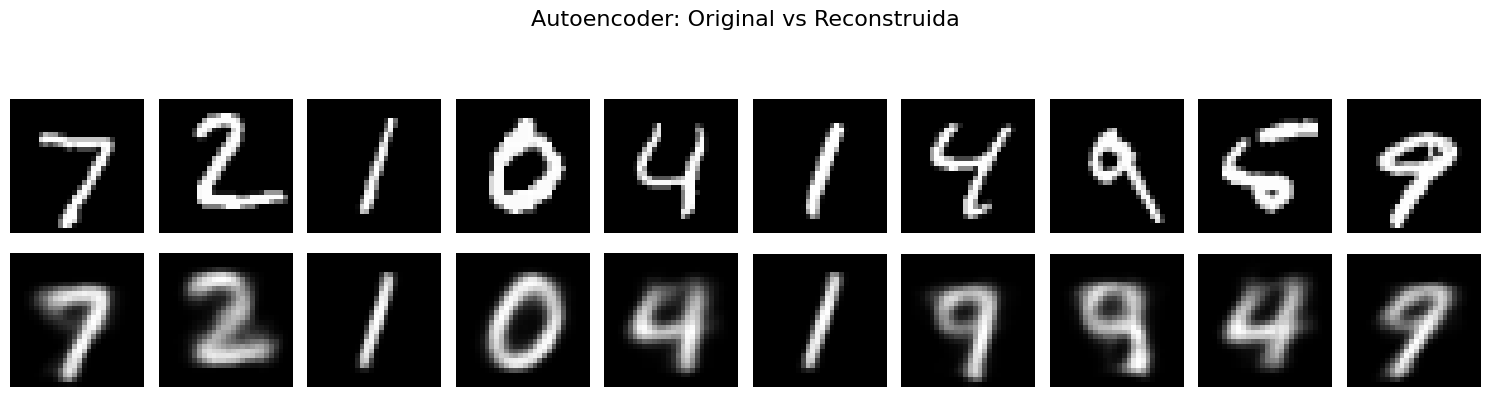

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


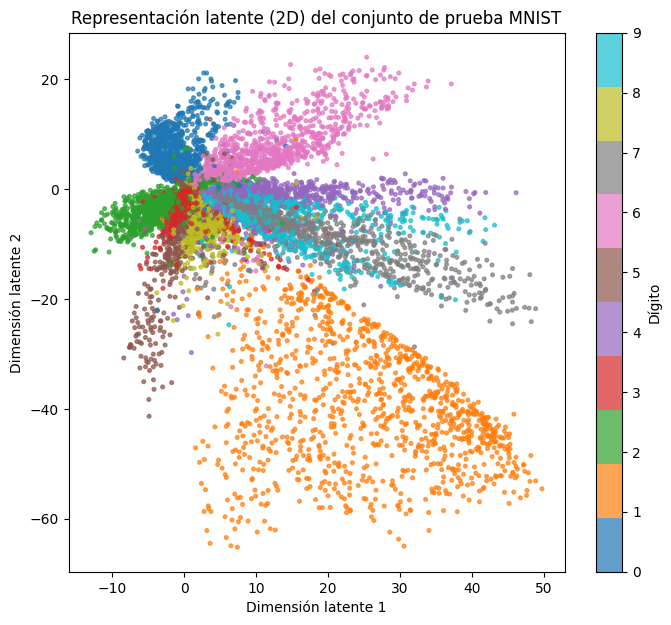

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.datasets import mnist

# 1. Cargar y preparar datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

# 2. Autoencoder con espacio latente de 2 dimensiones
encoding_dim = 2

input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded_output = Dense(encoding_dim, activation='linear')(encoded)

decoded = Dense(64, activation='relu')(encoded_output)
decoded = Dense(128, activation='relu')(decoded)
decoded_output = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded_output)
encoder = Model(input_img, encoded_output)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 3. Entrenar
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                verbose=2)

# 4. Visualización de imágenes originales vs reconstruidas
decoded_imgs = autoencoder.predict(x_test)

plt.figure(figsize=(15, 4))
for i in range(10):
    # Original
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    if i == 0:
        ax.set_ylabel('Original', fontsize=12)

    # Reconstruida
    ax = plt.subplot(2, 10, i + 1 + 10)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    if i == 0:
        ax.set_ylabel('Reconstruida', fontsize=12)
plt.suptitle('Autoencoder: Original vs Reconstruida', fontsize=16, y=1.04)
plt.tight_layout()
plt.show()

# 5. Visualización del espacio latente 2D, coloreando por la etiqueta real
encoded_imgs = encoder.predict(x_test)
plt.figure(figsize=(8, 7))
scatter = plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=y_test, cmap='tab10', s=7, alpha=0.7)
plt.colorbar(scatter, ticks=range(10), label='Dígito')
plt.xlabel("Dimensión latente 1")
plt.ylabel("Dimensión latente 2")
plt.title("Representación latente (2D) del conjunto de prueba MNIST")
plt.show()


In [ ]:
# Importación de librerías necesarias
from IPython.display import display, HTML
import html # Para escapar caracteres especiales en los títulos

# --- 1. ESTRUCTURACIÓN DE DATOS (CONTENIDO SOBRE EL ENCODER) ---

encoder_data = [
    {
        "titulo": "1. Contexto: ¿Qué es un Encoder?",
        "contenido": """
            <p>El <strong>encoder</strong> (o codificador) es la primera mitad de un autoencoder. Su misión es tomar datos de entrada de alta dimensión (como una imagen aplanada) y transformarlos en una <strong>representación comprimida de baja dimensión</strong>.</p>
            <p>Esta representación, conocida como <strong>codificación</strong> o <strong>vector latente</strong>, debe capturar las características más importantes y relevantes de la entrada, desechando el ruido y la información redundante.</p>
        """
    },
    {
        "titulo": "2. Visualización del Flujo de Datos del Encoder",
        "contenido": """
            <p>El código define un flujo donde los datos se comprimen progresivamente. La siguiente animación ilustra este proceso:</p>
            <div class="encoder-visualizer">
                <div class="flow-element input-vec"><span>Entrada<br>(784-dim)</span></div>
                <div class="arrow">&rarr;</div>
                <div class="flow-element layer-block"><span>Dense(128)<br>ReLU</span></div>
                <div class="arrow">&rarr;</div>
                <div class="flow-element layer-block medium"><span>Dense(64)<br>ReLU</span></div>
                <div class="arrow">&rarr;</div>
                <div class="flow-element layer-block small"><span>Dense(32)<br>ReLU</span></div>
                <div class="arrow">&rarr;</div>
                <div class="flow-element output-vec"><span>Espacio Latente<br>(32-dim)</span></div>
            </div>
            <blockquote>Este diseño de "embudo" o "cuello de botella" fuerza a la red a aprender una representación de datos eficiente y significativa.</blockquote>
        """
    },
    {
        "titulo": "3. Análisis Detallado del Código",
        "contenido": """
            <h4><code>input_img = Input(shape=(input_dim,))</code></h4>
            <p>Define la "puerta de entrada" del modelo. Le dice a Keras que espere un lote de vectores 1D, donde cada vector tiene un tamaño de <code>input_dim</code> (ej. 784 para MNIST).</p>

            <h4><code>x = Dense(128, activation='relu')(input_img)</code></h4>
            <p>La primera capa de procesamiento. Conecta cada una de las 784 entradas a 128 neuronas. La activación 'relu' introduce no linealidad, permitiendo al modelo aprender patrones complejos, no solo relaciones lineales.</p>

            <h4><code>x = Dense(64, activation='relu')(x)</code></h4>
            <p>Una segunda capa que comprime aún más la representación de 128 a 64 dimensiones. La red se ve forzada a refinar las características que ha aprendido.</p>

            <h4><code>encoded = Dense(encoding_dim, activation='relu')(x)</code></h4>
            <p>La capa final del encoder. Genera la representación comprimida final (el vector latente) con una dimensión de <code>encoding_dim</code> (ej. 32). Este pequeño vector es la "esencia" de la imagen de entrada que el encoder ha aprendido a extraer.</p>
        """
    },
    {
        "titulo": "4. Intuición y Resumen",
        "contenido": """
            <h4>Intuición</h4>
            <p>Imagina que el encoder es un artista experto que mira una foto detallada (la entrada de 784 píxeles) y es capaz de hacer un boceto minimalista (el vector latente de 32 valores) que captura la esencia de la foto sin dibujar cada detalle.</p>

            <h4>Resumen Rápido</h4>
            <div class="table-container">
                <table>
                    <thead><tr><th>Elemento de Código</th><th>Función Principal</th></tr></thead>
                    <tbody>
                        <tr><td><strong>Input(shape=...)</strong></td><td>Define la forma de los datos de entrada.</td></tr>
                        <tr><td><strong>Dense(128, 'relu')</strong></td><td>Extrae características iniciales y reduce la dimensión.</td></tr>
                        <tr><td><strong>Dense(64, 'relu')</strong></td><td>Refina y comprime aún más las características.</td></tr>
                        <tr><td><strong>Dense(encoding_dim, 'relu')</strong></td><td>Genera la codificación final y comprimida (vector latente).</td></tr>
                    </tbody>
                </table>
            </div>
            <p>Este vector latente <code>encoded</code> será después la entrada para el <strong>decoder</strong>, que intentará reconstruir la imagen original a partir de esta representación comprimida.</p>
        """
    }
]


# --- LÓGICA DE GENERACIÓN (REUTILIZADA) ---
def generar_tarjetas_definiciones(datos):
    html_generado = []
    for seccion in datos:
        titulo_escapado = html.escape(seccion['titulo'])
        contenido_html = seccion['contenido']
        plantilla_seccion = f"""
        <div class="topic-card">
            <div class="topic-header">
                <span class="topic-title">{titulo_escapado}</span>
                <i class="fas fa-chevron-down expand-icon"></i>
            </div>
            <div class="topic-content">
                {contenido_html}
            </div>
        </div>
        """
        html_generado.append(plantilla_seccion)
    return "\n".join(html_generado)

# --- PRE-CÁLCULO DEL CONTENIDO DINÁMICO ---
contenido_dinamico_html = generar_tarjetas_definiciones(encoder_data)

# --- PLANTILLA PROFESIONAL ---
plantilla_profesional = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>{main_title}</title>
  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700;800&family=JetBrains+Mono:wght@400;500&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">
  <style>
    :root {{
      --bg-primary: linear-gradient(135deg, #f0f2f5 0%, #d6e0f0 100%);
      --bg-secondary: rgba(255, 255, 255, 0.9);
      --bg-tertiary: rgba(248, 250, 252, 0.95);
      --text-primary: #34495e;
      --text-secondary: #5d6d7e;
      --text-light: #ffffff;
      --accent-primary: #3498db;
      --accent-secondary: #9b59b6;
      --accent-gradient: linear-gradient(135deg, var(--accent-primary) 0%, var(--accent-secondary) 100%);
      --border-color: rgba(200, 210, 220, 0.9);
      --shadow-card: 0 15px 35px rgba(0, 0, 0, 0.07);
      --border-radius: 20px;
      --transition: all 0.4s cubic-bezier(0.25, 0.8, 0.25, 1);
    }}
    [data-theme="dark"] {{
      --bg-primary: linear-gradient(135deg, #0f2027 0%, #203a43 50%, #2c5364 100%);
      --bg-secondary: rgba(26, 32, 44, 0.85);
      --bg-tertiary: rgba(45, 55, 72, 0.7);
      --text-primary: #f7fafc;
      --text-secondary: #a0aec0;
      --border-color: rgba(255, 255, 255, 0.15);
    }}
    * {{ margin: 0; padding: 0; box-sizing: border-box; }}
    html {{ scroll-behavior: smooth; }}
    body {{ font-family: 'Inter', sans-serif; line-height: 1.8; background: var(--bg-primary); color: var(--text-primary); transition: var(--transition); min-height: 100vh; position: relative; overflow-x: hidden; }}

    .container {{ max-width: 1000px; margin: 0 auto; padding: 2rem; z-index: 1; }}
    .header {{ text-align: center; margin-bottom: 3rem; position: relative; }}
    .main-title {{ font-size: clamp(2.2rem, 5vw, 3.8rem); font-weight: 800; background: var(--accent-gradient); -webkit-background-clip: text; -webkit-text-fill-color: transparent; background-clip: text; margin-bottom: 1.5rem; }}

    .theme-toggle {{ position: fixed; top: 2rem; right: 2rem; width: 60px; height: 60px; border: 1px solid var(--border-color); border-radius: 50%; background: var(--bg-secondary); backdrop-filter: blur(15px); box-shadow: var(--shadow-card); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.4rem; color: var(--accent-primary); transition: var(--transition); z-index: 1000; }}
    .theme-toggle:hover {{ transform: scale(1.15) rotate(180deg); }}

    .lesson-container {{ display: flex; flex-direction: column; gap: 1.5rem; }}
    .topic-card {{ background: var(--bg-secondary); backdrop-filter: blur(20px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 2px solid var(--border-color); overflow: hidden; transition: var(--transition); }}
    .topic-header {{ cursor: pointer; padding: 1.5rem 2rem; display: flex; justify-content: space-between; align-items: center; }}
    .topic-title {{ font-size: 1.3rem; font-weight: 600; color: var(--text-primary); }}
    .expand-icon {{ font-size: 1.2rem; color: var(--text-secondary); transition: var(--transition); }}
    .topic-card.open .expand-icon {{ transform: rotate(180deg); }}
    .topic-content {{ max-height: 0; overflow: hidden; transition: max-height 1.2s ease, padding 1.2s ease; background: var(--bg-tertiary); }}
    .topic-card.open .topic-content {{ max-height: 4500px; padding: 1.5rem 2rem; border-top: 1px solid var(--border-color); }}

    .topic-content h4 {{ color: var(--text-primary); margin-top: 1.5rem; margin-bottom: 0.5rem; font-size: 1.1rem; }}
    .topic-content p, .topic-content li {{ color: var(--text-secondary); line-height: 1.7; }}
    .topic-content strong {{ color: var(--text-primary); font-weight: 700; }}
    .topic-content blockquote {{
        border-left: 4px solid var(--accent-primary); padding-left: 1.5rem; margin: 1.5rem 0;
        font-style: italic; color: var(--text-secondary); background: rgba(52, 152, 219, 0.07);
        border-radius: 0 8px 8px 0; padding: 1rem 1.5rem;
    }}
    .table-container {{ overflow-x: auto; margin: 1.5rem 0; }}
    table {{ width: 100%; border-collapse: collapse; }}
    th, td {{ padding: 12px 15px; border: 1px solid var(--border-color); text-align: left; }}
    thead th {{ background-color: var(--bg-tertiary); color: var(--text-primary); font-weight: 600; }}

    /* --- Estilos del Visualizador del Encoder --- */
    .encoder-visualizer {{ display: flex; align-items: center; justify-content: center; flex-wrap: wrap; gap: 10px; margin: 2rem 0; font-family: 'JetBrains Mono'; text-align: center; }}
    .flow-element {{ background: var(--bg-secondary); border: 2px solid var(--accent-primary); color: var(--text-primary); padding: 0.5rem; border-radius: 8px; display: flex; align-items: center; justify-content: center; }}
    .input-vec, .output-vec {{ width: 80px; height: 100px; }}
    .layer-block {{ width: 100px; height: 100px; background-image: radial-gradient(circle, var(--accent-secondary) 1px, transparent 1px); background-size: 10px 10px; }}
    .layer-block.medium {{ height: 80px; }}
    .layer-block.small {{ height: 60px; }}
    .output-vec {{ width: 60px; height: 60px; border-color: var(--accent-secondary); background: var(--accent-secondary); color: var(--text-light); }}
    .arrow {{ font-size: 2rem; color: var(--text-secondary); opacity: 0.6; }}

    footer {{ text-align: center; margin-top: 4rem; padding-top: 2rem; border-top: 1px solid var(--border-color); }}
    footer p {{ color: var(--text-secondary); font-size: 0.9rem; opacity: 0.8; }}
  </style>
</head>
<body data-theme="light">
  <div class="container">
    <header class="header">
      <h1 class="main-title">{main_title}</h1>
    </header>
    <div class="theme-toggle" id="themeToggleButton" title="Cambiar tema"><i class="fas fa-moon" id="theme-icon"></i></div>

    <div class="lesson-container">
        {dynamic_content_html}
    </div>

    <footer>
      <p>{footer_text}</p>
    </footer>
  </div>

  <script>
    (function() {{
        const themeToggleButton = document.getElementById('themeToggleButton');
        const themeIcon = document.getElementById('theme-icon');
        const bodyEl = document.body;

        function setTheme(theme) {{
            bodyEl.setAttribute('data-theme', theme);
            localStorage.setItem('theme', theme);
            if (themeIcon) {{ themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }}
        }}

        themeToggleButton.addEventListener('click', () => {{
            const newTheme = (bodyEl.getAttribute('data-theme') || 'light') === 'dark' ? 'light' : 'dark';
            setTheme(newTheme);
        }});

        setTheme(localStorage.getItem('theme') || 'light');

        document.querySelectorAll('.topic-header').forEach(header => {{
            header.addEventListener('click', () => {{
                const card = header.parentElement;
                card.classList.toggle('open');
            }});
        }});

        const firstTopic = document.querySelector('.topic-card');
        if(firstTopic) {{
            firstTopic.classList.add('open');
        }}
    }})();
  </script>
</body>
</html>
"""

# --- INYECCIÓN DINÁMICA Y RENDERIZADO FINAL ---
final_html = plantilla_profesional.format(
    main_title="Anatomía de un Encoder",
    dynamic_content_html=contenido_dinamico_html,
    footer_text="Material elaborado por el profesor Sergio Gevatschnaider."
)

display(HTML(final_html))

Elemento de Código,Función Principal
Input(shape=...),Define la forma de los datos de entrada.
"Dense(128, 'relu')",Extrae características iniciales y reduce la dimensión.
"Dense(64, 'relu')",Refina y comprime aún más las características.
"Dense(encoding_dim, 'relu')",Genera la codificación final y comprimida (vector latente).


In [ ]:
# Importación de librerías necesarias
from IPython.display import display, HTML
import html # Para escapar caracteres especiales en los títulos

# --- 1. EXTRACCIÓN Y ESTRUCTURACIÓN DE DATOS (CONTENIDO SOBRE LA CAPA DENSA) ---

dense_layer_data = [
    {
        "titulo": "1. ¿Qué es una Capa Densa (Fully Connected)?",
        "contenido": """
            <p>Una <strong>capa densa (Dense layer)</strong>, también conocida como capa totalmente conectada (fully connected), es el tipo de capa más fundamental y común en las redes neuronales.</p>
            <p>Su característica principal es que <strong>cada neurona en la capa está conectada a todas las neuronas de la capa anterior</strong>. Esto asegura que cada parte de la información de entrada contribuya a la salida de cada neurona, permitiendo al modelo aprender relaciones complejas entre todas las características.</p>
        """
    },
    {
        "titulo": "2. Funcionamiento: La Operación Central",
        "contenido": """
            <p>Una capa densa realiza tres operaciones secuenciales sobre su entrada:</p>
            <ol>
                <li><strong>Multiplicación por una matriz de pesos (W):</strong> La entrada es multiplicada por una matriz de pesos. Estos pesos son los parámetros principales que la red aprende durante el entrenamiento.</li>
                <li><strong>Suma de un vector de sesgo (b):</strong> Se añade un término de sesgo (bias) a cada neurona. Esto permite que la función de activación se desplace, aumentando la flexibilidad del modelo.</li>
                <li><strong>Aplicación de una función de activación:</strong> Finalmente, se aplica una función no lineal (como ReLU, Sigmoid o Tanh) al resultado. Esto es crucial para que la red pueda aprender patrones no lineales complejos.</li>
            </ol>
            <blockquote>La fórmula matemática para una neurona es: <strong>Activación( (Entrada • Pesos) + Sesgo )</strong></blockquote>
        """
    },
    {
        "titulo": "3. Requisito Clave: Entrada Unidimensional (1D)",
        "contenido": """
            <p>Una capa densa está diseñada para operar sobre <strong>vectores unidimensionales (1D)</strong>, es decir, una lista de números como <code>[x₁, x₂, ..., xₙ]</code>.</p>
            <p>La razón es matemática: la operación principal es una multiplicación de matrices (<code>entrada × pesos</code>), que requiere que la entrada sea un vector. Por este motivo, si los datos de entrada tienen múltiples dimensiones (como una imagen 2D o un tensor 3D), <strong>primero deben ser aplanados</strong> usando una capa <code>Flatten</code>.</p>
            <div class="content-block" style="background-color: #2d2d2d; color: #f0f0f0; font-family: 'JetBrains Mono', monospace; padding: 1rem; border-radius: 8px;">
<pre><code>Entrada 2D (28, 28)  --&gt;  Flatten()  --&gt;  Vector 1D (784,)  --&gt;  Dense()  --&gt;  Salida 1D
      IMAGEN                                 VECTOR                    CAPA DENSA</code></pre>
            </div>
        """
    },
    {
        "titulo": "4. Ejemplo de Implementación en Keras",
        "contenido": """
            <p>Así es como se define y utiliza una capa densa en un modelo de Keras. Supongamos que tenemos una entrada aplanada de 784 características y queremos una capa densa con 128 neuronas.</p>
            <div class="content-block" style="background-color: #2d2d2d; color: #f0f0f0; font-family: 'JetBrains Mono', monospace; padding: 1rem; border-radius: 8px;">
<pre><code>from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Definimos un modelo simple
model = Sequential([
    # La primera capa densa debe saber la forma de la entrada
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    # Capa de salida para clasificación de 10 clases
    Dense(10, activation='softmax')
])

# La forma de la salida de la primera capa será (None, 128)
# La forma de la salida de la segunda capa será (None, 64)
# La forma de la salida final será (None, 10)
</code></pre>
            </div>
            <p>El primer argumento de la capa <code>Dense</code> es el número de neuronas (o unidades) que tendrá la capa, lo cual define la dimensionalidad del espacio de salida.</p>
        """
    }
]


# --- LÓGICA DE GENERACIÓN (REUTILIZADA) ---
def generar_tarjetas_definiciones(datos):
    html_generado = []
    for seccion in datos:
        titulo_escapado = html.escape(seccion['titulo'])
        contenido_html = seccion['contenido']

        plantilla_seccion = f"""
        <div class="topic-card">
            <div class="topic-header">
                <span class="topic-title">{titulo_escapado}</span>
                <i class="fas fa-chevron-down expand-icon"></i>
            </div>
            <div class="topic-content">
                {contenido_html}
            </div>
        </div>
        """
        html_generado.append(plantilla_seccion)
    return "\n".join(html_generado)

# --- PRE-CÁLCULO DEL CONTENIDO DINÁMICO ---
contenido_dinamico_html = generar_tarjetas_definiciones(dense_layer_data)

# --- PLANTILLA PROFESIONAL MEJORADA ---
plantilla_profesional = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>{main_title}</title>
  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700;800&family=JetBrains+Mono:wght@400;500&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">
  <style>
    :root {{
      --bg-primary: linear-gradient(135deg, #d38312 0%, #a83279 100%);
      --bg-secondary: rgba(255, 255, 255, 0.85);
      --bg-tertiary: rgba(248, 250, 252, 0.8);
      --text-primary: #2c3e50;
      --text-secondary: #34495e;
      --text-light: #ffffff;
      --accent-primary: #d38312;
      --accent-secondary: #a83279;
      --accent-gradient: linear-gradient(135deg, var(--accent-primary) 0%, var(--accent-secondary) 100%);
      --border-color: rgba(226, 232, 240, 0.8);
      --shadow-card: 0 15px 35px rgba(0, 0, 0, 0.08);
      --border-radius: 20px;
      --transition: all 0.4s cubic-bezier(0.25, 0.8, 0.25, 1);
    }}
    [data-theme="dark"] {{
      --bg-primary: linear-gradient(135deg, #0f2027 0%, #203a43 50%, #2c5364 100%);
      --bg-secondary: rgba(26, 32, 44, 0.85);
      --bg-tertiary: rgba(45, 55, 72, 0.7);
      --text-primary: #f7fafc;
      --text-secondary: #a0aec0;
      --accent-primary: #f39c12;
      --accent-secondary: #be2edd;
      --border-color: rgba(255, 255, 255, 0.15);
    }}
    * {{ margin: 0; padding: 0; box-sizing: border-box; }}
    html {{ scroll-behavior: smooth; }}
    body {{ font-family: 'Inter', sans-serif; line-height: 1.8; background: var(--bg-primary); color: var(--text-primary); transition: var(--transition); min-height: 100vh; position: relative; overflow-x: hidden; }}
    .particles {{ position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; }}
    .particle {{ position: absolute; border-radius: 50%; animation: float 25s infinite linear; opacity: 0; background: rgba(255, 255, 255, 0.6);}}
    @keyframes float {{ 0% {{ transform: translateY(100vh) rotate(0deg); opacity: 0; }} 10%, 90% {{ opacity: 0.6; }} 100% {{ transform: translateY(-10vh) rotate(360deg); opacity: 0; }} }}

    .container {{ max-width: 1000px; margin: 0 auto; padding: 2rem; z-index: 1; }}
    .header {{ text-align: center; margin-bottom: 3rem; position: relative; }}
    .main-title {{ font-size: clamp(2.5rem, 5vw, 4.2rem); font-weight: 800; background: var(--accent-gradient); -webkit-background-clip: text; -webkit-text-fill-color: transparent; background-clip: text; margin-bottom: 1.5rem; }}

    .external-link-btn {{
        display: inline-block;
        text-decoration: none;
        background: var(--bg-secondary);
        color: var(--text-primary);
        padding: 12px 24px;
        border-radius: 12px;
        font-weight: 600;
        font-size: 1rem;
        box-shadow: var(--shadow-card);
        border: 2px solid var(--border-color);
        transition: var(--transition);
    }}
    .external-link-btn:hover {{
        transform: translateY(-5px) scale(1.05);
        background: var(--accent-gradient);
        color: var(--text-light);
        border-color: transparent;
    }}
    .external-link-btn i {{
        margin-right: 10px;
    }}

    .theme-toggle {{ position: fixed; top: 2rem; right: 2rem; width: 60px; height: 60px; border: 1px solid var(--border-color); border-radius: 50%; background: var(--bg-secondary); backdrop-filter: blur(15px); box-shadow: var(--shadow-card); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.4rem; color: var(--accent-primary); transition: var(--transition); z-index: 1000; }}
    .theme-toggle:hover {{ transform: scale(1.15) rotate(180deg); }}

    .lesson-container {{ display: flex; flex-direction: column; gap: 1.5rem; margin-top: 3rem; }}
    .topic-card {{ background: var(--bg-secondary); backdrop-filter: blur(20px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 2px solid var(--border-color); overflow: hidden; transition: var(--transition); }}
    .topic-header {{ cursor: pointer; padding: 1.5rem 2rem; display: flex; justify-content: space-between; align-items: center; }}
    .topic-title {{ font-size: 1.3rem; font-weight: 600; color: var(--text-primary); }}
    .expand-icon {{ font-size: 1.2rem; color: var(--text-secondary); transition: var(--transition); }}
    .topic-card.open .expand-icon {{ transform: rotate(180deg); }}
    .topic-content {{ max-height: 0; overflow: hidden; transition: max-height 1.2s ease, padding 1.2s ease; background: var(--bg-tertiary); }}
    .topic-card.open .topic-content {{ max-height: 3500px; padding: 1.5rem 2rem; border-top: 1px solid var(--border-color); }}

    .topic-content h4 {{ color: var(--text-primary); margin-top: 1.5rem; margin-bottom: 0.5rem; font-size: 1.1rem; }}
    .topic-content p, .topic-content li {{ color: var(--text-secondary); line-height: 1.7; }}
    .topic-content ul, .topic-content ol {{ padding-left: 25px; margin-bottom: 1rem; }}
    .topic-content strong {{ color: var(--text-primary); font-weight: 700; }}
    .topic-content blockquote {{
        border-left: 4px solid var(--accent-primary); padding-left: 1.5rem; margin: 1.5rem 0;
        font-style: italic; color: var(--text-secondary); background: rgba(127, 140, 141, 0.05);
        border-radius: 0 8px 8px 0; padding: 1rem 1.5rem;
    }}

    footer {{ text-align: center; margin-top: 4rem; padding-top: 2rem; border-top: 1px solid var(--border-color); }}
    footer p {{ color: var(--text-secondary); font-size: 0.9rem; opacity: 0.8; }}

    @media (max-width: 768px) {{
        .container {{ padding: 1rem; }}
        .topic-header {{ padding: 1rem 1.5rem; }}
        .topic-card.open .topic-content {{ padding: 1rem 1.5rem; }}
    }}
  </style>
</head>
<body data-theme="light">
  <div class="particles" id="particles-container"></div>
  <div class="theme-toggle" id="themeToggleButton" title="Cambiar tema"><i class="fas fa-moon" id="theme-icon"></i></div>
  <div class="container">
    <header class="header">
      <h1 class="main-title">{main_title}</h1>
      <a href="https://keras.io/api/layers/core_layers/dense/" target="_blank" class="external-link-btn">
          <i class="fas fa-project-diagram"></i>
          Ver Documentación Oficial de Keras
      </a>
    </header>

    <div class="lesson-container">
        {dynamic_content_html}
    </div>

    <footer>
      <p>{footer_text}</p>
    </footer>
  </div>

  <script>
    (function() {{
        const themeToggleButton = document.getElementById('themeToggleButton');
        const themeIcon = document.getElementById('theme-icon');
        const bodyEl = document.body;

        function setTheme(theme) {{
            bodyEl.setAttribute('data-theme', theme);
            localStorage.setItem('theme', theme);
            if (themeIcon) {{ themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }}
        }}

        themeToggleButton.addEventListener('click', () => {{
            const newTheme = (bodyEl.getAttribute('data-theme') || 'light') === 'dark' ? 'light' : 'dark';
            setTheme(newTheme);
        }});

        setTheme(localStorage.getItem('theme') || 'light');

        document.querySelectorAll('.topic-header').forEach(header => {{
            header.addEventListener('click', () => {{
                const card = header.parentElement;
                card.classList.toggle('open');
            }});
        }});

        const container = document.getElementById('particles-container');
        if (container) {{
            for (let i = 0; i < 30; i++) {{
                const p = document.createElement('div');
                p.className = 'particle';
                p.style.left = Math.random() * 100 + 'vw';
                const size = (Math.random() * 5 + 2);
                p.style.width = size + 'px';
                p.style.height = size + 'px';
                p.style.animationDelay = Math.random() * -20 + 's';
                p.style.animationDuration = (15 + Math.random() * 10) + 's';
                container.appendChild(p);
            }}
        }}

        const firstTopic = document.querySelector('.topic-card');
        if(firstTopic) {{
            firstTopic.classList.add('open');
        }}
    }})();
  </script>
</body>
</html>
"""

# --- INYECCIÓN DINÁMICA Y RENDERIZADO FINAL ---
final_html = plantilla_profesional.format(
    main_title="Guía Interactiva sobre la Capa Densa",
    dynamic_content_html=contenido_dinamico_html,
    footer_text="Material elaborado por el profesor Sergio Gevatschnaider."
)

display(HTML(final_html))

In [ ]:
# Importación de librerías necesarias
from IPython.display import display, HTML
import html # Para escapar caracteres especiales en los títulos

# --- 1. EXTRACCIÓN Y ESTRUCTURACIÓN DE DATOS (CONTENIDO SOBRE LA CAPA FLATTEN) ---

flatten_layer_data = [
    {
        "titulo": "1. Definición: El Puente entre Dimensiones",
        "contenido": """
            <p>Una <strong>capa aplanada (“Flatten layer”)</strong> es un componente de una red neuronal que transforma una entrada multidimensional (como una matriz 2D o un tensor 3D) en un <strong>vector unidimensional</strong>.</p>
            <p>Este proceso “aplana” o “desenrolla” la estructura de los datos, reorganizando todos sus valores en una única fila de números. No altera la información contenida en los datos, solo su forma de representación.</p>
            <blockquote>Actúa como un puente crucial entre las capas que preservan la estructura espacial (como las convolucionales) y las capas que requieren una entrada vectorial (como las densas).</blockquote>
        """
    },
    {
        "titulo": "2. Ejemplo Ilustrativo: ¿Cómo Funciona?",
        "contenido": """
            <p>Imaginemos una imagen del dataset MNIST de 28×28 píxeles.</p>

            <h4>Antes del Aplanado (Entrada 2D)</h4>
            <p>La forma de los datos es un tensor de <strong>(28, 28)</strong>.</p>
            <div class="content-block" style="background-color: #2d2d2d; color: #f0f0f0; font-family: 'JetBrains Mono', monospace; padding: 1rem; border-radius: 8px;">
<pre><code># Matriz de 28 filas x 28 columnas
[
  [px_1, px_2, ..., px_28],
  [px_29, ...           ],
  ...
  [px_757, ..., px_784]
]</code></pre>
            </div>

            <h4>Después del Aplanado (Salida 1D)</h4>
            <p>La forma de los datos se convierte en un vector de <strong>(784,)</strong>, ya que 28 × 28 = 784.</p>
            <div class="content-block" style="background-color: #2d2d2d; color: #f0f0f0; font-family: 'JetBrains Mono', monospace; padding: 1rem; border-radius: 8px;">
<pre><code># Vector de 784 elementos
[px_1, px_2, ..., px_28, px_29, ..., px_784]</code></pre>
            </div>
            <p>Todos los píxeles de la matriz se concatenan en orden para formar un único vector largo.</p>
        """
    },
    {
        "titulo": "3. Implementación: Manual vs. Automática en Keras",
        "contenido": """
            <h4>Aplanado Manual (Preprocesamiento)</h4>
            <p>Se puede aplanar un lote de datos usando la función <code>reshape</code> de NumPy o TensorFlow antes de pasarlos al modelo.</p>
            <div class="content-block" style="background-color: #2d2d2d; color: #f0f0f0; font-family: 'JetBrains Mono', monospace; padding: 1rem; border-radius: 8px;">
<pre><code>import numpy as np
# Suponiendo que x_train tiene forma (60000, 28, 28)
num_pixels = x_train.shape[1] * x_train.shape[2]
x_train_flattened = x_train.reshape(x_train.shape[0], num_pixels)
# Ahora la forma es (60000, 784)</code></pre>
            </div>

            <h4>Aplanado Automático (Capa Keras)</h4>
            <p>La forma más común y recomendada es incluir la capa <code>Flatten</code> directamente en la arquitectura del modelo. Es más limpio y menos propenso a errores.</p>
            <div class="content-block" style="background-color: #2d2d2d; color: #f0f0f0; font-family: 'JetBrains Mono', monospace; padding: 1rem; border-radius: 8px;">
<pre><code>from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential([
    Flatten(input_shape=(28, 28)),  # La capa se encarga del aplanado
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])</code></pre>
            </div>
        """
    },
    {
        "titulo": "4. Aplanado de Datos Complejos y Conclusión",
        "contenido": """
            <h4>¿Qué ocurre con imágenes en color o tensores 3D?</h4>
            <p>El principio es exactamente el mismo. La capa <code>Flatten</code> desenrollará todas las dimensiones en una sola.</p>
            <ul>
                <li><strong>Imagen RGB (CIFAR-10):</strong> Una entrada de forma <code>(32, 32, 3)</code> se aplanará a un vector de tamaño 32 × 32 × 3 = <strong>3072</strong>.</li>
                <li><strong>Salida de Capas Convolucionales:</strong> Un tensor de características (feature map) de forma <code>(4, 4, 64)</code> se aplanará a un vector de 4 × 4 × 64 = <strong>1024</strong>.</li>
            </ul>
            <h4>Conclusión</h4>
            <p>El aplanado de datos es un paso fundamental y sencillo pero conceptualmente muy importante. Asegura la compatibilidad arquitectónica entre diferentes tipos de capas, permitiendo que las redes neuronales profundas procesen datos estructurados complejos (como imágenes) para realizar tareas de clasificación o regresión mediante capas densas.</p>
        """
    }
]


# --- LÓGICA DE GENERACIÓN (REUTILIZADA) ---
def generar_tarjetas_definiciones(datos):
    html_generado = []
    for seccion in datos:
        titulo_escapado = html.escape(seccion['titulo'])
        contenido_html = seccion['contenido']

        plantilla_seccion = f"""
        <div class="topic-card">
            <div class="topic-header">
                <span class="topic-title">{titulo_escapado}</span>
                <i class="fas fa-chevron-down expand-icon"></i>
            </div>
            <div class="topic-content">
                {contenido_html}
            </div>
        </div>
        """
        html_generado.append(plantilla_seccion)
    return "\n".join(html_generado)

# --- PRE-CÁLCULO DEL CONTENIDO DINÁMICO ---
contenido_dinamico_html = generar_tarjetas_definiciones(flatten_layer_data)

# --- PLANTILLA PROFESIONAL MEJORADA ---
plantilla_profesional = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>{main_title}</title>
  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700;800&family=JetBrains+Mono:wght@400;500&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">
  <style>
    :root {{
      --bg-primary: linear-gradient(135deg, #6a11cb 0%, #2575fc 100%);
      --bg-secondary: rgba(255, 255, 255, 0.85);
      --bg-tertiary: rgba(248, 250, 252, 0.8);
      --text-primary: #2c3e50;
      --text-secondary: #34495e;
      --text-light: #ffffff;
      --accent-primary: #6a11cb;
      --accent-secondary: #2575fc;
      --accent-gradient: linear-gradient(135deg, var(--accent-primary) 0%, var(--accent-secondary) 100%);
      --border-color: rgba(226, 232, 240, 0.8);
      --shadow-card: 0 15px 35px rgba(0, 0, 0, 0.08);
      --border-radius: 20px;
      --transition: all 0.4s cubic-bezier(0.25, 0.8, 0.25, 1);
    }}
    [data-theme="dark"] {{
      --bg-primary: linear-gradient(135deg, #0f2027 0%, #203a43 50%, #2c5364 100%);
      --bg-secondary: rgba(26, 32, 44, 0.85);
      --bg-tertiary: rgba(45, 55, 72, 0.7);
      --text-primary: #f7fafc;
      --text-secondary: #a0aec0;
      --accent-primary: #8e44ad;
      --accent-secondary: #3498db;
      --border-color: rgba(255, 255, 255, 0.15);
    }}
    * {{ margin: 0; padding: 0; box-sizing: border-box; }}
    html {{ scroll-behavior: smooth; }}
    body {{ font-family: 'Inter', sans-serif; line-height: 1.8; background: var(--bg-primary); color: var(--text-primary); transition: var(--transition); min-height: 100vh; position: relative; overflow-x: hidden; }}
    .particles {{ position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; }}
    .particle {{ position: absolute; border-radius: 50%; animation: float 25s infinite linear; opacity: 0; background: rgba(255, 255, 255, 0.6);}}
    @keyframes float {{ 0% {{ transform: translateY(100vh) rotate(0deg); opacity: 0; }} 10%, 90% {{ opacity: 0.6; }} 100% {{ transform: translateY(-10vh) rotate(360deg); opacity: 0; }} }}

    .container {{ max-width: 1000px; margin: 0 auto; padding: 2rem; z-index: 1; }}
    .header {{ text-align: center; margin-bottom: 3rem; position: relative; }}
    .main-title {{ font-size: clamp(2.5rem, 5vw, 4.2rem); font-weight: 800; background: var(--accent-gradient); -webkit-background-clip: text; -webkit-text-fill-color: transparent; background-clip: text; margin-bottom: 1.5rem; }}

    .external-link-btn {{
        display: inline-block;
        text-decoration: none;
        background: var(--bg-secondary);
        color: var(--text-primary);
        padding: 12px 24px;
        border-radius: 12px;
        font-weight: 600;
        font-size: 1rem;
        box-shadow: var(--shadow-card);
        border: 2px solid var(--border-color);
        transition: var(--transition);
    }}
    .external-link-btn:hover {{
        transform: translateY(-5px) scale(1.05);
        background: var(--accent-gradient);
        color: var(--text-light);
        border-color: transparent;
    }}
    .external-link-btn i {{
        margin-right: 10px;
    }}

    .theme-toggle {{ position: fixed; top: 2rem; right: 2rem; width: 60px; height: 60px; border: 1px solid var(--border-color); border-radius: 50%; background: var(--bg-secondary); backdrop-filter: blur(15px); box-shadow: var(--shadow-card); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.4rem; color: var(--accent-primary); transition: var(--transition); z-index: 1000; }}
    .theme-toggle:hover {{ transform: scale(1.15) rotate(180deg); }}

    .lesson-container {{ display: flex; flex-direction: column; gap: 1.5rem; margin-top: 3rem; }}
    .topic-card {{ background: var(--bg-secondary); backdrop-filter: blur(20px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 2px solid var(--border-color); overflow: hidden; transition: var(--transition); }}
    .topic-header {{ cursor: pointer; padding: 1.5rem 2rem; display: flex; justify-content: space-between; align-items: center; }}
    .topic-title {{ font-size: 1.3rem; font-weight: 600; color: var(--text-primary); }}
    .expand-icon {{ font-size: 1.2rem; color: var(--text-secondary); transition: var(--transition); }}
    .topic-card.open .expand-icon {{ transform: rotate(180deg); }}
    .topic-content {{ max-height: 0; overflow: hidden; transition: max-height 1.2s ease, padding 1.2s ease; background: var(--bg-tertiary); }}
    .topic-card.open .topic-content {{ max-height: 3500px; padding: 1.5rem 2rem; border-top: 1px solid var(--border-color); }}

    .topic-content h4 {{ color: var(--text-primary); margin-top: 1.5rem; margin-bottom: 0.5rem; font-size: 1.1rem; }}
    .topic-content p, .topic-content li {{ color: var(--text-secondary); line-height: 1.7; }}
    .topic-content ul, .topic-content ol {{ padding-left: 25px; margin-bottom: 1rem; }}
    .topic-content strong {{ color: var(--text-primary); font-weight: 700; }}
    .topic-content blockquote {{
        border-left: 4px solid var(--accent-primary); padding-left: 1.5rem; margin: 1.5rem 0;
        font-style: italic; color: var(--text-secondary); background: rgba(127, 140, 141, 0.05);
        border-radius: 0 8px 8px 0; padding: 1rem 1.5rem;
    }}

    footer {{ text-align: center; margin-top: 4rem; padding-top: 2rem; border-top: 1px solid var(--border-color); }}
    footer p {{ color: var(--text-secondary); font-size: 0.9rem; opacity: 0.8; }}

    @media (max-width: 768px) {{
        .container {{ padding: 1rem; }}
        .topic-header {{ padding: 1rem 1.5rem; }}
        .topic-card.open .topic-content {{ padding: 1rem 1.5rem; }}
    }}
  </style>
</head>
<body data-theme="light">
  <div class="particles" id="particles-container"></div>
  <div class="theme-toggle" id="themeToggleButton" title="Cambiar tema"><i class="fas fa-moon" id="theme-icon"></i></div>
  <div class="container">
    <header class="header">
      <h1 class="main-title">{main_title}</h1>
      <a href="https://keras.io/api/layers/reshaping_layers/flatten/" target="_blank" class="external-link-btn">
          <i class="fas fa-layer-group"></i>
          Ver Documentación Oficial de Keras
      </a>
    </header>

    <div class="lesson-container">
        {dynamic_content_html}
    </div>

    <footer>
      <p>{footer_text}</p>
    </footer>
  </div>

  <script>
    (function() {{
        const themeToggleButton = document.getElementById('themeToggleButton');
        const themeIcon = document.getElementById('theme-icon');
        const bodyEl = document.body;

        function setTheme(theme) {{
            bodyEl.setAttribute('data-theme', theme);
            localStorage.setItem('theme', theme);
            if (themeIcon) {{ themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }}
        }}

        themeToggleButton.addEventListener('click', () => {{
            const newTheme = (bodyEl.getAttribute('data-theme') || 'light') === 'dark' ? 'light' : 'dark';
            setTheme(newTheme);
        }});

        setTheme(localStorage.getItem('theme') || 'light');

        document.querySelectorAll('.topic-header').forEach(header => {{
            header.addEventListener('click', () => {{
                const card = header.parentElement;
                card.classList.toggle('open');
            }});
        }});

        const container = document.getElementById('particles-container');
        if (container) {{
            for (let i = 0; i < 30; i++) {{
                const p = document.createElement('div');
                p.className = 'particle';
                p.style.left = Math.random() * 100 + 'vw';
                const size = (Math.random() * 5 + 2);
                p.style.width = size + 'px';
                p.style.height = size + 'px';
                p.style.animationDelay = Math.random() * -20 + 's';
                p.style.animationDuration = (15 + Math.random() * 10) + 's';
                container.appendChild(p);
            }}
        }}

        const firstTopic = document.querySelector('.topic-card');
        if(firstTopic) {{
            firstTopic.classList.add('open');
        }}
    }})();
  </script>
</body>
</html>
"""

# --- INYECCIÓN DINÁMICA Y RENDERIZADO FINAL ---
final_html = plantilla_profesional.format(
    main_title="Guía sobre la Capa Aplanada (Flatten)",
    dynamic_content_html=contenido_dinamico_html,
    footer_text="Material elaborado por el profesor Sergio Gevatschnaider."
)

display(HTML(final_html))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Rectangle, ConnectionPatch
from IPython.display import HTML

# --- 1. Configuración de los Datos ---
# Creamos nuestra "imagen" de entrada de 5x5
input_data = np.arange(1, 26).reshape(5, 5)
# Calculamos la salida aplanada para tenerla de referencia
flattened_output = input_data.flatten()
N_ELEMENTS = input_data.size

# --- 2. Configuración de la Visualización ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

def setup_plots():
    """Configura el estado inicial de los gráficos."""
    # Configuración del gráfico de la Matriz de Entrada (ax1)
    ax1.set_title('Entrada: Matriz 2D (5x5)', fontsize=14, pad=20)
    ax1.imshow(input_data, cmap='viridis', interpolation='none')
    ax1.set_xticks(np.arange(5))
    ax1.set_yticks(np.arange(5))
    ax1.tick_params(length=0) # Ocultar marcas de los ejes
    ax1.grid(which='major', color='w', linestyle='-', linewidth=2)

    # Añadir valores de cada celda en la matriz
    for i in range(5):
        for j in range(5):
            ax1.text(j, i, f"{input_data[i, j]:.0f}",
                     ha="center", va="center", color="white",
                     fontsize=12, fontweight='bold')

    # Configuración del gráfico del Vector de Salida (ax2)
    ax2.set_title(f'Salida: Vector 1D Aplanado (Tamaño: {N_ELEMENTS})', fontsize=14, pad=20)
    ax2.set_xlim(-1, N_ELEMENTS)
    ax2.set_ylim(0, N_ELEMENTS + 1)
    ax2.set_xlabel('Índice del Vector', fontsize=12)
    ax2.set_ylabel('Valor', fontsize=12)
    ax2.grid(True, linestyle='--', alpha=0.6)
    # Dejar el gráfico de línea vacío al inicio
    line, = ax2.plot([], [], 'o-', color='tab:blue', markersize=8, linewidth=2)
    return line

# --- 3. Lógica de la Animación ---
line = setup_plots()

# Creamos un rectángulo de resaltado que moveremos en cada cuadro
highlight_rect = Rectangle((0,0), 1, 1, fill=False, edgecolor='red', linewidth=3)
ax1.add_patch(highlight_rect)

def animate(frame):
    """Función que se ejecuta para cada cuadro (frame) de la animación."""
    # Calculamos la posición (fila, columna) en la matriz 2D
    row = frame // 5
    col = frame % 5

    # --- Actualizar la Matriz de Entrada ---
    # Movemos el rectángulo de resaltado a la celda actual
    highlight_rect.set_xy((col - 0.5, row - 0.5))

    # --- Actualizar el Vector de Salida ---
    # Añadimos el nuevo punto al gráfico de línea
    current_x_data = np.arange(frame + 1)
    current_y_data = flattened_output[:frame + 1]
    line.set_data(current_x_data, current_y_data)

    # --- Añadir la Flecha de Conexión ---
    # Borramos la flecha anterior si existe
    if hasattr(animate, 'connection_arrow'):
        animate.connection_arrow.remove()

    # Creamos una flecha desde la celda resaltada al nuevo punto en el vector
    # Coordenadas en el sistema de la figura para conectar subplots
    coordA = (col, row) # Coordenadas en ax1
    coordB = (frame, flattened_output[frame]) # Coordenadas en ax2

    arrow = ConnectionPatch(xyA=coordB, xyB=coordA, coordsA=ax2.transData, coordsB=ax1.transData,
                              arrowstyle="->", shrinkB=5, color='red', linewidth=2, mutation_scale=20)
    ax2.add_patch(arrow)
    animate.connection_arrow = arrow # Guardamos la referencia para borrarla en el siguiente frame

    return line, highlight_rect, animate.connection_arrow

# --- 4. Crear y Mostrar la Animación ---
# Creamos la animación
ani = FuncAnimation(fig, animate, frames=N_ELEMENTS, interval=400, blit=False)

# Ajustamos el diseño y añadimos un título general
plt.tight_layout(rect=[0, 0, 1, 0.95])
fig.suptitle('Demostración Dinámica de la Capa Flatten', fontsize=20, fontweight='bold')

# Convertimos la animación a video HTML5 para mostrarla en Colab
html_video = HTML(ani.to_html5_video())
plt.close() # Cerramos la figura estática para mostrar solo el video

print("Ejecutando la animación... ¡Observa cómo cada elemento de la matriz encuentra su lugar en el vector!")

# Mostramos el video en la celda de Colab
html_video

Ejecutando la animación... ¡Observa cómo cada elemento de la matriz encuentra su lugar en el vector!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


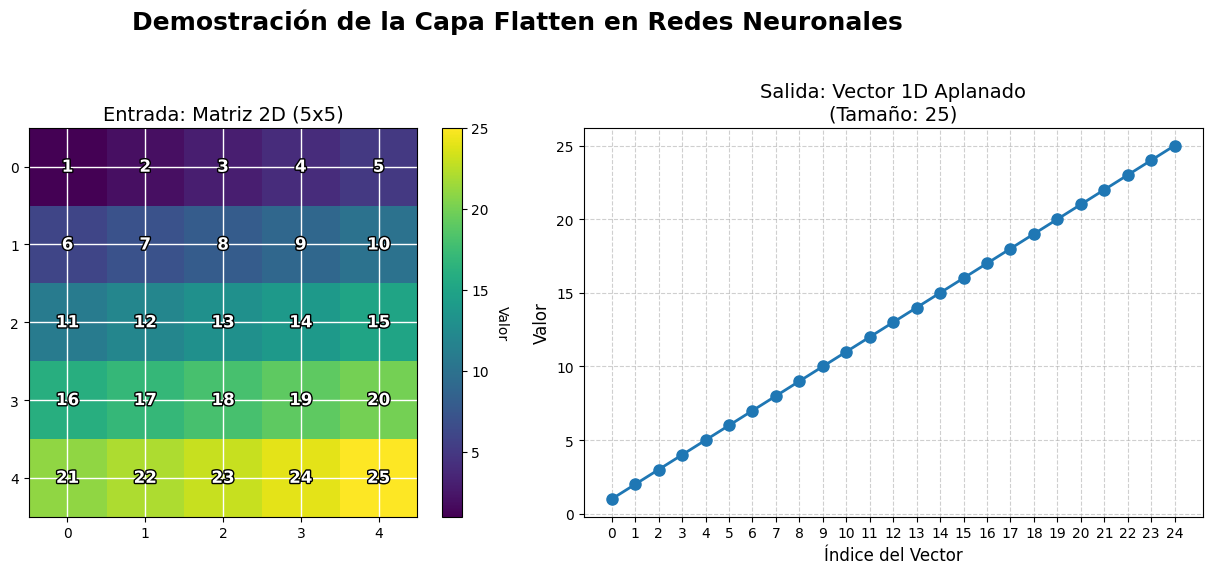


Forma de la entrada: (1, 5, 5)
Datos de entrada (matriz 5x5):
 [[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]

Forma de la salida aplanada: (1, 25)
Datos de salida aplanados (vector 1D):
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25.]


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

# 1. Crear una "imagen" de entrada de 5x5
input_data = np.arange(1, 26).reshape(1, 5, 5)

# 2. Definir el modelo con una capa Flatten
model = tf.keras.Sequential()
model.add(Flatten(input_shape=(5, 5)))

# 3. Obtener la salida aplanada
flattened_output = model.predict(input_data)

# --- Visualización Mejorada ---

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Demostración de la Capa Flatten en Redes Neuronales', fontsize=18, fontweight='bold')

# Visualización de la entrada 2D (matriz)
ax1.set_title('Entrada: Matriz 2D (5x5)', fontsize=14)
im = ax1.imshow(input_data.squeeze(), cmap='viridis', interpolation='none')
ax1.set_xticks(np.arange(5))
ax1.set_yticks(np.arange(5))
ax1.set_xticklabels(np.arange(5))
ax1.set_yticklabels(np.arange(5))
ax1.grid(which='major', color='w', linestyle='-', linewidth=1)

# Añadir valores de cada celda en la matriz con texto blanco con sombra para mejor legibilidad
for i in range(5):
    for j in range(5):
        ax1.text(j, i, f"{input_data[0, i, j]:.0f}",
                 ha="center", va="center", color="white",
                 fontsize=12, fontweight='bold',
                 path_effects=[path_effects.withStroke(linewidth=2, foreground='black')])

# Barra de colores para la matriz
cbar = fig.colorbar(im, ax=ax1, fraction=0.046, pad=0.04)
cbar.ax.set_ylabel('Valor', rotation=-90, va="bottom")

# Visualización de la salida aplanada (vector 1D)
ax2.set_title(f'Salida: Vector 1D Aplanado\n(Tamaño: {flattened_output.size})', fontsize=14)
ax2.plot(flattened_output.squeeze(), 'o-', color='tab:blue', markersize=8, linewidth=2)
ax2.set_xlabel('Índice del Vector', fontsize=12)
ax2.set_ylabel('Valor', fontsize=12)
ax2.set_xticks(np.arange(flattened_output.size))
ax2.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("\nForma de la entrada:", input_data.shape)
print("Datos de entrada (matriz 5x5):\n", input_data.squeeze())
print("\nForma de la salida aplanada:", flattened_output.shape)
print("Datos de salida aplanados (vector 1D):\n", flattened_output.squeeze())



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Rectangle, ConnectionPatch
from IPython.display import HTML

# --- 1. Configuración de los Datos ---
# Creamos nuestra "imagen" de entrada de 5x5
input_data = np.arange(1, 26).reshape(5, 5)
# Calculamos la salida aplanada para tenerla de referencia
flattened_output = input_data.flatten()
N_ELEMENTS = input_data.size

# --- 2. Configuración de la Visualización ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

def setup_plots():
    """Configura el estado inicial de los gráficos."""
    # Configuración del gráfico de la Matriz de Entrada (ax1)
    ax1.set_title('Entrada: Matriz 2D (5x5)', fontsize=14, pad=20)
    ax1.imshow(input_data, cmap='viridis', interpolation='none')
    ax1.set_xticks(np.arange(5))
    ax1.set_yticks(np.arange(5))
    ax1.tick_params(length=0) # Ocultar marcas de los ejes
    ax1.grid(which='major', color='w', linestyle='-', linewidth=2)

    # Añadir valores de cada celda en la matriz
    for i in range(5):
        for j in range(5):
            ax1.text(j, i, f"{input_data[i, j]:.0f}",
                     ha="center", va="center", color="white",
                     fontsize=12, fontweight='bold')

    # Configuración del gráfico del Vector de Salida (ax2)
    ax2.set_title(f'Salida: Vector 1D Aplanado (Tamaño: {N_ELEMENTS})', fontsize=14, pad=20)
    ax2.set_xlim(-1, N_ELEMENTS)
    ax2.set_ylim(0, N_ELEMENTS + 1)
    ax2.set_xlabel('Índice del Vector', fontsize=12)
    ax2.set_ylabel('Valor', fontsize=12)
    ax2.grid(True, linestyle='--', alpha=0.6)
    # Dejar el gráfico de línea vacío al inicio
    line, = ax2.plot([], [], 'o-', color='tab:blue', markersize=8, linewidth=2)
    return line

# --- 3. Lógica de la Animación ---
line = setup_plots()

# Creamos un rectángulo de resaltado que moveremos en cada cuadro
highlight_rect = Rectangle((0,0), 1, 1, fill=False, edgecolor='red', linewidth=3)
ax1.add_patch(highlight_rect)

def animate(frame):
    """Función que se ejecuta para cada cuadro (frame) de la animación."""
    # Calculamos la posición (fila, columna) en la matriz 2D
    row = frame // 5
    col = frame % 5

    # --- Actualizar la Matriz de Entrada ---
    # Movemos el rectángulo de resaltado a la celda actual
    highlight_rect.set_xy((col - 0.5, row - 0.5))

    # --- Actualizar el Vector de Salida ---
    # Añadimos el nuevo punto al gráfico de línea
    current_x_data = np.arange(frame + 1)
    current_y_data = flattened_output[:frame + 1]
    line.set_data(current_x_data, current_y_data)

    # --- Añadir la Flecha de Conexión ---
    # Borramos la flecha anterior si existe
    if hasattr(animate, 'connection_arrow'):
        animate.connection_arrow.remove()

    # Creamos una flecha desde la celda resaltada al nuevo punto en el vector
    # Coordenadas en el sistema de la figura para conectar subplots
    coordA = (col, row) # Coordenadas en ax1
    coordB = (frame, flattened_output[frame]) # Coordenadas en ax2

    arrow = ConnectionPatch(xyA=coordB, xyB=coordA, coordsA=ax2.transData, coordsB=ax1.transData,
                              arrowstyle="->", shrinkB=5, color='red', linewidth=2, mutation_scale=20)
    ax2.add_patch(arrow)
    animate.connection_arrow = arrow # Guardamos la referencia para borrarla en el siguiente frame

    return line, highlight_rect, animate.connection_arrow

# --- 4. Crear y Mostrar la Animación ---
# Creamos la animación
ani = FuncAnimation(fig, animate, frames=N_ELEMENTS, interval=400, blit=False)

# Ajustamos el diseño y añadimos un título general
plt.tight_layout(rect=[0, 0, 1, 0.95])
fig.suptitle('Demostración Dinámica de la Capa Flatten', fontsize=20, fontweight='bold')

# Convertimos la animación a video HTML5 para mostrarla en Colab
html_video = HTML(ani.to_html5_video())
plt.close() # Cerramos la figura estática para mostrar solo el video

print("Ejecutando la animación... ¡Observa cómo cada elemento de la matriz encuentra su lugar en el vector!")

# Mostramos el video en la celda de Colab
html_video

Ejecutando la animación... ¡Observa cómo cada elemento de la matriz encuentra su lugar en el vector!


In [ ]:
# Importación de librerías necesarias
from IPython.display import display, HTML
import html # Para escapar caracteres especiales en los títulos

# --- 1. EXTRACCIÓN Y ESTRUCTURACIÓN DE DATOS (CONTENIDO AVANZADO SOBRE AUTOENCODERS) ---

# --- Bloque de Conclusión ---
conclusion_html = """
<div class="content-block">
    <h2>Conclusión: Pilares del Aprendizaje No Supervisado</h2>
    <p>Los autoencoders constituyen una piedra angular en el aprendizaje automático no supervisado, gracias a su capacidad para aprender representaciones significativas que permiten abordar tareas complejas de procesamiento, limpieza y análisis de datos en múltiples dominios.</p>
    <p>Su versatilidad arquitectónica y adaptabilidad a distintos tipos de datos los posiciona como herramientas esenciales en aplicaciones que van desde la mejora de calidad de imágenes, hasta la detección temprana de eventos anómalos en sistemas críticos. La evolución constante de sus variantes asegura que mantendrán un rol clave en el futuro del análisis inteligente de datos.</p>
</div>
"""

# --- Contenido Principal para el Acordeón ---
autoencoder_data = [
    {
        "titulo": "1. Arquitectura y Principio de Funcionamiento",
        "contenido": """
            <p>Un autoencoder clásico se compone de dos módulos que trabajan en simbiosis:</p>
            <ul>
                <li><strong>Codificador (Encoder):</strong> Recibe los datos de entrada y los transforma en una representación de menor dimensión o <strong>espacio latente</strong>. Esta es una compresión no lineal que encapsula las características más relevantes.</li>
                <li><strong>Decodificador (Decoder):</strong> Reconstruye la entrada original a partir de la representación latente, intentando replicarla con la mayor precisión posible.</li>
            </ul>
            <p>El entrenamiento minimiza el <strong>error de reconstrucción</strong> (la diferencia entre la entrada y la salida), forzando a la red a descubrir patrones subyacentes. El punto clave es el <strong>cuello de botella (bottleneck)</strong>, el vector latente de dimensión reducida, que obliga a la red a aprender solo la información esencial.</p>
            <h4>Variantes Arquitectónicas Populares</h4>
            <ul>
                <li><strong>Autoencoders Convolucionales (Conv-AE):</strong> Usan capas convolucionales para preservar la estructura espacial de imágenes.</li>
                <li><strong>Autoencoders Variacionales (VAE):</strong> Introducen un enfoque probabilístico para mejorar la generación de datos.</li>
                <li><strong>Denoising Autoencoders (DAE):</strong> Entrenados para reconstruir datos limpios a partir de entradas corruptas.</li>
                <li><strong>Sparse Autoencoders:</strong> Inducen esparsidad en el espacio latente para identificar características significativas.</li>
            </ul>
        """
    },
    {
        "titulo": "2. Aplicación: Eliminación de Ruido en Imágenes (Denoising)",
        "contenido": """
            <p>El ruido en imágenes deteriora la calidad visual y afecta análisis posteriores. Los autoencoders denoising (DAE) aprenden a eliminarlo de forma adaptativa.</p>
            <ul>
                <li><strong>Entrenamiento:</strong> El modelo recibe como entrada una imagen con ruido y aprende a reconstruir su versión limpia original.</li>
                <li><strong>Ventaja sobre filtros clásicos:</strong> Aprenden directamente de los datos y se adaptan a diferentes tipos de ruido sin modelos predefinidos.</li>
                <li><strong>Preservación de detalles:</strong> Su capacidad no lineal permite mantener texturas y bordes que los filtros tradicionales suelen suavizar.</li>
            </ul>
            <h4>Casos de uso prácticos:</h4>
            <p>Restauración de imágenes médicas, mejoras en fotografía con baja luz y limpieza de imágenes en control de calidad industrial.</p>
        """
    },
    {
        "titulo": "3. Aplicación: Detección de Anomalías",
        "contenido": """
            <p>Detectar patrones atípicos es crucial en finanzas, seguridad y manufactura. Los autoencoders sobresalen en esta tarea al modelar el comportamiento "normal".</p>
            <ul>
                <li><strong>Entrenamiento exclusivo con datos normales:</strong> El modelo aprende a reconstruir con alta fidelidad solo los datos normales, sin necesidad de ver ejemplos de anomalías.</li>
                <li><strong>Error de reconstrucción como indicador:</strong> Cuando se presenta un dato anómalo, la red no logra reconstruirlo bien, generando un error alto que sirve como señal de alerta.</li>
                <li><strong>Arquitecturas Recurrentes (LSTM/GRU):</strong> Se usan para detectar anomalías en series temporales, capturando dependencias complejas en el tiempo.</li>
            </ul>
            <h4>Casos de uso destacados:</h4>
            <p>Detección de fraude financiero, monitoreo predictivo de maquinaria y ciberseguridad.</p>
        """
    },
    {
        "titulo": "4. Ventajas Fundamentales de los Autoencoders",
        "contenido": """
            <ul>
                <li><strong>Aprendizaje no supervisado:</strong> No requieren etiquetas, lo que los hace ideales para escenarios con datos no anotados.</li>
                <li><strong>Flexibilidad y adaptabilidad:</strong> Se pueden diseñar arquitecturas específicas para imágenes, secuencias o datos tabulares.</li>
                <li><strong>Modelado no lineal:</strong> Capturan interacciones y patrones complejos que métodos lineales como PCA no pueden detectar.</li>
                <li><strong>Integración con modelos avanzados:</strong> Pueden combinarse con GANs o mecanismos de atención para potenciar su rendimiento.</li>
            </ul>
        """
    },
    {
        "titulo": "5. Desafíos y Líneas de Investigación Futuras",
        "contenido": """
            <p>A pesar de su poder, los autoencoders enfrentan desafíos activos en la investigación:</p>
            <ul>
                <li><strong>Interpretabilidad:</strong> El significado de las dimensiones latentes no siempre es transparente, lo que dificulta la explicación de las decisiones del modelo.</li>
                <li><strong>Ajuste de hiperparámetros:</strong> La dimensión del cuello de botella y la profundidad de la red requieren un ajuste cuidadoso para un rendimiento óptimo.</li>
                <li><strong>Generalización:</strong> Mejorar la robustez frente a tipos de ruido o anomalías no vistos durante el entrenamiento.</li>
            </ul>
            <p>Las investigaciones actuales se centran en crear autoencoders más robustos, interpretables y que generalicen mejor a nuevos dominios.</p>
        """
    }
]


# --- LÓGICA DE GENERACIÓN (REUTILIZADA) ---
def generar_tarjetas_definiciones(datos):
    html_generado = []
    for seccion in datos:
        titulo_escapado = html.escape(seccion['titulo'])
        contenido_html = seccion['contenido']

        plantilla_seccion = f"""
        <div class="topic-card">
            <div class="topic-header">
                <span class="topic-title">{titulo_escapado}</span>
                <i class="fas fa-chevron-down expand-icon"></i>
            </div>
            <div class="topic-content">
                {contenido_html}
            </div>
        </div>
        """
        html_generado.append(plantilla_seccion)
    return "\n".join(html_generado)

# --- PRE-CÁLCULO DEL CONTENIDO DINÁMICO ---
contenido_dinamico_html = generar_tarjetas_definiciones(autoencoder_data)

# --- PLANTILLA PROFESIONAL MEJORADA ---
plantilla_profesional = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>{main_title}</title>
  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700;800&family=JetBrains+Mono:wght@400;500&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">
  <style>
    :root {{
      --bg-primary: linear-gradient(135deg, #0f0c29 0%, #302b63 50%, #24243e 100%);
      --bg-secondary: rgba(255, 255, 255, 0.85);
      --bg-tertiary: rgba(248, 250, 252, 0.8);
      --text-primary: #2c3e50;
      --text-secondary: #34495e;
      --text-light: #ffffff;
      --accent-primary: #302b63;
      --accent-secondary: #536976;
      --accent-gradient: linear-gradient(135deg, #6dd5ed 0%, #2193b0 100%);
      --border-color: rgba(226, 232, 240, 0.8);
      --shadow-card: 0 15px 35px rgba(0, 0, 0, 0.08);
      --border-radius: 20px;
      --transition: all 0.4s cubic-bezier(0.25, 0.8, 0.25, 1);
    }}
    [data-theme="dark"] {{
      --bg-primary: linear-gradient(135deg, #0f2027 0%, #203a43 50%, #2c5364 100%);
      --bg-secondary: rgba(26, 32, 44, 0.85);
      --bg-tertiary: rgba(45, 55, 72, 0.7);
      --text-primary: #f7fafc;
      --text-secondary: #a0aec0;
      --accent-primary: #6dd5ed;
      --accent-secondary: #2193b0;
      --border-color: rgba(255, 255, 255, 0.15);
    }}
    * {{ margin: 0; padding: 0; box-sizing: border-box; }}
    html {{ scroll-behavior: smooth; }}
    body {{ font-family: 'Inter', sans-serif; line-height: 1.8; background: var(--bg-primary); color: var(--text-primary); transition: var(--transition); min-height: 100vh; position: relative; overflow-x: hidden; }}
    .particles {{ position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; }}
    .particle {{ position: absolute; border-radius: 50%; animation: float 25s infinite linear; opacity: 0; background: rgba(255, 255, 255, 0.6);}}
    @keyframes float {{ 0% {{ transform: translateY(100vh) rotate(0deg); opacity: 0; }} 10%, 90% {{ opacity: 0.6; }} 100% {{ transform: translateY(-10vh) rotate(360deg); opacity: 0; }} }}

    .container {{ max-width: 1000px; margin: 0 auto; padding: 2rem; z-index: 1; }}
    .header {{ text-align: center; margin-bottom: 3rem; position: relative; }}
    .main-title {{ font-size: clamp(2.2rem, 5vw, 3.8rem); font-weight: 800; background: var(--accent-gradient); -webkit-background-clip: text; -webkit-text-fill-color: transparent; background-clip: text; margin-bottom: 1.5rem; }}

    .external-link-btn {{
        display: inline-block;
        text-decoration: none;
        background: var(--bg-secondary);
        color: var(--text-primary);
        padding: 12px 24px;
        border-radius: 12px;
        font-weight: 600;
        font-size: 1rem;
        box-shadow: var(--shadow-card);
        border: 2px solid var(--border-color);
        transition: var(--transition);
    }}
    .external-link-btn:hover {{
        transform: translateY(-5px) scale(1.05);
        background: var(--accent-gradient);
        color: var(--text-light);
        border-color: transparent;
    }}
    .external-link-btn i {{
        margin-right: 10px;
    }}

    .theme-toggle {{ position: fixed; top: 2rem; right: 2rem; width: 60px; height: 60px; border: 1px solid var(--border-color); border-radius: 50%; background: var(--bg-secondary); backdrop-filter: blur(15px); box-shadow: var(--shadow-card); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.4rem; color: var(--accent-primary); transition: var(--transition); z-index: 1000; }}
    .theme-toggle:hover {{ transform: scale(1.15) rotate(180deg); }}

    .content-block {{
        background: var(--bg-secondary); backdrop-filter: blur(20px); border-radius: var(--border-radius);
        box-shadow: var(--shadow-card); border: 2px solid var(--border-color);
        padding: 2rem; margin-top: 2rem;
    }}
    .content-block h2 {{ color: var(--text-primary); margin-bottom: 1rem; }}
    .content-block p {{ color: var(--text-secondary); margin-bottom: 1rem; }}

    .lesson-container {{ display: flex; flex-direction: column; gap: 1.5rem; margin-top: 3rem; }}
    .topic-card {{ background: var(--bg-secondary); backdrop-filter: blur(20px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 2px solid var(--border-color); overflow: hidden; transition: var(--transition); }}
    .topic-header {{ cursor: pointer; padding: 1.5rem 2rem; display: flex; justify-content: space-between; align-items: center; }}
    .topic-title {{ font-size: 1.3rem; font-weight: 600; color: var(--text-primary); }}
    .expand-icon {{ font-size: 1.2rem; color: var(--text-secondary); transition: var(--transition); }}
    .topic-card.open .expand-icon {{ transform: rotate(180deg); }}
    .topic-content {{ max-height: 0; overflow: hidden; transition: max-height 1.2s ease, padding 1.2s ease; background: var(--bg-tertiary); }}
    .topic-card.open .topic-content {{ max-height: 3500px; padding: 1.5rem 2rem; border-top: 1px solid var(--border-color); }}

    .topic-content h4 {{ color: var(--text-primary); margin-top: 1.5rem; margin-bottom: 0.5rem; font-size: 1.1rem; }}
    .topic-content p, .topic-content li {{ color: var(--text-secondary); line-height: 1.7; }}
    .topic-content ul, .topic-content ol {{ padding-left: 25px; margin-bottom: 1rem; }}
    .topic-content strong {{ color: var(--text-primary); font-weight: 700; }}

    footer {{ text-align: center; margin-top: 4rem; padding-top: 2rem; border-top: 1px solid var(--border-color); }}
    footer p {{ color: var(--text-secondary); font-size: 0.9rem; opacity: 0.8; }}

    @media (max-width: 768px) {{
        .container {{ padding: 1rem; }}
        .topic-header {{ padding: 1rem 1.5rem; }}
        .topic-card.open .topic-content {{ padding: 1rem 1.5rem; }}
    }}
  </style>
</head>
<body data-theme="dark">
  <div class="particles" id="particles-container"></div>
  <div class="theme-toggle" id="themeToggleButton" title="Cambiar tema"><i class="fas fa-moon" id="theme-icon"></i></div>
  <div class="container">
    <header class="header">
      <h1 class="main-title">{main_title}</h1>
      <a href="https://blog.keras.io/building-autoencoders-in-keras.html" target="_blank" class="external-link-btn">
          <i class="fas fa-brain"></i>
          Ver Ejemplo Práctico en Keras Blog
      </a>
    </header>

    <div class="lesson-container">
        {dynamic_content_html}
    </div>

    {conclusion_html}

    <footer>
      <p>{footer_text}</p>
    </footer>
  </div>

  <script>
    (function() {{
        const themeToggleButton = document.getElementById('themeToggleButton');
        const themeIcon = document.getElementById('theme-icon');
        const bodyEl = document.body;

        function setTheme(theme) {{
            bodyEl.setAttribute('data-theme', theme);
            localStorage.setItem('theme', theme);
            if (themeIcon) {{ themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }}
        }}

        themeToggleButton.addEventListener('click', () => {{
            const newTheme = (bodyEl.getAttribute('data-theme') || 'dark') === 'dark' ? 'light' : 'dark';
            setTheme(newTheme);
        }});

        setTheme(localStorage.getItem('theme') || 'dark');

        document.querySelectorAll('.topic-header').forEach(header => {{
            header.addEventListener('click', () => {{
                const card = header.parentElement;
                card.classList.toggle('open');
            }});
        }});

        const container = document.getElementById('particles-container');
        if (container) {{
            for (let i = 0; i < 30; i++) {{
                const p = document.createElement('div');
                p.className = 'particle';
                p.style.left = Math.random() * 100 + 'vw';
                const size = (Math.random() * 5 + 2);
                p.style.width = size + 'px';
                p.style.height = size + 'px';
                p.style.animationDelay = Math.random() * -20 + 's';
                p.style.animationDuration = (15 + Math.random() * 10) + 's';
                container.appendChild(p);
            }}
        }}

        const firstTopic = document.querySelector('.topic-card');
        if(firstTopic) {{
            firstTopic.classList.add('open');
        }}
    }})();
  </script>
</body>
</html>
"""

# --- INYECCIÓN DINÁMICA Y RENDERIZADO FINAL ---
final_html = plantilla_profesional.format(
    main_title="Autoencoders: Fundamentos y Aplicaciones Avanzadas",
    dynamic_content_html=contenido_dinamico_html,
    conclusion_html=conclusion_html,
    footer_text="Material elaborado por el profesor Sergio Gevatschnaider."
)

display(HTML(final_html))

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 1.2243 - val_loss: 1.2125
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1943 - val_loss: 1.1772
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1433 - val_loss: 1.1325
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0910 - val_loss: 1.0824
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0451 - val_loss: 1.0361
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9880 - val_loss: 1.0012
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9684 - val_loss: 0.9786
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9788 - val_loss: 0.9625
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9347 - val_loss: 0.9508
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9220 - val_loss: 0.9407
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8961 - val_loss: 0.9324
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9230 - val_l

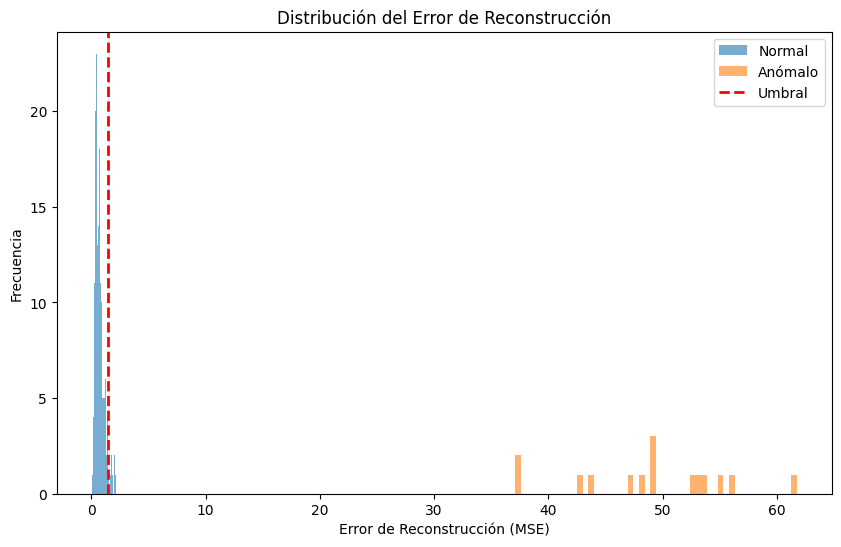

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# 1. Generar datos sintéticos
# Datos normales (distribución normal)
normal_data = np.random.normal(loc=0.0, scale=1.0, size=(1000, 10))  # 1000 muestras, 10 características

# Datos anómalos (distribución uniforme con valores extremos)
anomalous_data = np.random.uniform(low=5, high=10, size=(50, 10))  # 50 muestras, 10 características

# Combinar los datos
data = np.vstack((normal_data, anomalous_data))
labels = np.hstack((np.zeros(normal_data.shape[0]), np.ones(anomalous_data.shape[0])))  # 0: normal, 1: anómalo

# Dividir en entrenamiento y prueba (70% entrenamiento, 30% prueba)
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

# 2. Definir el autoencoder
input_dim = x_train.shape[1]  # Número de características (10)

# Arquitectura del autoencoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(16, activation='relu')(input_layer)
encoded = Dense(8, activation='relu')(encoded)  # Capa latente o bottleneck

decoded = Dense(16, activation='relu')(encoded)
decoded_output = Dense(input_dim, activation='sigmoid')(decoded)

# Modelo completo del autoencoder
autoencoder = Model(inputs=input_layer, outputs=decoded_output)

# Compilar el modelo con optimizador Adam y función de pérdida MSE
autoencoder.compile(optimizer='adam', loss='mse')

# Entrenar el autoencoder solo con datos normales
autoencoder.fit(
    x_train[y_train == 0], x_train[y_train == 0],  # Solo datos normales para entrenamiento
    epochs=50,
    batch_size=32,
    shuffle=True,
    validation_split=0.2
)

# 3. Reconstrucción y cálculo del error
# Reconstruir los datos de prueba
reconstructions = autoencoder.predict(x_test)

# Calcular el error de reconstrucción (MSE por muestra)
mse = np.mean(np.power(x_test - reconstructions, 2), axis=1)

# Definir un umbral basado en el percentil 95 del error en datos normales
threshold = np.percentile(mse[y_test == 0], 95)
print(f"Umbral de detección de anomalías: {threshold:.4f}")

# Clasificar como anómalos aquellos con error mayor al umbral
y_pred = mse > threshold  # True para anomalías, False para normales

# 4. Evaluación y visualización
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Visualización del error de reconstrucción para normales y anómalos
plt.figure(figsize=(10, 6))
plt.hist(mse[y_test == 0], bins=50, alpha=0.6, label='Normal')
plt.hist(mse[y_test == 1], bins=50, alpha=0.6, label='Anómalo')
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=2, label='Umbral')
plt.title("Distribución del Error de Reconstrucción")
plt.xlabel("Error de Reconstrucción (MSE)")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()


In [ ]:
# Importación de librerías necesarias
from IPython.display import display, HTML
import html # Para escapar caracteres especiales en los títulos

# --- 1. ESTRUCTURACIÓN DE DATOS (CONTENIDO SOBRE COMPRESIÓN) ---

# --- Bloque de Conclusión ---
conclusion_html = """
<div class="content-block conclusion-block">
    <h2>Conclusión: Pilares de la Era Digital</h2>
    <p>Los algoritmos de compresión son héroes anónimos que hacen posible nuestro mundo digital. Desde enviar un email hasta ver una película en streaming, estas técnicas trabajan constantemente para que la gestión de datos sea eficiente, rápida y económica, siendo un campo de estudio fundamental en la ciencia de la computación.</p>
</div>
"""

# --- Contenido Principal para el Acordeón ---
compression_data = [
    {
        "titulo": "1. ¿Qué son los Algoritmos de Compresión?",
        "contenido": """
            <p>Un <strong>algoritmo de compresión</strong> es un procedimiento computacional diseñado para reducir el tamaño físico de un conjunto de datos, representándolo con menos bits que su forma original.</p>
            <p>Sus objetivos principales son:</p>
            <ul>
                <li><strong>Minimizar el espacio de almacenamiento</strong> necesario en discos duros, SSDs o en la nube.</li>
                <li><strong>Reducir el tiempo y el ancho de banda</strong> requeridos para transmitir datos a través de redes como Internet.</li>
            </ul>
        """
    },
    {
        "titulo": "2. Visualización: Sin Pérdida vs. Con Pérdida",
        "contenido": """
            <p>La diferencia fundamental entre los dos tipos de compresión radica en si se puede o no reconstruir la información original de manera perfecta.</p>
            <div class="compression-visualizer">
                <!-- Columna Lossless -->
                <div class="column">
                    <h4>Compresión Sin Pérdida (Lossless)</h4>
                    <div class="data-block original">DATOS ABC</div>
                    <div class="arrow">&darr; <span>ZIP / PNG</span> &darr;</div>
                    <div class="data-block compressed">ABC'</div>
                    <div class="arrow">&uarr; <span>Reconstrucción</span> &uarr;</div>
                    <div class="data-block reconstructed original">DATOS ABC</div>
                    <div class="caption">Reconstrucción Exacta</div>
                </div>
                <!-- Columna Lossy -->
                <div class="column">
                    <h4>Compresión Con Pérdida (Lossy)</h4>
                    <div class="data-block original"><i class="fas fa-image"></i></div>
                    <div class="arrow">&darr; <span>JPEG / MP3</span> &darr;</div>
                    <div class="data-block compressed small"><i class="fas fa-image"></i></div>
                    <div class="arrow">&uarr; <span>Reconstrucción</span> &uarr;</div>
                    <div class="data-block reconstructed lossy"><i class="fas fa-image"></i></div>
                    <div class="caption">Reconstrucción Aproximada</div>
                </div>
            </div>
        """
    },
    {
        "titulo": "3. Tipos y Ejemplos Detallados",
        "contenido": """
            <h4>1. Compresión sin Pérdida (Lossless)</h4>
            <p>Permite reconstruir <strong>exactamente</strong> los datos originales a partir de los datos comprimidos. Es crítica para datos donde cada bit cuenta.</p>
            <ul>
                <li><strong>Uso:</strong> Texto, código fuente, ejecutables, datos científicos, imágenes médicas.</li>
                <li><strong>Ejemplos:</strong> ZIP (Deflate), PNG, GIF, FLAC (audio).</li>
            </ul>

            <h4>2. Compresión con Pérdida (Lossy)</h4>
            <p>Reduce mucho más el tamaño, pero a costa de perder información considerada "menos relevante" para la percepción humana. La reconstrucción es una aproximación.</p>
            <ul>
                <li><strong>Uso:</strong> Multimedia (fotos, música, videos), donde una pérdida menor de calidad es aceptable.</li>
                <li><strong>Ejemplos:</strong> JPEG (imágenes), MP3 (audio), MPEG (video).</li>
            </ul>
        """
    },
    {
        "titulo": "4. Relación con el Aprendizaje Automático",
        "contenido": """
            <p>Los <strong>autoencoders</strong> actúan como un sofisticado algoritmo de <strong>compresión con pérdida aprendido</strong>.</p>
            <ul>
                <li>El <strong>encoder</strong> aprende a comprimir los datos a un espacio latente compacto.</li>
                <li>El <strong>decoder</strong> aprende a reconstruir los datos a partir de esa representación comprimida.</li>
            </ul>
            <p>A diferencia de algoritmos clásicos como JPEG, la compresión de un autoencoder es <strong>no lineal y adaptativa</strong>, aprendida específicamente a partir de las estadísticas y patrones complejos del conjunto de datos con el que se entrena.</p>
        """
    },
    {
        "titulo": "5. Tabla Comparativa Resumen",
        "contenido": """
            <div class="table-container">
                <table>
                    <thead>
                        <tr><th>Característica</th><th>Sin Pérdida (Lossless)</th><th>Con Pérdida (Lossy)</th></tr>
                    </thead>
                    <tbody>
                        <tr><td><strong>Reconstrucción</strong></td><td>Exacta, bit a bit.</td><td>Aproximada, con errores controlados.</td></tr>
                        <tr><td><strong>Ratio de Compresión</strong></td><td>Moderado.</td><td>Muy alto.</td></tr>
                        <tr><td><strong>Áreas de Aplicación</strong></td><td>Textos, software, datos científicos.</td><td>Imágenes, audio, video.</td></tr>
                        <tr><td><strong>Ejemplos Clave</strong></td><td>ZIP, PNG, FLAC.</td><td>JPEG, MP3, MPEG.</td></tr>
                    </tbody>
                </table>
            </div>
        """
    }
]


# --- LÓGICA DE GENERACIÓN (REUTILIZADA) ---
def generar_tarjetas_definiciones(datos):
    html_generado = []
    for seccion in datos:
        titulo_escapado = html.escape(seccion['titulo'])
        contenido_html = seccion['contenido']
        plantilla_seccion = f"""
        <div class="topic-card">
            <div class="topic-header">
                <span class="topic-title">{titulo_escapado}</span>
                <i class="fas fa-chevron-down expand-icon"></i>
            </div>
            <div class="topic-content">
                {contenido_html}
            </div>
        </div>
        """
        html_generado.append(plantilla_seccion)
    return "\n".join(html_generado)

# --- PRE-CÁLCULO DEL CONTENIDO DINÁMICO ---
contenido_dinamico_html = generar_tarjetas_definiciones(compression_data)

# --- PLANTILLA PROFESIONAL ---
plantilla_profesional = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>{main_title}</title>
  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700;800&family=JetBrains+Mono:wght@400;500&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">
  <style>
    :root {{
      --bg-primary: linear-gradient(135deg, #f5f7fa 0%, #c3cfe2 100%);
      --bg-secondary: rgba(255, 255, 255, 0.9);
      --bg-tertiary: rgba(248, 250, 252, 0.95);
      --text-primary: #2c3e50;
      --text-secondary: #34495e;
      --text-light: #ffffff;
      --accent-primary: #3a7bd5;
      --accent-secondary: #00d2ff;
      --accent-gradient: linear-gradient(135deg, var(--accent-primary) 0%, var(--accent-secondary) 100%);
      --border-color: rgba(200, 210, 220, 0.9);
      --shadow-card: 0 15px 35px rgba(0, 0, 0, 0.07);
      --border-radius: 20px;
      --transition: all 0.4s cubic-bezier(0.25, 0.8, 0.25, 1);
    }}
    [data-theme="dark"] {{
      --bg-primary: linear-gradient(135deg, #0f2027 0%, #203a43 50%, #2c5364 100%);
      --bg-secondary: rgba(26, 32, 44, 0.85);
      --bg-tertiary: rgba(45, 55, 72, 0.7);
      --text-primary: #f7fafc;
      --text-secondary: #a0aec0;
      --border-color: rgba(255, 255, 255, 0.15);
    }}
    * {{ margin: 0; padding: 0; box-sizing: border-box; }}
    html {{ scroll-behavior: smooth; }}
    body {{ font-family: 'Inter', sans-serif; line-height: 1.8; background: var(--bg-primary); color: var(--text-primary); transition: var(--transition); min-height: 100vh; position: relative; overflow-x: hidden; }}

    .container {{ max-width: 1000px; margin: 0 auto; padding: 2rem; z-index: 1; }}
    .header {{ text-align: center; margin-bottom: 3rem; position: relative; }}
    .main-title {{ font-size: clamp(2.2rem, 5vw, 3.8rem); font-weight: 800; background: var(--accent-gradient); -webkit-background-clip: text; -webkit-text-fill-color: transparent; background-clip: text; margin-bottom: 1.5rem; }}

    .theme-toggle {{ position: fixed; top: 2rem; right: 2rem; width: 60px; height: 60px; border: 1px solid var(--border-color); border-radius: 50%; background: var(--bg-secondary); backdrop-filter: blur(15px); box-shadow: var(--shadow-card); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.4rem; color: var(--accent-primary); transition: var(--transition); z-index: 1000; }}
    .theme-toggle:hover {{ transform: scale(1.15) rotate(180deg); }}

    .lesson-container {{ display: flex; flex-direction: column; gap: 1.5rem; }}
    .topic-card {{ background: var(--bg-secondary); backdrop-filter: blur(20px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 2px solid var(--border-color); overflow: hidden; transition: var(--transition); }}
    .topic-header {{ cursor: pointer; padding: 1.5rem 2rem; display: flex; justify-content: space-between; align-items: center; }}
    .topic-title {{ font-size: 1.3rem; font-weight: 600; color: var(--text-primary); }}
    .expand-icon {{ font-size: 1.2rem; color: var(--text-secondary); transition: var(--transition); }}
    .topic-card.open .expand-icon {{ transform: rotate(180deg); }}
    .topic-content {{ max-height: 0; overflow: hidden; transition: max-height 1.2s ease, padding 1.2s ease; background: var(--bg-tertiary); }}
    .topic-card.open .topic-content {{ max-height: 4500px; padding: 1.5rem 2rem; border-top: 1px solid var(--border-color); }}

    .topic-content h4 {{ color: var(--text-primary); margin-top: 1.5rem; margin-bottom: 0.5rem; font-size: 1.1rem; }}
    .topic-content p, .topic-content li {{ color: var(--text-secondary); line-height: 1.7; }}
    .topic-content ul {{ padding-left: 25px; margin-bottom: 1rem; }}
    .topic-content strong {{ color: var(--text-primary); font-weight: 700; }}
    .table-container {{ overflow-x: auto; margin: 1.5rem 0; }}
    table {{ width: 100%; border-collapse: collapse; }}
    th, td {{ padding: 12px 15px; border: 1px solid var(--border-color); text-align: left; }}
    thead th {{ background-color: var(--bg-tertiary); color: var(--text-primary); font-weight: 600; }}

    .conclusion-block {{ border-left: 5px solid var(--accent-secondary); margin-top: 2rem; padding: 2rem; background: var(--bg-secondary); backdrop-filter: blur(20px); }}
    .conclusion-block h2 {{ color: var(--accent-secondary); }}

    /* --- Estilos del Visualizador de Compresión --- */
    .compression-visualizer {{ display: flex; gap: 2rem; margin-top: 2rem; padding: 1rem; }}
    .column {{ flex: 1; text-align: center; border: 2px solid var(--border-color); padding: 1rem; border-radius: var(--border-radius); }}
    .column h4 {{ color: var(--text-primary); }}
    .data-block {{ margin: 1rem auto; padding: 1rem; border-radius: 8px; border: 2px solid; transition: all 0.5s ease; font-family: 'JetBrains Mono', monospace; font-weight: 700; }}
    .data-block.original {{ width: 90%; height: 60px; background: #ecf0f1; border-color: #bdc3c7; color: #2c3e50; display: flex; align-items: center; justify-content: center; font-size: 1.2rem; }}
    .data-block.compressed {{ width: 60%; height: 40px; background: #95a5a6; border-color: #7f8c8d; color: white; display: flex; align-items: center; justify-content: center; }}
    .data-block.compressed.small {{ width: 30%; }}
    .data-block.reconstructed.lossy {{ filter: opacity(0.8) blur(1px); }}
    .arrow {{ font-size: 1.5rem; color: var(--text-secondary); opacity: 0.7; }}
    .arrow span {{ font-size: 0.8rem; display: block; font-style: italic; }}
    .caption {{ font-weight: 600; color: var(--text-primary); margin-top: 0.5rem; }}
    .data-block .fa-image {{ font-size: 2rem; }}
    .data-block.original .fa-image {{ color: var(--accent-primary); }}
    .data-block.compressed .fa-image {{ color: white; }}
    .data-block.reconstructed.lossy .fa-image {{ color: var(--accent-primary); }}

    footer {{ text-align: center; margin-top: 4rem; padding-top: 2rem; border-top: 1px solid var(--border-color); }}
    footer p {{ color: var(--text-secondary); font-size: 0.9rem; opacity: 0.8; }}
  </style>
</head>
<body data-theme="light">
  <div class="container">
    <header class="header">
      <h1 class="main-title">{main_title}</h1>
    </header>
    <div class="theme-toggle" id="themeToggleButton" title="Cambiar tema"><i class="fas fa-moon" id="theme-icon"></i></div>

    <div class="lesson-container">
        {dynamic_content_html}
    </div>

    {conclusion_html}

    <footer>
      <p>{footer_text}</p>
    </footer>
  </div>

  <script>
    (function() {{
        const themeToggleButton = document.getElementById('themeToggleButton');
        const themeIcon = document.getElementById('theme-icon');
        const bodyEl = document.body;

        function setTheme(theme) {{
            bodyEl.setAttribute('data-theme', theme);
            localStorage.setItem('theme', theme);
            if (themeIcon) {{ themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }}
        }}

        themeToggleButton.addEventListener('click', () => {{
            const newTheme = (bodyEl.getAttribute('data-theme') || 'light') === 'dark' ? 'light' : 'dark';
            setTheme(newTheme);
        }});

        setTheme(localStorage.getItem('theme') || 'light');

        document.querySelectorAll('.topic-header').forEach(header => {{
            header.addEventListener('click', () => {{
                const card = header.parentElement;
                card.classList.toggle('open');
            }});
        }});

        const firstTopic = document.querySelector('.topic-card');
        if(firstTopic) firstTopic.classList.add('open');

    }})();
  </script>
</body>
</html>
"""

# --- INYECCIÓN DINÁMICA Y RENDERIZADO FINAL ---
final_html = plantilla_profesional.format(
    main_title="Guía de Algoritmos de Compresión",
    dynamic_content_html=contenido_dinamico_html,
    conclusion_html=conclusion_html,
    footer_text="Material elaborado por el profesor Sergio Gevatschnaider."
)

display(HTML(final_html))

Característica,Sin Pérdida (Lossless),Con Pérdida (Lossy)
Reconstrucción,"Exacta, bit a bit.","Aproximada, con errores controlados."
Ratio de Compresión,Moderado.,Muy alto.
Áreas de Aplicación,"Textos, software, datos científicos.","Imágenes, audio, video."
Ejemplos Clave,"ZIP, PNG, FLAC.","JPEG, MP3, MPEG."


In [ ]:
# Importación de librerías necesarias
from IPython.display import display, HTML
import html # Para escapar caracteres especiales en los títulos

# --- 1. ESTRUCTURACIÓN DE DATOS (CONTENIDO SOBRE AUTOENCODERS Y COMPRESIÓN) ---

compression_ae_data = [
    {
        "titulo": "1. Autoencoders como Compresión Aprendida",
        "contenido": """
            <p>Un <strong>autoencoder</strong> es fundamentalmente una red neuronal que aprende a realizar una <strong>compresión de datos de forma automática y no supervisada</strong>.</p>
            <ul>
                <li>El <strong>encoder</strong> aprende a comprimir (codificar) los datos de entrada en una representación latente de menor tamaño.</li>
                <li>El <strong>decoder</strong> aprende a descomprimir (decodificar) esa representación para reconstruir los datos originales.</li>
            </ul>
            <blockquote>A diferencia de los algoritmos clásicos, el autoencoder no sigue reglas fijas; "descubre" la mejor manera de comprimir los datos analizando sus patrones y estadísticas internas.</blockquote>
        """
    },
    {
        "titulo": "2. Comparativa Visual: Reglas Fijas vs. Aprendizaje Adaptativo",
        "contenido": """
            <p>La forma en que un compresor tradicional y un autoencoder logran la reducción de datos es fundamentalmente diferente.</p>
            <div class="comparison-visualizer">
                <!-- Columna Compresión Tradicional -->
                <div class="column">
                    <h4>Compresión Tradicional (Ej: ZIP)</h4>
                    <div class="data-icon"><i class="fas fa-file-alt"></i></div>
                    <div class="arrow">&darr;</div>
                    <div class="process-icon"><i class="fas fa-cogs"></i><span>Reglas Fijas (LZ77)</span></div>
                    <div class="arrow">&darr;</div>
                    <div class="result-icon"><i class="fas fa-file-archive"></i><span>Archivo Comprimido</span></div>
                </div>
                <!-- Columna Autoencoder -->
                <div class="column">
                    <h4>Compresión con Autoencoder</h4>
                    <div class="data-icon"><i class="fas fa-file-alt"></i></div>
                    <div class="arrow">&darr;</div>
                    <div class="process-icon"><i class="fas fa-brain"></i><span>Aprendizaje Adaptativo</span></div>
                    <div class="arrow">&darr;</div>
                    <div class="result-icon vector-icon">[-0.2, 1.5, ...]<span>Vector Latente</span></div>
                </div>
            </div>
        """
    },
    {
        "titulo": "3. Diferencias Clave",
        "contenido": """
            <ul>
                <li><strong>No Linealidad:</strong> Los autoencoders pueden aprender relaciones de compresión muy complejas y no lineales, a diferencia de muchos algoritmos clásicos. Esto es clave para datos como imágenes o sonidos.</li>
                <li><strong>Aprendizaje Adaptativo:</strong> Un autoencoder se adapta al tipo de datos específico con el que se entrena. Un modelo entrenado en caras aprenderá a comprimir caras de forma eficiente; uno entrenado en texto aprenderá a comprimir texto.</li>
                <li><strong>Compresión con Pérdida Controlada:</strong> La compresión de un autoencoder es casi siempre "con pérdida" (lossy), pero la red aprende a minimizar esta pérdida para preservar las características más importantes.</li>
                <li><strong>Espacio Latente Continuo y Útil:</strong> La representación comprimida de un autoencoder es un vector en un espacio que puede ser analizado, visualizado o incluso usado para generar nuevos datos, algo imposible con un archivo ZIP.</li>
            </ul>
        """
    },
    {
        "titulo": "4. Tabla Comparativa Final",
        "contenido": """
            <div class="table-container">
                <table>
                    <thead>
                        <tr><th>Característica</th><th>Algoritmos Clásicos (ZIP, JPEG)</th><th>Autoencoders</th></tr>
                    </thead>
                    <tbody>
                        <tr><td><strong>Base del Método</strong></td><td>Estadística, Teoría de la Información</td><td>Aprendizaje Profundo, Optimización</td></tr>
                        <tr><td><strong>Definición de Reglas</strong></td><td>Predefinidas, heurísticas.</td><td>Aprendidas directamente de los datos.</td></tr>
                        <tr><td><strong>Flexibilidad</strong></td><td>Limitada a patrones específicos.</td><td>Alta, capta patrones abstractos y complejos.</td></tr>
                        <tr><td><strong>Resultado de la Compresión</strong></td><td>Un flujo de bits o archivo comprimido.</td><td>Una representación vectorial (espacio latente).</td></tr>
                        <tr><td><strong>Propósito Adicional</strong></td><td>Almacenamiento y transmisión.</td><td>Análisis, generación, limpieza, detección de anomalías.</td></tr>
                    </tbody>
                </table>
            </div>
        """
    }
]


# --- LÓGICA DE GENERACIÓN (REUTILIZADA) ---
def generar_tarjetas_definiciones(datos):
    html_generado = []
    for seccion in datos:
        titulo_escapado = html.escape(seccion['titulo'])
        contenido_html = seccion['contenido']
        plantilla_seccion = f"""
        <div class="topic-card">
            <div class="topic-header">
                <span class="topic-title">{titulo_escapado}</span>
                <i class="fas fa-chevron-down expand-icon"></i>
            </div>
            <div class="topic-content">
                {contenido_html}
            </div>
        </div>
        """
        html_generado.append(plantilla_seccion)
    return "\n".join(html_generado)

# --- PRE-CÁLCULO DEL CONTENIDO DINÁMICO ---
contenido_dinamico_html = generar_tarjetas_definiciones(compression_ae_data)

# --- PLANTILLA PROFESIONAL ---
plantilla_profesional = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>{main_title}</title>
  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700;800&family=JetBrains+Mono:wght@400;500&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">
  <style>
    :root {{
      --bg-primary: linear-gradient(135deg, #f0f2f5 0%, #d6e0f0 100%);
      --bg-secondary: rgba(255, 255, 255, 0.9);
      --bg-tertiary: rgba(248, 250, 252, 0.95);
      --text-primary: #34495e;
      --text-secondary: #5d6d7e;
      --text-light: #ffffff;
      --accent-primary: #8e44ad;
      --accent-secondary: #3a7bd5;
      --accent-gradient: linear-gradient(135deg, var(--accent-primary) 0%, var(--accent-secondary) 100%);
      --border-color: rgba(200, 210, 220, 0.9);
      --shadow-card: 0 15px 35px rgba(0, 0, 0, 0.07);
      --border-radius: 20px;
      --transition: all 0.4s cubic-bezier(0.25, 0.8, 0.25, 1);
    }}
    [data-theme="dark"] {{
      --bg-primary: linear-gradient(135deg, #0f2027 0%, #203a43 50%, #2c5364 100%);
      --bg-secondary: rgba(26, 32, 44, 0.85);
      --bg-tertiary: rgba(45, 55, 72, 0.7);
      --text-primary: #f7fafc;
      --text-secondary: #a0aec0;
      --border-color: rgba(255, 255, 255, 0.15);
    }}
    * {{ margin: 0; padding: 0; box-sizing: border-box; }}
    html {{ scroll-behavior: smooth; }}
    body {{ font-family: 'Inter', sans-serif; line-height: 1.8; background: var(--bg-primary); color: var(--text-primary); transition: var(--transition); min-height: 100vh; position: relative; overflow-x: hidden; }}

    .container {{ max-width: 1000px; margin: 0 auto; padding: 2rem; z-index: 1; }}
    .header {{ text-align: center; margin-bottom: 3rem; position: relative; }}
    .main-title {{ font-size: clamp(2.2rem, 5vw, 3.8rem); font-weight: 800; background: var(--accent-gradient); -webkit-background-clip: text; -webkit-text-fill-color: transparent; background-clip: text; margin-bottom: 1.5rem; }}

    .theme-toggle {{ position: fixed; top: 2rem; right: 2rem; width: 60px; height: 60px; border: 1px solid var(--border-color); border-radius: 50%; background: var(--bg-secondary); backdrop-filter: blur(15px); box-shadow: var(--shadow-card); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.4rem; color: var(--accent-primary); transition: var(--transition); z-index: 1000; }}
    .theme-toggle:hover {{ transform: scale(1.15) rotate(180deg); }}

    .lesson-container {{ display: flex; flex-direction: column; gap: 1.5rem; }}
    .topic-card {{ background: var(--bg-secondary); backdrop-filter: blur(20px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 2px solid var(--border-color); overflow: hidden; transition: var(--transition); }}
    .topic-header {{ cursor: pointer; padding: 1.5rem 2rem; display: flex; justify-content: space-between; align-items: center; }}
    .topic-title {{ font-size: 1.3rem; font-weight: 600; color: var(--text-primary); }}
    .expand-icon {{ font-size: 1.2rem; color: var(--text-secondary); transition: var(--transition); }}
    .topic-card.open .expand-icon {{ transform: rotate(180deg); }}
    .topic-content {{ max-height: 0; overflow: hidden; transition: max-height 1.2s ease, padding 1.2s ease; background: var(--bg-tertiary); }}
    .topic-card.open .topic-content {{ max-height: 4500px; padding: 1.5rem 2rem; border-top: 1px solid var(--border-color); }}

    .topic-content h4 {{ color: var(--text-primary); margin-top: 1.5rem; margin-bottom: 0.5rem; font-size: 1.1rem; }}
    .topic-content p, .topic-content li {{ color: var(--text-secondary); line-height: 1.7; }}
    .topic-content ul {{ padding-left: 25px; margin-bottom: 1rem; }}
    .topic-content strong {{ color: var(--text-primary); font-weight: 700; }}
    .topic-content blockquote {{
        border-left: 4px solid var(--accent-primary); padding-left: 1.5rem; margin: 1.5rem 0; font-style: italic; color: var(--text-secondary);
        background: rgba(142, 68, 173, 0.07); border-radius: 0 8px 8px 0; padding: 1rem 1.5rem;
    }}
    .table-container {{ overflow-x: auto; margin: 1.5rem 0; }}
    table {{ width: 100%; border-collapse: collapse; }}
    th, td {{ padding: 12px 15px; border: 1px solid var(--border-color); text-align: left; }}
    thead th {{ background-color: var(--bg-tertiary); color: var(--text-primary); font-weight: 600; }}

    /* --- Estilos del Visualizador de Comparación --- */
    .comparison-visualizer {{ display: flex; gap: 2rem; margin-top: 2rem; padding: 1rem; }}
    .column {{ flex: 1; text-align: center; border: 2px solid var(--border-color); padding: 1rem; border-radius: var(--border-radius); }}
    .column h4 {{ color: var(--text-primary); height: 50px; }}
    .data-icon, .process-icon, .result-icon {{ margin: 1rem auto; padding: 1rem; border-radius: 8px; font-weight: 700; width: 80%; }}
    .data-icon i, .process-icon i, .result-icon i {{ font-size: 2.5rem; margin-bottom: 0.5rem; display: block; }}
    .data-icon {{ color: var(--accent-secondary); }}
    .process-icon {{ color: var(--accent-primary); }}
    .process-icon span {{ font-size: 0.8rem; display: block; opacity: 0.8; }}
    .result-icon {{ color: #27ae60; }}
    .result-icon span {{ font-family: 'JetBrains Mono'; font-size: 0.8rem; display: block; opacity: 0.8; }}
    .result-icon.vector-icon {{ font-family: 'JetBrains Mono'; font-size: 1rem; background: var(--bg-tertiary); border: 1px solid var(--border-color);}}
    .arrow {{ font-size: 2rem; color: var(--text-secondary); opacity: 0.5; }}

    footer {{ text-align: center; margin-top: 4rem; padding-top: 2rem; border-top: 1px solid var(--border-color); }}
    footer p {{ color: var(--text-secondary); font-size: 0.9rem; opacity: 0.8; }}
  </style>
</head>
<body data-theme="light">
  <div class="container">
    <header class="header">
      <h1 class="main-title">{main_title}</h1>
    </header>
    <div class="theme-toggle" id="themeToggleButton" title="Cambiar tema"><i class="fas fa-moon" id="theme-icon"></i></div>

    <div class="lesson-container">
        {dynamic_content_html}
    </div>

    <footer>
      <p>{footer_text}</p>
    </footer>
  </div>

  <script>
    (function() {{
        const themeToggleButton = document.getElementById('themeToggleButton');
        const themeIcon = document.getElementById('theme-icon');
        const bodyEl = document.body;

        function setTheme(theme) {{
            bodyEl.setAttribute('data-theme', theme);
            localStorage.setItem('theme', theme);
            if (themeIcon) {{ themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }}
        }}

        themeToggleButton.addEventListener('click', () => {{
            const newTheme = (bodyEl.getAttribute('data-theme') || 'light') === 'dark' ? 'light' : 'dark';
            setTheme(newTheme);
        }});

        setTheme(localStorage.getItem('theme') || 'light');

        document.querySelectorAll('.topic-header').forEach(header => {{
            header.addEventListener('click', () => {{
                const card = header.parentElement;
                card.classList.toggle('open');
            }});
        }});

        const firstTopic = document.querySelector('.topic-card');
        if(firstTopic) firstTopic.classList.add('open');

    }})();
  </script>
</body>
</html>
"""

# --- INYECCIÓN DINÁMICA Y RENDERIZADO FINAL ---
final_html = plantilla_profesional.format(
    main_title="Autoencoders y Compresión: Dos Caras de la Misma Moneda",
    dynamic_content_html=contenido_dinamico_html,
    footer_text="Material elaborado por el profesor Sergio Gevatschnaider."
)

display(HTML(final_html))

Característica,"Algoritmos Clásicos (ZIP, JPEG)",Autoencoders
Base del Método,"Estadística, Teoría de la Información","Aprendizaje Profundo, Optimización"
Definición de Reglas,"Predefinidas, heurísticas.",Aprendidas directamente de los datos.
Flexibilidad,Limitada a patrones específicos.,"Alta, capta patrones abstractos y complejos."
Resultado de la Compresión,Un flujo de bits o archivo comprimido.,Una representación vectorial (espacio latente).
Propósito Adicional,Almacenamiento y transmisión.,"Análisis, generación, limpieza, detección de anomalías."
